# Decision program using machine learning methods
## DuckDB, basic features

In [1]:
!pip install numpy==1.23
!pip install scikit-learn
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install torch
!pip install tqdm
!pip install dhg

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader
import dhg
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
import pickle

In [3]:

# Sample DataFrame
data = {'A': [1.0, 2.0, 3.0], 'B': [4.0, 5.0, 6.0]}
df = pd.DataFrame(data)

# Convert DataFrame to numpy array
np_array = df.values

# Convert numpy array to PyTorch tensor
tensor = torch.from_numpy(np_array).float()

print(tensor)


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [4]:
import numpy as np
print(np.__version__)


1.23.0


#### Distribution of the runtimes in orders of magnitude

For the original queries:

In [5]:
df = pd.read_csv('results/DDB_Scala_comparison_TO_augment_server.csv')

df.loc[df['orig mean'] == 'TO', 'orig mean'] = 101
column = df['orig mean'].astype("float64")

count_0_01_orig = 0
count_0_1_orig = 0
count_1_orig = 0
count_10_orig = 0
count_100_orig = 0
count_TO_orig = 0

for value in column:
    if value <= 0.01:
        count_0_01_orig += 1
    elif value > 0.01 and value <= 0.1:
        count_0_1_orig += 1
    elif value > 0.1 and value <= 1:
        count_1_orig += 1
    elif value > 1 and value <= 10:
        count_10_orig += 1
    elif value > 10 and value <= 100:
        count_100_orig += 1
    else:
        count_TO_orig += 1
    

print("Number of instances with original runtime <= 0.01:", count_0_01_orig)
print("Number of instances with original runtime (0.01, 0.1]:", count_0_1_orig)
print("Number of instances with original runtime (0.1, 1]:", count_1_orig)
print("Number of instances with original runtime (1,10]:", count_10_orig)
print("Number of instances with original runtime (10,100]:", count_100_orig)
print("Number of instances with original runtime TO:", count_TO_orig)

Number of instances with original runtime <= 0.01: 7
Number of instances with original runtime (0.01, 0.1]: 101
Number of instances with original runtime (0.1, 1]: 1706
Number of instances with original runtime (1,10]: 638
Number of instances with original runtime (10,100]: 219
Number of instances with original runtime TO: 265


for the rewritten queries:

In [6]:
df.loc[df['rewr mean'] == 'TO', 'rewr mean'] = 101
column = df['rewr mean'].astype("float64")

count_0_01_rewr = 0
count_0_1_rewr = 0
count_1_rewr = 0
count_10_rewr = 0
count_100_rewr = 0
count_TO_rewr = 0

for value in column:
    if value <= 0.01:
        count_0_01_rewr += 1
    elif value > 0.01 and value <= 0.1:
        count_0_1_rewr += 1
    elif value > 0.1 and value <= 1:
        count_1_rewr += 1
    elif value > 1 and value <= 10:
        count_10_rewr += 1
    elif value > 10 and value <= 100:
        count_100_rewr += 1
    else:
        count_TO_rewr += 1
    

print("Number of instances with original runtime <= 0.01:", count_0_01_rewr)
print("Number of instances with original runtime (0.01, 0.1]:", count_0_1_rewr)
print("Number of instances with original runtime (0.1, 1]:", count_1_rewr)
print("Number of instances with original runtime (1,10]:", count_10_rewr)
print("Number of instances with original runtime (10,100]:", count_100_rewr)
print("Number of instances with original runtime TO:", count_TO_rewr)

Number of instances with original runtime <= 0.01: 0
Number of instances with original runtime (0.01, 0.1]: 103
Number of instances with original runtime (0.1, 1]: 1930
Number of instances with original runtime (1,10]: 560
Number of instances with original runtime (10,100]: 219
Number of instances with original runtime TO: 124


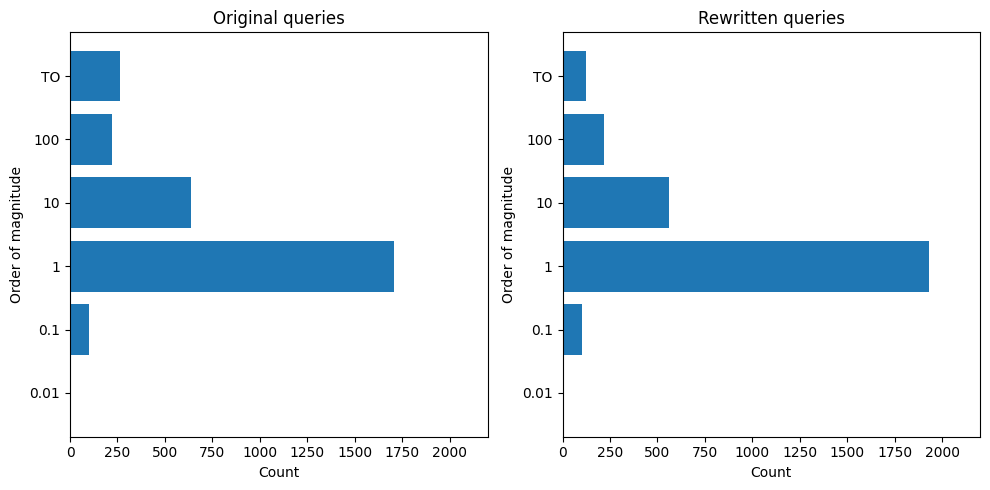

In [7]:
numbers_orig = [count_0_01_orig, count_0_1_orig, count_1_orig, count_10_orig, count_100_orig, count_TO_orig]
numbers_rewr = [count_0_01_rewr, count_0_1_rewr, count_1_rewr, count_10_rewr, count_100_rewr, count_TO_rewr]

# Indices for each number
indices = ["0.01", "0.1", "1", "10", "100", "TO"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original numbers
axs[0].barh(indices, numbers_orig)
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Order of magnitude')
axs[0].set_title('Original queries')
axs[0].set_xlim(0, 2200)

# Plot rewritten numbers
axs[1].barh(indices, numbers_rewr)
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Order of magnitude')
axs[1].set_title('Rewritten queries')
axs[1].set_xlim(0, 2200)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Import the data

In [8]:
file_path = 'results/features_times_DDB.csv'
df = pd.read_csv(file_path)
df.head()

,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,diff rewr+rewr-orig,#relations,...,max(branching factors),mean(branching factors),median(branching factors),q25(branching factors),q75(branching factors),balancedness factor,container counts list,branching factors list,hypergraph,text
0,STATS,001-014,rewr,orig,0.152974,0.111106,2.036514,-0.041868,1.883540,3,...,2,2.0,2.0,2.0,2.0,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...,"SELECT MIN(u.Id) FROM comments as c, votes as ..."
1,STATS,001-014-augA1,rewr,orig,0.164154,0.136223,1.933056,-0.027931,1.768902,3,...,1,1.0,1.0,1.0,1.0,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]",b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...,"SELECT MIN(c.id) FROM comments as c, votes as ..."
2,STATS,001-014-augA2,orig,orig,0.167567,0.199151,2.017481,0.031583,1.849914,3,...,1,1.0,1.0,1.0,1.0,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]",b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...,"SELECT MIN(v.id) FROM comments as c, votes as ..."
3,STATS,001-014-augF1,orig,orig,0.155335,0.199072,2.031366,0.043737,1.876031,3,...,2,2.0,2.0,2.0,2.0,1.0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]",[2],b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...,"SELECT MIN(u.Id) FROM comments as c, votes as ..."
4,STATS,001-014-augF1-augA1,rewr,orig,0.165553,0.139130,1.994132,-0.026423,1.828579,3,...,1,1.0,1.0,1.0,1.0,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]","[1, 1]",b'\x80\x04\x95\xe8\x01\x00\x00\x00\x00\x00\x00...,"SELECT MIN(c.id) FROM comments as c, votes as ..."


In [9]:
df.dtypes

bench                         object
query                         object
orig/rewr(mean)               object
orig/rewr+rewr(mean)          object
orig mean                    float64
rewr mean                    float64
rewr mean+rewr               float64
diff rewr-orig               float64
diff rewr+rewr-orig          float64
#relations                     int64
#conditions                    int64
#filters                       int64
#joins                         int64
depth                          int64
min(container counts)          int64
max(container counts)          int64
mean(container counts)       float64
q25(container counts)        float64
median(container counts)     float64
q75(container counts)        float64
min(branching factors)         int64
max(branching factors)         int64
mean(branching factors)      float64
median(branching factors)    float64
q25(branching factors)       float64
q75(branching factors)       float64
balancedness factor          float64
c

Transform the hypergraph, which is saved as pickle object, back to a dhg hypergraph object.

In [10]:
df["hypergraph"] = df["hypergraph"].apply(lambda x: pickle.loads(eval(x)))

#### Delete those examples, where both methods gave a timeout

In [11]:
df[df["orig/rewr(mean)"] == "-"]

,bench,query,orig/rewr(mean),orig/rewr+rewr(mean),orig mean,rewr mean,rewr mean+rewr,diff rewr-orig,diff rewr+rewr-orig,#relations,...,max(branching factors),mean(branching factors),median(branching factors),q25(branching factors),q75(branching factors),balancedness factor,container counts list,branching factors list,hypergraph,text
2031,SNAP,patents-path08,-,-,100.0,100.0,100.0,0.0,0.0,9,...,2,1.142857,1.0,1.00,1.00,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 2]","Hypergraph(num_v=18, num_e=9)","select MIN(p1.toNode) from patents p1, patents..."
2032,SNAP,patents-path08-augA1,-,-,100.0,100.0,100.0,0.0,0.0,9,...,2,1.142857,1.0,1.00,1.00,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 2]","Hypergraph(num_v=18, num_e=9)","select MIN(p2.fromnode) from patents p1, paten..."
2033,SNAP,patents-path08-augA2,-,-,100.0,100.0,100.0,0.0,0.0,9,...,2,1.142857,1.0,1.00,1.00,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 2]","Hypergraph(num_v=18, num_e=9)","select MIN(p3.fromnode) from patents p1, paten..."
2034,SNAP,patents-path08-augA3,-,-,100.0,100.0,100.0,0.0,0.0,9,...,2,1.142857,1.0,1.00,1.00,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 2]","Hypergraph(num_v=18, num_e=9)","select MIN(p4.fromnode) from patents p1, paten..."
2035,SNAP,patents-path08-augA4,-,-,100.0,100.0,100.0,0.0,0.0,9,...,2,1.142857,1.0,1.00,1.00,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 2]","Hypergraph(num_v=18, num_e=9)","select MIN(p5.fromnode) from patents p1, paten..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,SNAP,wiki-tree03-augA3,-,-,100.0,100.0,100.0,0.0,0.0,8,...,4,1.750000,1.0,1.00,1.75,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 1, 1, 4]","Hypergraph(num_v=16, num_e=8)","select MIN(p3b.fromnode) from wiki p1, wiki p2..."
2116,SNAP,wiki-tree03-augA4,-,-,100.0,100.0,100.0,0.0,0.0,8,...,4,1.750000,1.0,1.00,1.75,1.000000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 1, 1, 4]","Hypergraph(num_v=16, num_e=8)","select MIN(p4a.fromnode) from wiki p1, wiki p2..."
2117,SNAP,wiki-tree03-augA5,-,-,100.0,100.0,100.0,0.0,0.0,8,...,3,1.750000,1.5,1.00,2.25,0.666667,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[2, 1, 1, 3]","Hypergraph(num_v=16, num_e=8)","select MIN(p4b.fromnode) from wiki p1, wiki p2..."
2118,SNAP,wiki-tree03-augA6,-,-,100.0,100.0,100.0,0.0,0.0,8,...,3,1.750000,1.5,1.00,2.25,0.625000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 1, 3, 2]","Hypergraph(num_v=16, num_e=8)","select MIN(p5a.fromnode) from wiki p1, wiki p2..."


For the SNAP dataset the wiki-path06, wiki-path07, wiki-path08 and wiki-tree03 (for all augmentation cases) did not finish the evaluation within our timeout (100 sec). Therefore, we cannot conclude which variante is the better one and we delete those 32 samples.

In [12]:
df = df[df["orig/rewr(mean)"] != "-"]
df.shape

(2861, 31)

#### Get the feature matrix

Get the features matrix X and the response variables y1 and y1, where once the rewritting time and the evaluation time are taken into consideration and once only the evaluation time. Additionally the response variables have to have numbers in it and we assign 1 = rewr and 0 = orig.

In [13]:
X = df.iloc[:, 9:26]
X.head()

,#relations,#conditions,#filters,#joins,depth,min(container counts),max(container counts),mean(container counts),q25(container counts),median(container counts),q75(container counts),min(branching factors),max(branching factors),mean(branching factors),median(branching factors),q25(branching factors),q75(branching factors)
0,3,7,5,2,1,1,3,1.133333,1.0,1.0,1.0,2,2,2.0,2.0,2.0,2.0
1,3,7,5,2,2,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0
2,3,7,5,2,2,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0
3,3,7,5,2,1,1,3,1.133333,1.0,1.0,1.0,2,2,2.0,2.0,2.0,2.0
4,3,7,5,2,2,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0


Get the feature matrix, which additionally includes the hypergraph information/representation.

In [14]:
X_hg = pd.concat([X, df.iloc[:,29]], axis = 1)
X_hg.head()

,#relations,#conditions,#filters,#joins,depth,min(container counts),max(container counts),mean(container counts),q25(container counts),median(container counts),q75(container counts),min(branching factors),max(branching factors),mean(branching factors),median(branching factors),q25(branching factors),q75(branching factors),hypergraph
0,3,7,5,2,1,1,3,1.133333,1.0,1.0,1.0,2,2,2.0,2.0,2.0,2.0,"Hypergraph(num_v=17, num_e=3)"
1,3,7,5,2,2,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,"Hypergraph(num_v=17, num_e=3)"
2,3,7,5,2,2,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,"Hypergraph(num_v=17, num_e=3)"
3,3,7,5,2,1,1,3,1.133333,1.0,1.0,1.0,2,2,2.0,2.0,2.0,2.0,"Hypergraph(num_v=17, num_e=3)"
4,3,7,5,2,2,1,3,1.133333,1.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,"Hypergraph(num_v=17, num_e=3)"


#### Log-transformations

This basic features do not need log transformations.

In [15]:
min_values = X.min()
max_values = X.max()
diff = max_values-min_values

pd.DataFrame({'Min': min_values, 'Max': max_values, 'Diff': diff})

,Min,Max,Diff
#relations,2.000000,11.0,9.000000
#conditions,2.000000,20.0,18.000000
#filters,0.000000,16.0,16.000000
#joins,1.000000,12.0,11.000000
depth,1.000000,7.0,6.000000
min(container counts),1.000000,1.0,0.000000
max(container counts),2.000000,5.0,3.000000
mean(container counts),1.047619,1.6,0.552381
q25(container counts),1.000000,1.0,0.000000
median(container counts),1.000000,1.0,0.000000


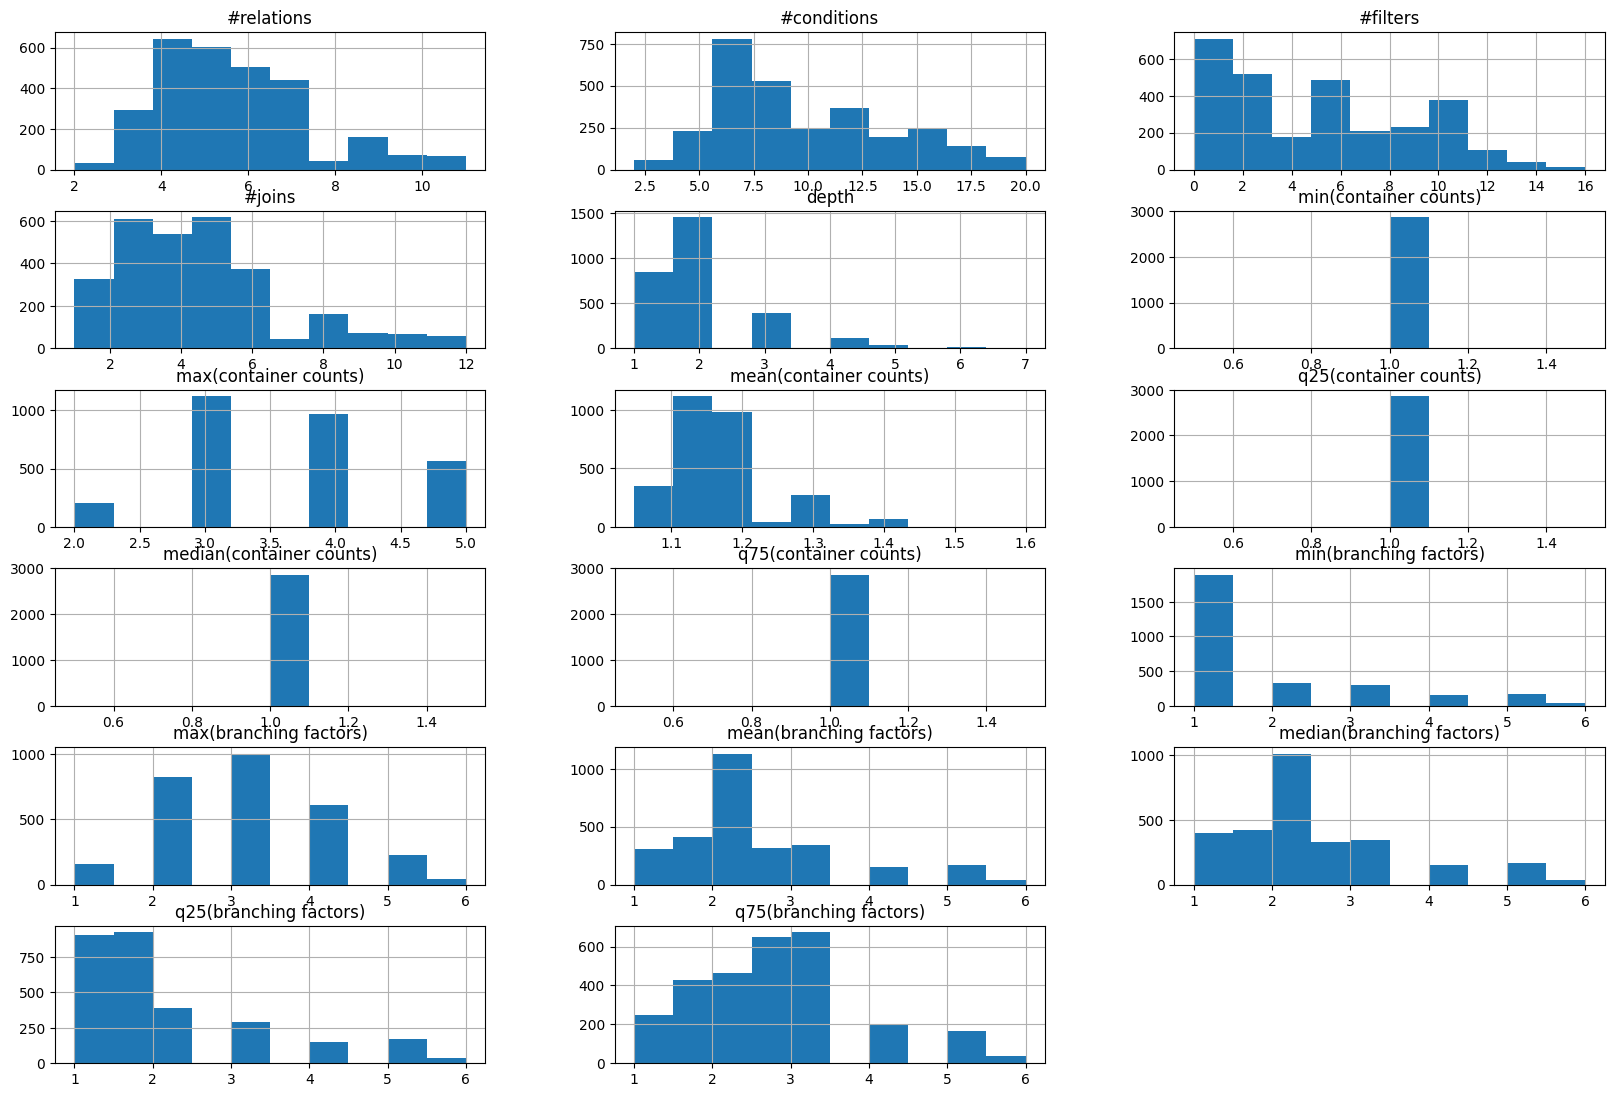

In [16]:
X.hist(layout=(11, 3), figsize=(20, 25))
plt.show()

#### Boxplots of running times for both cases (either original or rewritten)

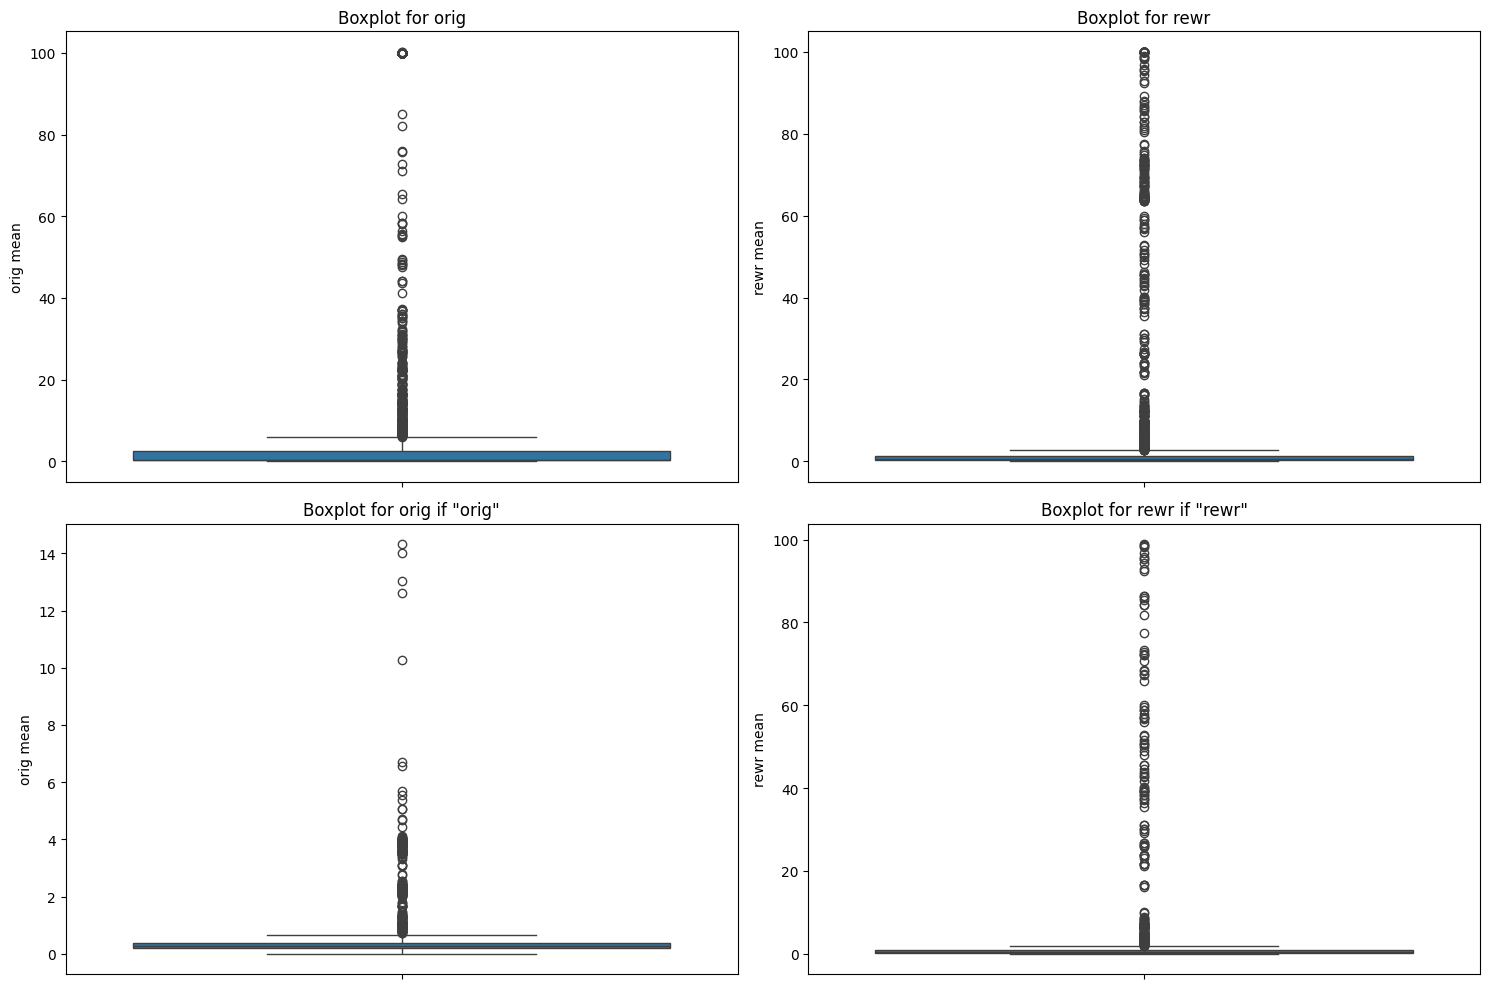

In [17]:
df_orig = df[df['orig/rewr(mean)'] == 'orig']
df_rewr = df[df['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(y='orig mean', data=df, ax=axes[0,0])
axes[0,0].set_title(f'Boxplot for orig')

sns.boxplot(y='rewr mean', data=df, ax=axes[0,1])
axes[0,1].set_title(f'Boxplot for rewr')

sns.boxplot(y='orig mean', data=df_orig, ax=axes[1,0])
axes[1,0].set_title(f'Boxplot for orig if "orig"')

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[1,1])
axes[1,1].set_title(f'Boxplot for rewr if "rewr"')

plt.tight_layout()
plt.show()

The runtimes are highly skewed. Therefore, we log transform them

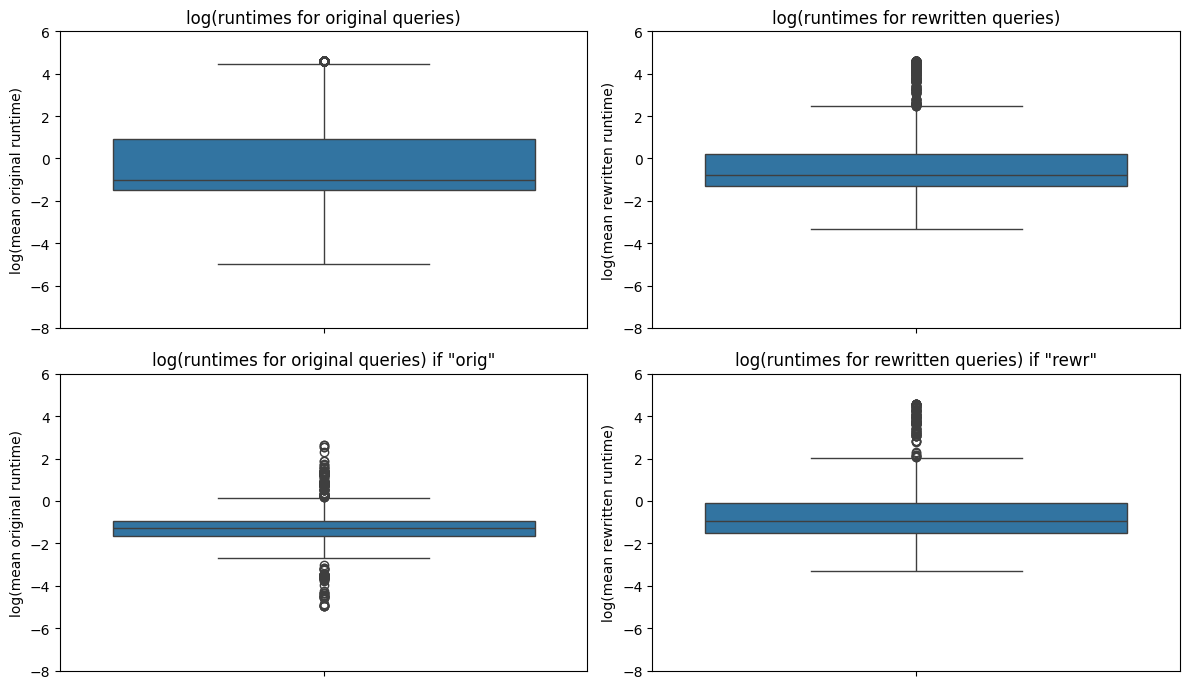

In [18]:
df_log = df.copy()
df_log["orig mean"] = np.log(df_log["orig mean"])
df_log["rewr mean"] = np.log(df_log["rewr mean"])

df_orig = df_log[df_log['orig/rewr(mean)'] == 'orig']
df_rewr = df_log[df_log['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(2, 2, figsize=(12,7))

sns.boxplot(y='orig mean', data=df_log, ax=axes[0,0])
axes[0,0].set_title(f'log(runtimes for original queries)')
axes[0,0].set_ylabel("log(mean original runtime)")
axes[0,0].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_log, ax=axes[0,1])
axes[0,1].set_title(f'log(runtimes for rewritten queries)')
axes[0,1].set_ylabel("log(mean rewritten runtime)")
axes[0,1].set_ylim(-8, 6) 

sns.boxplot(y='orig mean', data=df_orig, ax=axes[1,0])
axes[1,0].set_title(f'log(runtimes for original queries) if "orig"')
axes[1,0].set_ylabel("log(mean original runtime)")
axes[1,0].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[1,1])
axes[1,1].set_title(f'log(runtimes for rewritten queries) if "rewr"')
axes[1,1].set_ylabel("log(mean rewritten runtime)")
axes[1,1].set_ylim(-8, 6) 

plt.tight_layout()
plt.show()

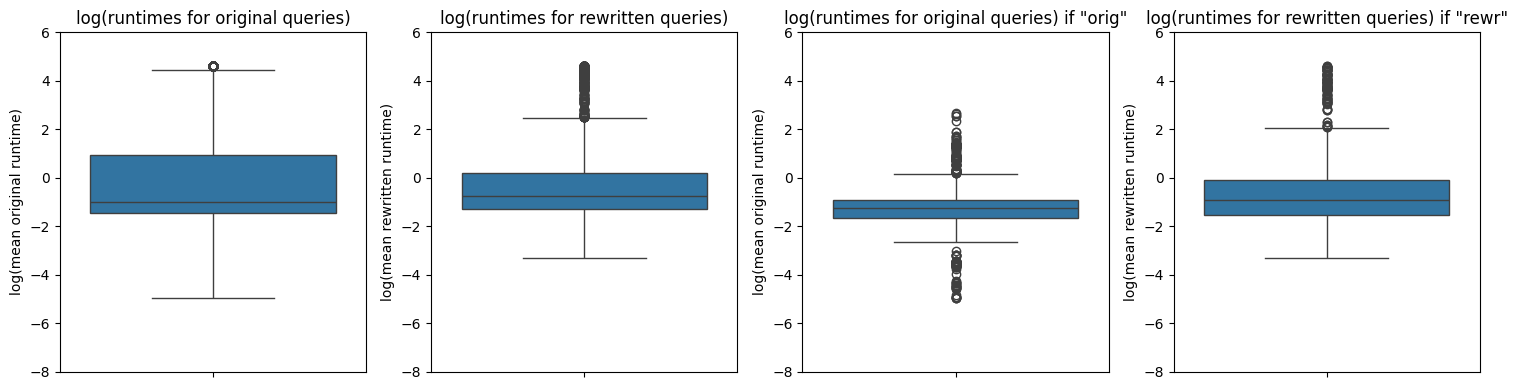

In [19]:
df_log = df.copy()
df_log["orig mean"] = np.log(df_log["orig mean"])
df_log["rewr mean"] = np.log(df_log["rewr mean"])

df_orig = df_log[df_log['orig/rewr(mean)'] == 'orig']
df_rewr = df_log[df_log['orig/rewr(mean)'] == 'rewr']

fig, axes = plt.subplots(1,4, figsize=(15,4))

sns.boxplot(y='orig mean', data=df_log, ax=axes[0])
axes[0].set_title(f'log(runtimes for original queries)')
axes[0].set_ylabel("log(mean original runtime)")
axes[0].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_log, ax=axes[1])
axes[1].set_title(f'log(runtimes for rewritten queries)')
axes[1].set_ylabel("log(mean rewritten runtime)")
axes[1].set_ylim(-8, 6) 

sns.boxplot(y='orig mean', data=df_orig, ax=axes[2])
axes[2].set_title(f'log(runtimes for original queries) if "orig"')
axes[2].set_ylabel("log(mean original runtime)")
axes[2].set_ylim(-8, 6) 

sns.boxplot(y='rewr mean', data=df_rewr, ax=axes[3])
axes[3].set_title(f'log(runtimes for rewritten queries) if "rewr"')
axes[3].set_ylabel("log(mean rewritten runtime)")
axes[3].set_ylim(-8, 6) 

plt.tight_layout()
plt.show()

#### Scatterplot of running times

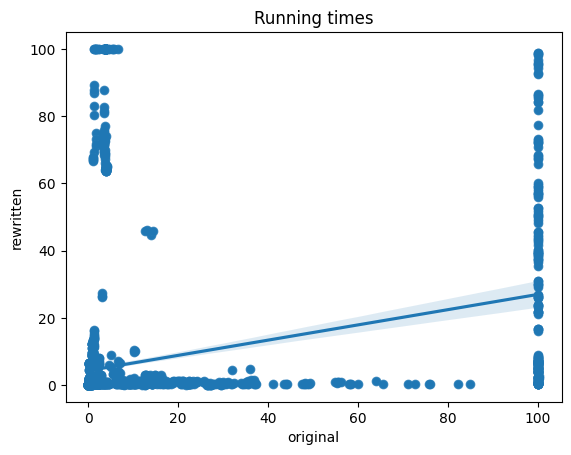

In [20]:
sns.scatterplot(x="orig mean", y="rewr mean", data=df)
sns.regplot(x="orig mean", y="rewr mean", data=df) 

plt.xlabel("original")
plt.ylabel("rewritten")
plt.title(f'Running times')

plt.show()

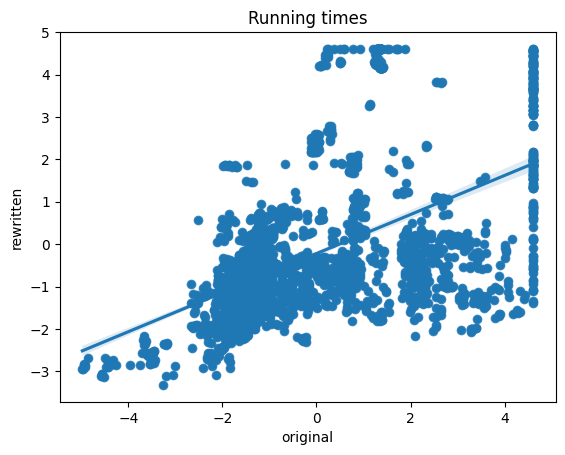

In [21]:
sns.scatterplot(x="orig mean", y="rewr mean", data=df_log)
sns.regplot(x="orig mean", y="rewr mean", data=df_log) 

plt.xlabel("original")
plt.ylabel("rewritten")
plt.title(f'Running times')

plt.show()

#### Classification response

Get the column(s) where we have "orig" or "rewr", depending on which method was faster. We now want to encode this as 0 (evaluating the original query faster) and 1 (evaluating the rewritten query faster).

In [22]:
mapping = {'orig': 0, 'rewr': 1}
y1 = df['orig/rewr(mean)'].map(mapping)
y1.head()

0    1
1    1
2    0
3    0
4    1
Name: orig/rewr(mean), dtype: int64

The number of appearances of original and rewritten is very balanced.

In [23]:
y1.value_counts()

orig/rewr(mean)
0    1542
1    1319
Name: count, dtype: int64

In [24]:
count = y1.value_counts().tolist()[::-1] + ["-"]
count = pd.Series(count)
count.index = ["orig", "rewr", "equal"]
count

orig     1319
rewr     1542
equal       -
dtype: object

In [25]:
df["orig/rewr(mean)"].value_counts()

orig/rewr(mean)
orig    1542
rewr    1319
Name: count, dtype: int64

#### Classification response with three cases

In [26]:
condition = abs(df["diff rewr-orig"]) < 0.5
df["orig/rewr/equal 0.5"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.5'] = 'equal'

In [27]:
condition = abs(df["diff rewr-orig"]) < 0.1
df["orig/rewr/equal 0.1"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.1'] = 'equal'

In [28]:
condition = abs(df["diff rewr-orig"]) < 0.05
df["orig/rewr/equal 0.05"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.05'] = 'equal'

In [29]:
condition = abs(df["diff rewr-orig"]) < 0.01
df["orig/rewr/equal 0.01"] = df["orig/rewr(mean)"]
df.loc[condition, 'orig/rewr/equal 0.01'] = 'equal'

In [30]:
count_05 = df["orig/rewr/equal 0.5"].value_counts()
count_01 = df["orig/rewr/equal 0.1"].value_counts()
count_005 = df["orig/rewr/equal 0.05"].value_counts()
count_001 = df["orig/rewr/equal 0.01"].value_counts()

In [31]:
count_001

orig/rewr/equal 0.01
orig     1503
rewr     1276
equal      82
Name: count, dtype: int64

In [32]:
counts = pd.concat([count_001, count_005, count_01, count_05], axis = 1)
counts.iloc[[0, 1]] = counts.iloc[[1, 0]].values
counts.index = ["orig", "rewr", "equal"]
counts = pd.concat([count, counts], axis = 1)
counts.columns = ["2 classes", "3 classes (0.01)", "3 classes (0.05)", "3 classes (0.1)", "3 classes (0.5)"]
counts

,2 classes,3 classes (0.01),3 classes (0.05),3 classes (0.1),3 classes (0.5)
orig,1319,1276,1113,1009,797
rewr,1542,1503,1292,1100,549
equal,-,82,456,752,1515


In [33]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_05 = df['orig/rewr/equal 0.5'].map(mapping1)
y1_equal_05.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr/equal 0.5, dtype: int64

In [34]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_01 = df['orig/rewr/equal 0.1'].map(mapping1)
y1_equal_01.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr/equal 0.1, dtype: int64

In [35]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_005 = df['orig/rewr/equal 0.05'].map(mapping1)
y1_equal_005.head()

0    0
1    0
2    0
3    0
4    0
Name: orig/rewr/equal 0.05, dtype: int64

In [36]:
mapping1 = {'orig': -1, 'rewr': 1, 'equal': 0}
y1_equal_001 = df['orig/rewr/equal 0.01'].map(mapping1)
y1_equal_001.head()

0    1
1    1
2   -1
3   -1
4    1
Name: orig/rewr/equal 0.01, dtype: int64

#### Regression response

We also have the time differences between the original and rewritten method and we want to use that as numerical response.

In [37]:
y1_diff = df["diff rewr-orig"]
#y1_diff = df["diff rewr+rewr-orig"]

We can see that the time difference has a wide range of values (or is skewed).

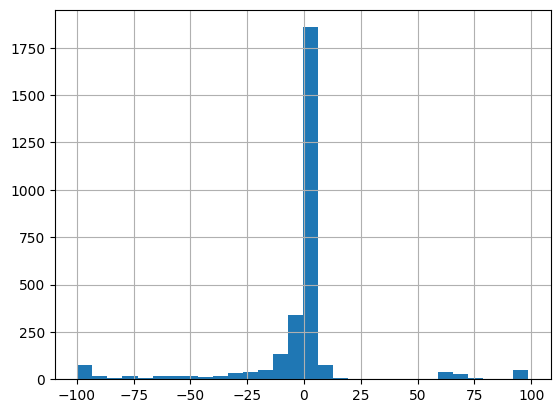

In [38]:
y1_diff.hist(bins = 30)
plt.show()

Therefore, we are going to transform it. As before with the features, we would like to apply a log transformation. Neverthless, since we have negative values this cannot be applied directly. We are going to multiple to log of the absolute values with the sign they had before. Additionally, since we have a lot of values close to zero, which leads to very low log values, we add 1 to the absolute values, which is a common method.   
$x = sgn(x) * log(|x| + 1)$

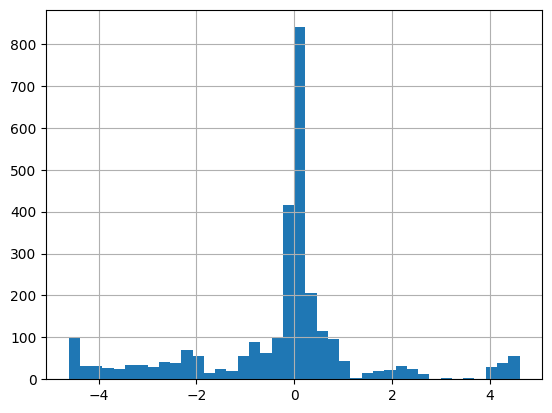

In [39]:
y1_diff_log = np.sign(y1_diff) * np.log(abs(y1_diff) +1)
y1_diff_log.hist(bins = 40)
plt.show()

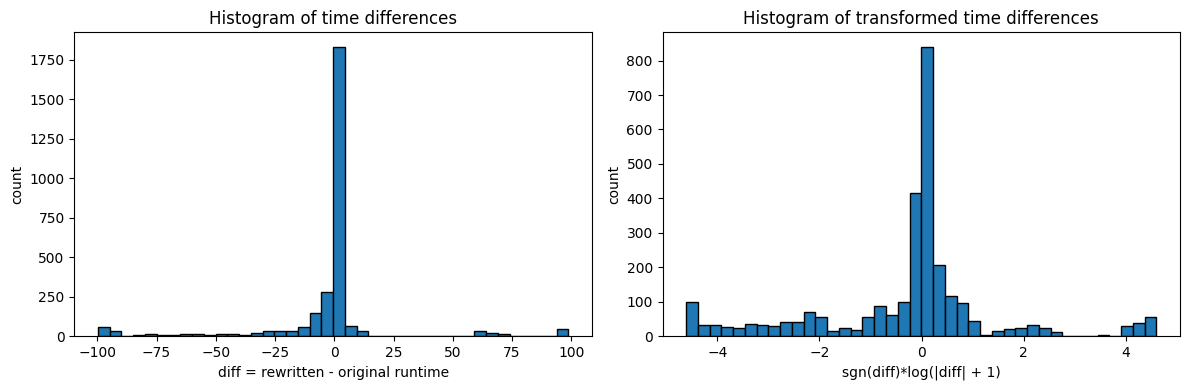

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(y1_diff, bins=40, edgecolor='black')
axs[0].set_title('Histogram of time differences')
axs[0].set_ylabel("count")
axs[0].set_xlabel("diff = rewritten - original runtime")

# Create the second histogram
y1_diff_log = np.sign(y1_diff) * np.log(abs(y1_diff) + 1)
axs[1].hist(y1_diff_log, bins=40, edgecolor='black')
axs[1].set_title('Histogram of transformed time differences')
axs[1].set_ylabel("count")
axs[1].set_xlabel("sgn(diff)*log(|diff| + 1)")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Train-validation-test split

We split the dataset such that each benchmark dataset is represented in the train and in the test set (stratification). We do a 80% train, 10% validation and 10% test split.

In [41]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, stratify=df["bench"], random_state=20)
X_val, X_test, y1_val, y1_test = train_test_split(X_test, y1_test, test_size=0.5, stratify=df.loc[X_test.index]["bench"], random_state=20)
X_train_hg = X_hg.loc[X_train.index]
X_val_hg = X_hg.loc[X_val.index]
X_test_hg = X_hg.loc[X_test.index]
y1_diff_log_train = y1_diff_log.loc[y1_train.index]
y1_diff_log_val = y1_diff_log.loc[y1_val.index]
y1_diff_log_test = y1_diff_log.loc[y1_test.index]
y1_equal_05_train = y1_equal_05.loc[y1_train.index]
y1_equal_05_val = y1_equal_05.loc[y1_val.index]
y1_equal_05_test = y1_equal_05.loc[y1_test.index]
y1_equal_01_train = y1_equal_01.loc[y1_train.index]
y1_equal_01_val = y1_equal_01.loc[y1_val.index]
y1_equal_01_test = y1_equal_01.loc[y1_test.index]
y1_equal_005_train = y1_equal_005.loc[y1_train.index]
y1_equal_005_val = y1_equal_005.loc[y1_val.index]
y1_equal_005_test = y1_equal_005.loc[y1_test.index]
y1_equal_001_train = y1_equal_001.loc[y1_train.index]
y1_equal_001_val = y1_equal_001.loc[y1_val.index]
y1_equal_001_test = y1_equal_001.loc[y1_test.index]

#### Cross-validation split

We take the same 10% as test set and use the rest for cross-validation.

In [42]:
X_train_cv = pd.concat([X_train, X_val], axis = 0)
y1_train_cv = pd.concat([y1_train, y1_val], axis = 0)
y1_diff_log_train_cv = pd.concat([y1_diff_log_train, y1_diff_log_val], axis = 0)
y1_equal_05_train_cv = pd.concat([y1_equal_05_train, y1_equal_05_val], axis = 0)
y1_equal_01_train_cv = pd.concat([y1_equal_01_train, y1_equal_01_val], axis = 0)
y1_equal_005_train_cv = pd.concat([y1_equal_005_train, y1_equal_005_val], axis = 0)
y1_equal_001_train_cv = pd.concat([y1_equal_001_train, y1_equal_001_val], axis = 0)

## ML models

In [43]:
table_2_classes = pd.DataFrame(columns=['acc', 'rec', 'acc', 'rec'])
table_3_classes = pd.DataFrame(columns=['acc', 'rec-mic', 'rec_mac', 'acc', 'rec-mic', 'rec-mac'])
table_time_diff = pd.DataFrame(columns=['MSE', 'MAE', 'R2', 'MSE', 'MAE', 'R2'])

### k-Nearest Neighbors with two classes

Train-test split:

In [44]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_train)
y1_pred_knn = clf.predict(X_val)

In [45]:
accuracy = accuracy_score(y1_val, y1_pred_knn)
recall = recall_score(y1_val, y1_pred_knn)
conf_matrix = confusion_matrix(y1_val, y1_pred_knn)
conf_matrix

array([[134,  22],
       [ 30, 100]])

CV:

In [46]:
y1_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=10)

In [47]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_knn_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_knn_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_knn_cv)
conf_matrix_cv

array([[1149,  245],
       [ 241,  939]])

Adding the values to the result table:

In [48]:
table_2_classes.loc["5-NN"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763


### k-Nearest Neighbors with three classes

##### equal cut off: 0.5

Train-test split:

In [49]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_knn = clf.predict(X_val)

In [50]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_knn)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_knn)
conf_matrix

array([[ 34,  18,   0],
       [ 10, 135,  14],
       [  2,  21,  52]])

CV:

In [51]:
y1_equal_05_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=10)

In [52]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_knn_cv)
conf_matrix_cv

array([[ 299,  162,   28],
       [  69, 1175,  118],
       [  15,  138,  570]])

Adding the values to the result table:

In [53]:
table_3_classes.loc["5-NN 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179


##### equal cut off: 0.1

Train-test split:

In [54]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_knn = clf.predict(X_val)

In [55]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_knn)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_knn)
conf_matrix

array([[87, 21,  4],
       [28, 35, 15],
       [21, 12, 63]])

CV:

In [56]:
y1_equal_01_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=10)

In [57]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_knn_cv)
conf_matrix_cv

array([[767, 128, 101],
       [240, 337,  91],
       [115,  89, 706]])

Adding the values to the result table:

In [58]:
table_3_classes.loc["5-NN 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465


##### equal cut off: 0.05

Train-test split:

In [59]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_knn = clf.predict(X_val)

In [60]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_knn)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_knn)
conf_matrix

array([[105,  16,  10],
       [ 21,  16,  10],
       [ 24,   7,  77]])

CV:

In [61]:
y1_equal_005_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=10)

In [62]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_knn_cv)
conf_matrix_cv

array([[943,  90, 133],
       [179, 161,  66],
       [163,  46, 793]])

Adding the values to the result table:

In [63]:
table_3_classes.loc["5-NN 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572


##### equal cut off: 0.01

Train-test split:

In [64]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_knn = clf.predict(X_val)

In [65]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_knn)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_knn, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_knn, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_knn)
conf_matrix

array([[136,   0,  17],
       [  3,   0,   4],
       [ 30,   0,  96]])

CV:

In [66]:
y1_equal_001_pred_knn_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=10)

In [67]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_knn_cv)
conf_matrix_cv

array([[1146,    3,  209],
       [  47,    2,   27],
       [ 236,    3,  901]])

Adding the values to the result table:

In [68]:
table_3_classes.loc["5-NN 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518


### k-Nearest Neighbors with time difference

Train-test split:

In [69]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y1_diff_log_train)
y1_pred_knn = model.predict(X_val)

In [70]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_knn)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_knn)
r2 = r2_score(y1_diff_log_val, y1_pred_knn)

CV:

In [71]:
y1_pred_knn_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=10)

In [72]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_knn_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_knn_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_knn_cv)

Adding the values to the result table:

In [73]:
table_time_diff.loc["5-NN"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.79731


### Decision tree with two classes

Train-test split:

In [74]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [75]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
recall = recall_score(y1_val, y1_pred_dec_tree)
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

array([[137,  19],
       [ 29, 101]])

CV:

In [76]:
y1_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=10)

In [77]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_dec_tree_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_dec_tree_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_dec_tree_cv)
conf_matrix_cv

array([[1185,  209],
       [ 235,  945]])

Adding the values to the result table:

In [78]:
table_2_classes.loc["Decision tree"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847


### Decision tree with three classes

##### equal cut off: 0.5

Train-test split:

In [79]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_dec_tree = clf.predict(X_val)

In [80]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_dec_tree)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_dec_tree)
conf_matrix

array([[ 32,  20,   0],
       [  9, 140,  10],
       [  2,  14,  59]])

CV:

In [81]:
y1_equal_05_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=10)

In [82]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_dec_tree_cv)
conf_matrix_cv

array([[ 287,  174,   28],
       [  63, 1204,   95],
       [  17,  127,  579]])

Adding the values to the result table:

In [83]:
table_3_classes.loc["Decision tree 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245


##### equal cut off: 0.1

Train-test split:

In [84]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_val)

In [85]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_dec_tree)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_dec_tree)
conf_matrix

array([[91, 19,  2],
       [27, 37, 14],
       [12, 10, 74]])

CV:

In [86]:
y1_equal_01_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=10)

In [87]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_dec_tree_cv)
conf_matrix_cv

array([[802,  96,  98],
       [222, 366,  80],
       [ 80,  92, 738]])

Adding the values to the result table:

In [88]:
table_3_classes.loc["Decision tree 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371


##### equal cut off: 0.05

Train-test split:

In [89]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_val)

In [90]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_dec_tree)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_dec_tree)
conf_matrix

array([[112,  11,   8],
       [ 20,  17,  10],
       [ 20,   7,  81]])

CV:

In [91]:
y1_equal_005_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=10)

In [92]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_dec_tree_cv)
conf_matrix_cv

array([[957,  72, 137],
       [160, 183,  63],
       [142,  42, 818]])

Adding the values to the result table:

In [93]:
table_3_classes.loc["Decision tree 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954


##### equal cut off: 0.01

Train-test split:

In [94]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_val)

In [95]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_dec_tree)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_dec_tree)
conf_matrix

array([[140,   0,  13],
       [  3,   0,   4],
       [ 28,   0,  98]])

CV:

In [96]:
y1_equal_001_pred_dec_tree_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=10)

In [97]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_dec_tree_cv)
conf_matrix_cv

array([[1165,    7,  186],
       [  46,    4,   26],
       [ 211,    3,  926]])

Adding the values to the result table:

In [98]:
table_3_classes.loc["Decision tree 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264


### Decision tree with time difference

Train-test split:

In [99]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_val)

In [100]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_dec_tree)
r2 = r2_score(y1_diff_log_val, y1_pred_dec_tree)

CV:

In [101]:
y1_pred_dec_tree_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=10)

In [102]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_dec_tree_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_dec_tree_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_dec_tree_cv)

Adding the values to the result table:

In [103]:
table_time_diff.loc["Decision tree"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.797310
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813


### Random forest with two classes

Train-test split:

In [104]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_train)
y1_pred_rand_forest = clf.predict(X_val)

In [105]:
accuracy = accuracy_score(y1_val, y1_pred_rand_forest)
recall = recall_score(y1_val, y1_pred_rand_forest)
conf_matrix = confusion_matrix(y1_val, y1_pred_rand_forest)
conf_matrix

array([[136,  20],
       [ 27, 103]])

CV:

In [106]:
y1_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=10)

In [107]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_rand_forest_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_rand_forest_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_rand_forest_cv)
conf_matrix_cv

array([[1165,  229],
       [ 216,  964]])

Adding the values to the result table:

In [108]:
table_2_classes.loc["Random forest"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949


### Random forest with three classes

##### equal cut off: 0.5

Train-test split:

In [109]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_rand_forest = clf.predict(X_val)

In [110]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_rand_forest)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_rand_forest)
conf_matrix

array([[ 31,  21,   0],
       [  6, 142,  11],
       [  2,  13,  60]])

CV:

In [111]:
y1_equal_05_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=10)

In [112]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_rand_forest_cv)
conf_matrix_cv

array([[ 275,  182,   32],
       [  48, 1209,  105],
       [  14,  115,  594]])

Adding the values to the result table:

In [113]:
table_3_classes.loc["Random forest 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205


##### equal cut off: 0.1

Train-test split:

In [114]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_rand_forest = clf.predict(X_val)

In [115]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_rand_forest)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_rand_forest)
conf_matrix

array([[87, 23,  2],
       [26, 38, 14],
       [12, 10, 74]])

CV:

In [116]:
y1_equal_01_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=10)

In [117]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_rand_forest_cv)
conf_matrix_cv

array([[773, 119, 104],
       [211, 367,  90],
       [ 71,  83, 756]])

Adding the values to the result table:

In [118]:
table_3_classes.loc["Random forest 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.05

Train-test split:

In [119]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_rand_forest = clf.predict(X_val)

In [120]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_rand_forest)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_rand_forest)
conf_matrix

array([[109,  11,  11],
       [ 17,  18,  12],
       [ 19,   8,  81]])

CV:

In [121]:
y1_equal_005_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=10)

In [122]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_rand_forest_cv)
conf_matrix_cv

array([[932,  85, 149],
       [143, 192,  71],
       [124,  41, 837]])

Adding the values to the result table:

In [123]:
table_3_classes.loc["Random forest 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.01

Train-test split:

In [124]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_rand_forest = clf.predict(X_val)

In [125]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_rand_forest)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_rand_forest)
conf_matrix

array([[137,   0,  16],
       [  3,   0,   4],
       [ 25,   0, 101]])

CV:

In [126]:
y1_equal_001_pred_rand_forest_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=10)

In [127]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_rand_forest_cv)
conf_matrix_cv

array([[1143,   11,  204],
       [  44,    4,   28],
       [ 195,    2,  943]])

Adding the values to the result table:

In [128]:
table_3_classes.loc["Random forest 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


### Random forest with time difference

Train-test split:

In [129]:
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y1_diff_log_train)
y1_pred_rand_forest = model.predict(X_val)

In [130]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_rand_forest)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_rand_forest)
r2 = r2_score(y1_diff_log_val, y1_pred_rand_forest)

CV:

In [131]:
y1_pred_rand_forest_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=10)

In [132]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_rand_forest_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_rand_forest_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_rand_forest_cv)

Adding the values to the result table:

In [133]:
table_time_diff.loc["Random forest"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.797310
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565


### SVM (Support Vector Machine) with two classes, linear kernel

Train-test split:

In [134]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [135]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
recall = recall_score(y1_val, y1_pred_svm_linear)
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[115,  41],
       [ 54,  76]])

CV:

In [136]:
y1_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=5)

In [137]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_svm_linear_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv

array([[927, 467],
       [445, 735]])

Adding the values to the result table:

In [138]:
table_2_classes.loc["SVM linear"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881


### SVM with three classes, linear kernel

##### equal cut off: 0.5

Train-test split:

In [139]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_svm_linear = clf.predict(X_val)

In [140]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_svm_linear)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_svm_linear)
conf_matrix

array([[ 26,  19,   7],
       [  5, 152,   2],
       [  1,  46,  28]])

CV:

In [141]:
y1_equal_05_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=5)

In [142]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
conf_matrix_cv

array([[ 242,  200,   47],
       [  51, 1272,   39],
       [  20,  451,  252]])

Adding the values to the result table:

In [143]:
table_3_classes.loc["SVM linear 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.1

Train-test split:

In [144]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_svm_linear = clf.predict(X_val)

In [145]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_svm_linear)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_svm_linear)
conf_matrix

array([[52, 37, 23],
       [18, 36, 24],
       [16, 18, 62]])

CV:

In [146]:
y1_equal_01_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=5)

In [147]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
conf_matrix_cv

array([[438, 288, 270],
       [133, 365, 170],
       [151, 117, 642]])

Adding the values to the result table:

In [148]:
table_3_classes.loc["SVM linear 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.05

Train-test split:

In [149]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_svm_linear = clf.predict(X_val)

In [150]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_svm_linear)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_svm_linear)
conf_matrix

array([[101,   0,  30],
       [ 29,   0,  18],
       [ 41,   0,  67]])

CV:

In [151]:
y1_equal_005_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=5)

In [152]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
conf_matrix_cv

array([[807,   0, 359],
       [277,   5, 124],
       [330,   0, 672]])

Adding the values to the result table:

In [153]:
table_3_classes.loc["SVM linear 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.01

Train-test split:

In [154]:
clf = SVC(kernel='linear')
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_svm_linear = clf.predict(X_val)

In [155]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_svm_linear)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_svm_linear)
conf_matrix

array([[115,   0,  38],
       [  3,   0,   4],
       [ 48,   0,  78]])

CV:

In [156]:
y1_equal_001_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=5)

In [157]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
conf_matrix_cv

array([[921,   0, 437],
       [ 43,   0,  33],
       [429,   0, 711]])

Adding the values to the result table:

In [158]:
table_3_classes.loc["SVM linear 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


### SVM with time difference, linear kernel

Train-test split:

In [159]:
model = SVR(kernel='linear')
model.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = model.predict(X_val)

In [160]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_svm_linear)
r2 = r2_score(y1_diff_log_val, y1_pred_svm_linear)

CV:

In [161]:
y1_pred_svm_linear_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=5)

In [162]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_svm_linear_cv)

Adding the values to the result table:

In [163]:
table_time_diff.loc["SVM linear"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.797310
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439


### SVM (Support Vector Machine) with two classes, polynomial kernel

Train-test split:

In [164]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [165]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
recall = recall_score(y1_val, y1_pred_svm_linear)
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[139,  17],
       [ 64,  66]])

CV:

In [166]:
y1_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=5)

In [167]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_svm_linear_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv

array([[1177,  217],
       [ 626,  554]])

Adding the values to the result table:

In [168]:
table_2_classes.loc["SVM poly"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881
SVM poly,0.716783,0.507692,0.672494,0.469492


### SVM with three classes, polynomial kernel

##### equal cut off: 0.5

Train-test split:

In [169]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_svm_linear = clf.predict(X_val)

In [170]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_svm_linear)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_svm_linear)
conf_matrix

array([[ 24,  26,   2],
       [  3, 151,   5],
       [  1,  41,  33]])

CV:

In [171]:
y1_equal_05_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=5)

In [172]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
conf_matrix_cv

array([[ 204,  263,   22],
       [  40, 1263,   59],
       [   7,  403,  313]])

Adding the values to the result table:

In [173]:
table_3_classes.loc["SVM poly 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.1

Train-test split:

In [174]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_svm_linear = clf.predict(X_val)

In [175]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_svm_linear)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_svm_linear)
conf_matrix

array([[70, 30, 12],
       [39, 25, 14],
       [33, 11, 52]])

CV:

In [176]:
y1_equal_01_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=5)

In [177]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
conf_matrix_cv

array([[690, 134, 172],
       [410, 167,  91],
       [343,  46, 521]])

Adding the values to the result table:

In [178]:
table_3_classes.loc["SVM poly 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.05

Train-test split:

In [179]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_svm_linear = clf.predict(X_val)

In [180]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_svm_linear)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_svm_linear)
conf_matrix

array([[120,   0,  11],
       [ 34,   3,  10],
       [ 48,   0,  60]])

CV:

In [181]:
y1_equal_005_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=5)

In [182]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
conf_matrix_cv

array([[979,   3, 184],
       [323,  30,  53],
       [451,  11, 540]])

Adding the values to the result table:

In [183]:
table_3_classes.loc["SVM poly 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.01

Train-test split:

In [184]:
clf = SVC(kernel='poly')
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_svm_linear = clf.predict(X_val)

In [185]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_svm_linear)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_svm_linear)
conf_matrix

array([[139,   0,  14],
       [  5,   0,   2],
       [ 62,   0,  64]])

CV:

In [186]:
y1_equal_001_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=5)

In [187]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
conf_matrix_cv

array([[1152,    0,  206],
       [  58,    0,   18],
       [ 597,    0,  543]])

Adding the values to the result table:

In [188]:
table_3_classes.loc["SVM poly 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


### SVM with time difference, polynomial kernel

Train-test split:

In [189]:
model = SVR(kernel='poly')
model.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = model.predict(X_val)

In [190]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_svm_linear)
r2 = r2_score(y1_diff_log_val, y1_pred_svm_linear)

CV:

In [191]:
y1_pred_svm_linear_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=5)

In [192]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_svm_linear_cv)

Adding the values to the result table:

In [193]:
table_time_diff.loc["SVM poly"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.797310
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439
SVM poly,1.741289,0.752971,0.388452,1.829105,0.784481,0.421047


### SVM (Support Vector Machine) with two classes, rbf kernel

Train-test split:

In [194]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_train)
y1_pred_svm_linear = clf.predict(X_val)

In [195]:
accuracy = accuracy_score(y1_val, y1_pred_svm_linear)
recall = recall_score(y1_val, y1_pred_svm_linear)
conf_matrix = confusion_matrix(y1_val, y1_pred_svm_linear)
conf_matrix

array([[133,  23],
       [ 57,  73]])

CV:

In [196]:
y1_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_train_cv, cv=5)

In [197]:
accuracy_cv = accuracy_score(y1_train_cv, y1_pred_svm_linear_cv)
recall_cv = recall_score(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv = confusion_matrix(y1_train_cv, y1_pred_svm_linear_cv)
conf_matrix_cv

array([[1087,  307],
       [ 562,  618]])

Adding the values to the result table:

In [198]:
table_2_classes.loc["SVM rbf"] = [accuracy, recall, accuracy_cv, recall_cv]
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881
SVM poly,0.716783,0.507692,0.672494,0.469492
SVM rbf,0.720280,0.561538,0.662393,0.523729


### SVM with three classes, rbf kernel

##### equal cut off: 0.5

Train-test split:

In [199]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_svm_linear = clf.predict(X_val)

In [200]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_svm_linear)
recall_micro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_05_val, y1_equal_05_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_svm_linear)
conf_matrix

array([[ 26,  24,   2],
       [  4, 152,   3],
       [  0,  41,  34]])

CV:

In [201]:
y1_equal_05_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_05_train_cv, cv=5)

In [202]:
accuracy_cv = accuracy_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_05_train_cv, y1_equal_05_pred_svm_linear_cv)
conf_matrix_cv

array([[ 270,  200,   19],
       [  83, 1251,   28],
       [  12,  422,  289]])

Adding the values to the result table:

In [203]:
table_3_classes.loc["SVM rbf 0.5"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.1

Train-test split:

In [204]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_svm_linear = clf.predict(X_val)

In [205]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_svm_linear)
recall_micro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_01_val, y1_equal_01_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_svm_linear)
conf_matrix

array([[68, 23, 21],
       [38, 20, 20],
       [25, 13, 58]])

CV:

In [206]:
y1_equal_01_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_01_train_cv, cv=5)

In [207]:
accuracy_cv = accuracy_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_01_train_cv, y1_equal_01_pred_svm_linear_cv)
conf_matrix_cv

array([[644, 124, 228],
       [349, 165, 154],
       [304,  54, 552]])

Adding the values to the result table:

In [208]:
table_3_classes.loc["SVM rbf 0.1"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.05

Train-test split:

In [209]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_svm_linear = clf.predict(X_val)

In [210]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_svm_linear)
recall_micro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_005_val, y1_equal_005_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_svm_linear)
conf_matrix

array([[116,   0,  15],
       [ 32,   2,  13],
       [ 45,   0,  63]])

CV:

In [211]:
y1_equal_005_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_005_train_cv, cv=5)

In [212]:
accuracy_cv = accuracy_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_005_train_cv, y1_equal_005_pred_svm_linear_cv)
conf_matrix_cv

array([[912,   0, 254],
       [275,  16, 115],
       [424,   3, 575]])

Adding the values to the result table:

In [213]:
table_3_classes.loc["SVM rbf 0.05"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


##### equal cut off: 0.01

Train-test split:

In [214]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_svm_linear = clf.predict(X_val)

In [215]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_svm_linear)
recall_micro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='micro')
recall_macro = recall_score(y1_equal_001_val, y1_equal_001_pred_svm_linear, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_svm_linear)
conf_matrix

array([[132,   0,  21],
       [  3,   0,   4],
       [ 56,   0,  70]])

CV:

In [216]:
y1_equal_001_pred_svm_linear_cv = cross_val_predict(clf, X_train_cv, y1_equal_001_train_cv, cv=5)

In [217]:
accuracy_cv = accuracy_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
recall_micro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='micro')
recall_macro_cv = recall_score(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv, average='macro')
conf_matrix_cv = confusion_matrix(y1_equal_001_train_cv, y1_equal_001_pred_svm_linear_cv)
conf_matrix_cv

array([[1070,    0,  288],
       [  50,    0,   26],
       [ 547,    0,  593]])

Adding the values to the result table:

In [218]:
table_3_classes.loc["SVM rbf 0.01"] = [accuracy, recall_micro, recall_macro, accuracy_cv, recall_micro_cv, recall_macro_cv]
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


### SVM with time difference, rbf kernel

Train-test split:

In [219]:
model = SVR(kernel='rbf')
model.fit(X_train, y1_diff_log_train)
y1_pred_svm_linear = model.predict(X_val)

In [220]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_svm_linear)
mae = mean_absolute_error(y1_diff_log_val, y1_pred_svm_linear)
r2 = r2_score(y1_diff_log_val, y1_pred_svm_linear)

CV:

In [221]:
y1_pred_svm_linear_cv = cross_val_predict(model, X_train_cv, y1_diff_log_train_cv, cv=5)

In [222]:
mse_cv = mean_squared_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
mae_cv = mean_absolute_error(y1_diff_log_train_cv, y1_pred_svm_linear_cv)
r2_cv = r2_score(y1_diff_log_train_cv, y1_pred_svm_linear_cv)

Adding the values to the result table:

In [223]:
table_time_diff.loc["SVM rbf"] = [mse, mae, r2, mse_cv, mae_cv, r2_cv]
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.797310
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439
SVM poly,1.741289,0.752971,0.388452,1.829105,0.784481,0.421047
SVM rbf,1.618412,0.724068,0.431607,1.792327,0.772814,0.432687


### Deep MLP with two classes

In [224]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [225]:
def MLP_classification(X_training, y_training, X_validation, y_validation, type, text):
    custom_dataset = CustomDataset(X_training, y_training)
    trainloader = DataLoader(custom_dataset, batch_size=100, shuffle=True)

    mlp = MLPClassifier(random_seed=20)

    loss_function = nn.CrossEntropyLoss()  
        
    optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.1)

    val_data = torch.tensor(X_validation.values, dtype=torch.float32)
    val_targets = torch.tensor(y_validation.values, dtype=torch.float32)
    
    best_val_loss = float('inf')
    best_model_state = None
    
    for epoch in range(300):
        print(f'Starting Epoch {epoch+1}')
    
        current_loss = 0.0
    
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
    
            optimizer.zero_grad()
    
            outputs = mlp(inputs)
    
            targets = targets.long()  # Convert target tensor to torch.long data type
            loss = loss_function(outputs, targets)
    
            loss.backward()
    
            optimizer.step()
    
            current_loss += loss.item()
    
        print(current_loss/len(trainloader))
    
        mlp.eval()
        with torch.no_grad():
            val_outputs = mlp(val_data).squeeze()
            val_targets = val_targets.long()
            val_loss = loss_function(val_outputs, val_targets).item()
            #print(f'Validation loss: {val_loss}')
    
        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = deepcopy(mlp.state_dict())
            print(f'New best model found at epoch {epoch+1} with validation loss {best_val_loss}')
    
    print("Training has completed")


    mlp2 = MLPClassifier(random_seed=20)
    mlp2.load_state_dict(best_model_state)
    
    mlp2.eval() 
    
    with torch.no_grad():
        outputs = mlp2(val_data).squeeze()
        predicted_labels = torch.argmax(outputs, dim=1).numpy()
    
    predicted_labels = np.array(predicted_labels)
    val_targets = np.array(val_targets)

    if type == "2_class":
        accuracy = accuracy_score(val_targets, predicted_labels)
        recall = recall_score(val_targets, predicted_labels)
        conf_matrix = confusion_matrix(val_targets, predicted_labels)
        conf_matrix
        
        table_2_classes.loc[text] = [accuracy, recall, "-", "-"]

    if type == "3_class":
        accuracy = accuracy_score(val_targets, predicted_labels)
        recall_micro = recall_score(val_targets, predicted_labels, average='micro')
        recall_macro = recall_score(val_targets, predicted_labels, average='macro')
        conf_matrix = confusion_matrix(val_targets, predicted_labels)
        conf_matrix
        
        table_3_classes.loc[text] = [accuracy, recall_micro, recall_macro, "-", "-", "-"]

#### 3-layer MLP
*  Loss: Cross-Entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 3-layer MLP: Version 1
*  Layers: 3 (including input and output layer), sizes: 17 - 5 - 2

In [226]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 5),
            nn.ReLU(),
            nn.Linear(5, 2)
            
        )

    def forward(self, x):
        return self.layers(x)

In [227]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-5-2")

Starting Epoch 1
0.8133384611295618
New best model found at epoch 1 with validation loss 0.6539586186408997
Starting Epoch 2
0.6572251449460569
New best model found at epoch 2 with validation loss 0.642664909362793
Starting Epoch 3
0.649490053239076
New best model found at epoch 3 with validation loss 0.6302491426467896
Starting Epoch 4
0.6419217949328215
New best model found at epoch 4 with validation loss 0.6237388253211975
Starting Epoch 5
0.6343243225761082
New best model found at epoch 5 with validation loss 0.616034209728241
Starting Epoch 6
0.6313253667043603
New best model found at epoch 6 with validation loss 0.610986053943634
Starting Epoch 7
0.6243960598240728
New best model found at epoch 7 with validation loss 0.6052023768424988
Starting Epoch 8
0.6193454809810804
Starting Epoch 9
0.6153599257054536
New best model found at epoch 9 with validation loss 0.5980369448661804
Starting Epoch 10
0.6145659555559573
New best model found at epoch 10 with validation loss 0.59557408094

##### 3-layer MLP: Version 2
*  Layers: 3 (including input and output layer), sizes: 17 - 10 - 2

In [228]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [229]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-10-2")

Starting Epoch 1
0.6970291163610376
New best model found at epoch 1 with validation loss 0.6871519088745117
Starting Epoch 2
0.686880103919817
New best model found at epoch 2 with validation loss 0.6824237704277039
Starting Epoch 3
0.6810923996179
New best model found at epoch 3 with validation loss 0.6771054267883301
Starting Epoch 4
0.6744619556095289
New best model found at epoch 4 with validation loss 0.6736710667610168
Starting Epoch 5
0.6688369460727858
New best model found at epoch 5 with validation loss 0.6709988713264465
Starting Epoch 6
0.6624059184737827
New best model found at epoch 6 with validation loss 0.6641414761543274
Starting Epoch 7
0.657385237838911
New best model found at epoch 7 with validation loss 0.6618032455444336
Starting Epoch 8
0.6540401474289272
New best model found at epoch 8 with validation loss 0.6577649712562561
Starting Epoch 9
0.6529508544051129
New best model found at epoch 9 with validation loss 0.6556533575057983
Starting Epoch 10
0.6493981947069

##### 3-layer MLP: Version 3
*  Layers: 3 (including input and output layer), sizes: 17 - 20 - 2

In [230]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [231]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-20-2")

Starting Epoch 1
0.8811179373575293
New best model found at epoch 1 with validation loss 0.6653730869293213
Starting Epoch 2
0.6647238031677578
New best model found at epoch 2 with validation loss 0.6503564119338989
Starting Epoch 3
0.6525335052739019
New best model found at epoch 3 with validation loss 0.6413072943687439
Starting Epoch 4
0.6424628573915233
New best model found at epoch 4 with validation loss 0.625279426574707
Starting Epoch 5
0.6333994087965592
New best model found at epoch 5 with validation loss 0.618532121181488
Starting Epoch 6
0.6247317972390548
Starting Epoch 7
0.6203756928443909
New best model found at epoch 7 with validation loss 0.6108922362327576
Starting Epoch 8
0.6148803389590719
New best model found at epoch 8 with validation loss 0.6073248982429504
Starting Epoch 9
0.6118931148363196
Starting Epoch 10
0.609056540157484
New best model found at epoch 10 with validation loss 0.6051598787307739
Starting Epoch 11
0.6077425039332846
New best model found at epoc

##### 3-layer MLP: Version 4
*  Layers: 3 (including input and output layer), sizes: 17 - 25 - 2

In [232]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 25),
            nn.ReLU(),
            nn.Linear(25, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [233]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-25-2")

Starting Epoch 1
1.0110779663790828
New best model found at epoch 1 with validation loss 0.6806857585906982
Starting Epoch 2
0.6756438898003619
New best model found at epoch 2 with validation loss 0.6697691679000854
Starting Epoch 3
0.6671799835951432
New best model found at epoch 3 with validation loss 0.6629930734634399
Starting Epoch 4
0.6595563344333483
New best model found at epoch 4 with validation loss 0.6581054329872131
Starting Epoch 5
0.6522328957267429
Starting Epoch 6
0.646145900954371
New best model found at epoch 6 with validation loss 0.6559619903564453
Starting Epoch 7
0.6371365370957748
Starting Epoch 8
0.6317752029584802
New best model found at epoch 8 with validation loss 0.631101667881012
Starting Epoch 9
0.6202158616936725
New best model found at epoch 9 with validation loss 0.6275027394294739
Starting Epoch 10
0.6162938086882882
New best model found at epoch 10 with validation loss 0.614938497543335
Starting Epoch 11
0.611045998075734
New best model found at epoch

##### 3-layer MLP: Version 5
*  Layers: 3 (including input and output layer), sizes: 17 - 40 - 2

In [234]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [235]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-40-2")

Starting Epoch 1
1.2083052448604419
New best model found at epoch 1 with validation loss 0.6996686458587646
Starting Epoch 2
0.6928817940794904
Starting Epoch 3
0.6946007479792056
New best model found at epoch 3 with validation loss 0.6873995661735535
Starting Epoch 4
0.687904928041541
New best model found at epoch 4 with validation loss 0.6826596260070801
Starting Epoch 5
0.6855809351672297
New best model found at epoch 5 with validation loss 0.6814745664596558
Starting Epoch 6
0.6824121345644412
New best model found at epoch 6 with validation loss 0.6787884831428528
Starting Epoch 7
0.6809614637623662
Starting Epoch 8
0.6798748270325039
Starting Epoch 9
0.6783255779224894
Starting Epoch 10
0.6743484269017759
Starting Epoch 11
0.6745366143143695
New best model found at epoch 11 with validation loss 0.6641679406166077
Starting Epoch 12
0.6739169825678286
Starting Epoch 13
0.6716519360956938
New best model found at epoch 13 with validation loss 0.6601064205169678
Starting Epoch 14
0.667

##### 3-layer MLP: Version 6
*  Layers: 3 (including input and output layer), sizes: 17 - 60 - 2

In [236]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [237]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-60-2")

Starting Epoch 1
1.5806171064791472
New best model found at epoch 1 with validation loss 0.6815069913864136
Starting Epoch 2
0.6858274470204893
Starting Epoch 3
0.6854273547296938
New best model found at epoch 3 with validation loss 0.6698161959648132
Starting Epoch 4
0.6888850512711898
New best model found at epoch 4 with validation loss 0.6580167412757874
Starting Epoch 5
0.6796563889669336
New best model found at epoch 5 with validation loss 0.6507411003112793
Starting Epoch 6
0.6636663623478102
New best model found at epoch 6 with validation loss 0.6481473445892334
Starting Epoch 7
0.6589321882828422
New best model found at epoch 7 with validation loss 0.6351153254508972
Starting Epoch 8
0.6524283056673796
Starting Epoch 9
0.6650816798210144
Starting Epoch 10
0.6370159802229508
Starting Epoch 11
0.6392259908759076
New best model found at epoch 11 with validation loss 0.6190764904022217
Starting Epoch 12
0.6343059591625048
New best model found at epoch 12 with validation loss 0.6059

#### 4-layer MLP
*  Loss: Cross-entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 4-layer MLP: Version 1
*  Layers: 4 (including input and output layer), sizes: 17 - 10 - 5 - 2

In [238]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [239]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-10-5-2")

Starting Epoch 1
0.7395112540410913
New best model found at epoch 1 with validation loss 0.6919909119606018
Starting Epoch 2
0.6939559863961261
New best model found at epoch 2 with validation loss 0.6899633407592773
Starting Epoch 3
0.6905948519706726
New best model found at epoch 3 with validation loss 0.6890098452568054
Starting Epoch 4
0.6898230055104131
New best model found at epoch 4 with validation loss 0.6885190606117249
Starting Epoch 5
0.6894072501555734
New best model found at epoch 5 with validation loss 0.68768709897995
Starting Epoch 6
0.6892524206120035
New best model found at epoch 6 with validation loss 0.6874482035636902
Starting Epoch 7
0.6875144320985546
New best model found at epoch 7 with validation loss 0.6855035424232483
Starting Epoch 8
0.6860357263813848
Starting Epoch 9
0.6826230443042257
New best model found at epoch 9 with validation loss 0.6792924404144287
Starting Epoch 10
0.6764037013053894
New best model found at epoch 10 with validation loss 0.672084271

##### 4-layer MLP: Version 2
*  Layers: 4 (including input and output layer), sizes: 17 - 20 - 10 - 2

In [240]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [241]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-20-10-2")

Starting Epoch 1
1.027826938940131
New best model found at epoch 1 with validation loss 0.6828819513320923
Starting Epoch 2
0.6827207363170126
New best model found at epoch 2 with validation loss 0.6809898018836975
Starting Epoch 3
0.6799971850022025
New best model found at epoch 3 with validation loss 0.6807399392127991
Starting Epoch 4
0.6768741840901582
New best model found at epoch 4 with validation loss 0.6759650111198425
Starting Epoch 5
0.672912201155787
New best model found at epoch 5 with validation loss 0.6695201396942139
Starting Epoch 6
0.6664225381353627
New best model found at epoch 6 with validation loss 0.6623732447624207
Starting Epoch 7
0.6559122463931208
New best model found at epoch 7 with validation loss 0.6581753492355347
Starting Epoch 8
0.647746653660484
New best model found at epoch 8 with validation loss 0.6415077447891235
Starting Epoch 9
0.6349070072174072
Starting Epoch 10
0.6259774643441905
New best model found at epoch 10 with validation loss 0.6238752007

##### 4-layer MLP: Version 3
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 20 - 2

In [242]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [243]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-40-20-2")

Starting Epoch 1
1.0562448268351348
New best model found at epoch 1 with validation loss 0.6766653656959534
Starting Epoch 2
0.6664834825888925
New best model found at epoch 2 with validation loss 0.6562923789024353
Starting Epoch 3
0.6484429706697878
New best model found at epoch 3 with validation loss 0.6407659649848938
Starting Epoch 4
0.6342703259509542
New best model found at epoch 4 with validation loss 0.6212389469146729
Starting Epoch 5
0.6222171291061069
New best model found at epoch 5 with validation loss 0.6208279132843018
Starting Epoch 6
0.6198395879372306
New best model found at epoch 6 with validation loss 0.6079207062721252
Starting Epoch 7
0.6026260049446769
New best model found at epoch 7 with validation loss 0.5977591872215271
Starting Epoch 8
0.5984781980514526
New best model found at epoch 8 with validation loss 0.5939120054244995
Starting Epoch 9
0.5930955487748851
Starting Epoch 10
0.5892110363296841
New best model found at epoch 10 with validation loss 0.5781546

##### 4-layer MLP: Version 4
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 10 - 2

In [244]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [245]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-40-10-2")

Starting Epoch 1
1.1656261760255564
New best model found at epoch 1 with validation loss 0.6800259351730347
Starting Epoch 2
0.6816489748332811
New best model found at epoch 2 with validation loss 0.6738033890724182
Starting Epoch 3
0.6703351140022278
New best model found at epoch 3 with validation loss 0.6500662565231323
Starting Epoch 4
0.6601533630619878
New best model found at epoch 4 with validation loss 0.6488224267959595
Starting Epoch 5
0.6427919398183408
New best model found at epoch 5 with validation loss 0.6226397752761841
Starting Epoch 6
0.6406679101612257
New best model found at epoch 6 with validation loss 0.6157600283622742
Starting Epoch 7
0.6259613140769626
New best model found at epoch 7 with validation loss 0.6098894476890564
Starting Epoch 8
0.6184266805648804
New best model found at epoch 8 with validation loss 0.6088229417800903
Starting Epoch 9
0.6098996063937312
Starting Epoch 10
0.6206158555072286
Starting Epoch 11
0.6120957939521127
New best model found at ep

##### 4-layer MLP: Version 5
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 40 - 2

In [246]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [247]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-60-40-2")

Starting Epoch 1
1.8038870459017546
New best model found at epoch 1 with validation loss 0.6836519837379456
Starting Epoch 2
0.6801919030106586
New best model found at epoch 2 with validation loss 0.6695854663848877
Starting Epoch 3
0.6684030942294908
New best model found at epoch 3 with validation loss 0.6564418077468872
Starting Epoch 4
0.6541107452434042
New best model found at epoch 4 with validation loss 0.6438436508178711
Starting Epoch 5
0.6383971364601798
Starting Epoch 6
0.6376791104026462
New best model found at epoch 6 with validation loss 0.6250697374343872
Starting Epoch 7
0.6246713918188344
Starting Epoch 8
0.6087799175925876
New best model found at epoch 8 with validation loss 0.6240353584289551
Starting Epoch 9
0.6102672374766805
New best model found at epoch 9 with validation loss 0.6026795506477356
Starting Epoch 10
0.609222720498624
Starting Epoch 11
0.608684892239778
New best model found at epoch 11 with validation loss 0.6021995544433594
Starting Epoch 12
0.5939906

##### 4-layer MLP: Version 6
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 20 - 2

In [248]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [249]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-60-20-2")

Starting Epoch 1
1.3981392513150754
New best model found at epoch 1 with validation loss 0.7137548923492432
Starting Epoch 2
0.6867313747820647
New best model found at epoch 2 with validation loss 0.6869031190872192
Starting Epoch 3
0.6820513035940088
New best model found at epoch 3 with validation loss 0.6637668013572693
Starting Epoch 4
0.6706131644870924
New best model found at epoch 4 with validation loss 0.6545762419700623
Starting Epoch 5
0.6634944262711898
Starting Epoch 6
0.6539458580639051
New best model found at epoch 6 with validation loss 0.6234292387962341
Starting Epoch 7
0.6456809614015662
New best model found at epoch 7 with validation loss 0.6115038394927979
Starting Epoch 8
0.6347038046173428
Starting Epoch 9
0.6176452014757239
New best model found at epoch 9 with validation loss 0.6038001775741577
Starting Epoch 10
0.6216278309407441
Starting Epoch 11
0.6189959204715231
New best model found at epoch 11 with validation loss 0.5992636680603027
Starting Epoch 12
0.61512

##### 4-layer MLP: Version 7
*  Layers: 4 (including input and output layer), sizes: 17 - 80 - 50 - 2

In [250]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [251]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP: 17-80-50-2")

Starting Epoch 1
2.2473901121512703
New best model found at epoch 1 with validation loss 0.6674272418022156
Starting Epoch 2
0.6501548627148503
New best model found at epoch 2 with validation loss 0.6454222798347473
Starting Epoch 3
0.6368112071700718
Starting Epoch 4
0.6273535723271577
New best model found at epoch 4 with validation loss 0.6115542054176331
Starting Epoch 5
0.6179240890171217
New best model found at epoch 5 with validation loss 0.6113774180412292
Starting Epoch 6
0.5987222946208456
New best model found at epoch 6 with validation loss 0.5911775231361389
Starting Epoch 7
0.6155067915501802
New best model found at epoch 7 with validation loss 0.5816092491149902
Starting Epoch 8
0.5925653589808423
New best model found at epoch 8 with validation loss 0.5809639096260071
Starting Epoch 9
0.5844087522962819
New best model found at epoch 9 with validation loss 0.569352924823761
Starting Epoch 10
0.5875321600748145
Starting Epoch 11
0.5956388996995013
New best model found at epo

In [252]:
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881
SVM poly,0.716783,0.507692,0.672494,0.469492
SVM rbf,0.720280,0.561538,0.662393,0.523729
MLP: 17-5-2,0.730769,0.669231,-,-
MLP: 17-10-2,0.632867,0.215385,-,-
MLP: 17-20-2,0.765734,0.761538,-,-
MLP: 17-25-2,0.755245,0.761538,-,-


best performing model until now: 4 layers, 17-80-50-2

##### 4-layer MLP, smaller feature dataset: Version 1
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  For each feature occuring multiple times only using the median

In [253]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [254]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,14]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,14]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,14]]

In [255]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'median(container counts)', 'median(branching factors)'],
      dtype='object')

In [256]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [257]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-median: 7-80-50-2")

Starting Epoch 1
2.332543945830801
New best model found at epoch 1 with validation loss 0.6829561591148376
Starting Epoch 2
0.6785789080288099
New best model found at epoch 2 with validation loss 0.6679105162620544
Starting Epoch 3
0.6601132154464722
New best model found at epoch 3 with validation loss 0.6399825215339661
Starting Epoch 4
0.6422504419865815
New best model found at epoch 4 with validation loss 0.6286071538925171
Starting Epoch 5
0.6345615594283395
New best model found at epoch 5 with validation loss 0.6153460144996643
Starting Epoch 6
0.6276082448337389
New best model found at epoch 6 with validation loss 0.6088282465934753
Starting Epoch 7
0.6240859549978505
New best model found at epoch 7 with validation loss 0.6071967482566833
Starting Epoch 8
0.6162219773168149
New best model found at epoch 8 with validation loss 0.6023298501968384
Starting Epoch 9
0.6210519127223803
Starting Epoch 10
0.6177843187166296
New best model found at epoch 10 with validation loss 0.59970557

##### 4-layer MLP, smaller feature dataset: Version 2
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  For each feature occuring multiple times only using the mean

In [258]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [259]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,7,13]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,7,13]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,7,13]]

In [260]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'mean(container counts)', 'mean(branching factors)'],
      dtype='object')

In [261]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [262]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-mean: 7-80-50-2")

Starting Epoch 1
2.2838315264038416
New best model found at epoch 1 with validation loss 0.6862317323684692
Starting Epoch 2
0.6847171938937643
New best model found at epoch 2 with validation loss 0.6754311323165894
Starting Epoch 3
0.6700911314591117
New best model found at epoch 3 with validation loss 0.6527891755104065
Starting Epoch 4
0.6540480437486068
New best model found at epoch 4 with validation loss 0.6340838074684143
Starting Epoch 5
0.6409072046694548
New best model found at epoch 5 with validation loss 0.6213096380233765
Starting Epoch 6
0.6372340166050455
New best model found at epoch 6 with validation loss 0.6092466711997986
Starting Epoch 7
0.6261333875034166
New best model found at epoch 7 with validation loss 0.5981859564781189
Starting Epoch 8
0.6162887733915577
New best model found at epoch 8 with validation loss 0.5979531407356262
Starting Epoch 9
0.6236704847087031
Starting Epoch 10
0.6173329120096953
New best model found at epoch 10 with validation loss 0.5874482

##### 4-layer MLP, smaller feature dataset: Version 3
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  For each feature occuring multiple times only using the min

In [263]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [264]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,5,11]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,5,11]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,5,11]]

In [265]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'min(branching factors)'],
      dtype='object')

In [266]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [267]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-min: 7-80-50-2")

Starting Epoch 1
2.3039616190868877
New best model found at epoch 1 with validation loss 0.6765950918197632
Starting Epoch 2
0.6696783692940421
New best model found at epoch 2 with validation loss 0.6550491452217102
Starting Epoch 3
0.6526765978854635
New best model found at epoch 3 with validation loss 0.6308378577232361
Starting Epoch 4
0.6437178305957628
New best model found at epoch 4 with validation loss 0.6279082298278809
Starting Epoch 5
0.6347791993099711
New best model found at epoch 5 with validation loss 0.6148545742034912
Starting Epoch 6
0.6302175547765649
New best model found at epoch 6 with validation loss 0.6068060994148254
Starting Epoch 7
0.6282563650089762
Starting Epoch 8
0.6236989238987798
New best model found at epoch 8 with validation loss 0.6061315536499023
Starting Epoch 9
0.6267518038335054
Starting Epoch 10
0.6240140588387199
New best model found at epoch 10 with validation loss 0.6031379699707031
Starting Epoch 11
0.6253559045169664
Starting Epoch 12
0.62453

##### 4-layer MLP, smaller feature dataset: Version 4
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  For each feature occuring multiple times only using the max

In [268]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [269]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,6,12]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,6,12]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,6,12]]

In [270]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'max(container counts)', 'max(branching factors)'],
      dtype='object')

In [271]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [272]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-max: 7-80-50-2")

Starting Epoch 1
2.359803883925728
New best model found at epoch 1 with validation loss 0.6891904473304749
Starting Epoch 2
0.6869403901307479
Starting Epoch 3
0.6797575225000796
New best model found at epoch 3 with validation loss 0.6820470094680786
Starting Epoch 4
0.6740458141202512
New best model found at epoch 4 with validation loss 0.6638175845146179
Starting Epoch 5
0.6648079286450925
New best model found at epoch 5 with validation loss 0.6539337635040283
Starting Epoch 6
0.6582929777062457
New best model found at epoch 6 with validation loss 0.6471114158630371
Starting Epoch 7
0.6509085478989974
New best model found at epoch 7 with validation loss 0.634216845035553
Starting Epoch 8
0.6458058072173077
New best model found at epoch 8 with validation loss 0.6233139634132385
Starting Epoch 9
0.646480925705122
Starting Epoch 10
0.6317401554273523
New best model found at epoch 10 with validation loss 0.6128538846969604
Starting Epoch 11
0.6358597460000411
Starting Epoch 12
0.63484080

##### 4-layer MLP, smaller feature dataset: Version 5
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  For each feature occuring multiple times only using the 0.25-quantile

In [273]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [274]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,8,15]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,8,15]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,8,15]]

In [275]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q25(container counts)', 'q25(branching factors)'],
      dtype='object')

In [276]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [277]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-q25: 7-80-50-2")

Starting Epoch 1
2.3816997149716252
New best model found at epoch 1 with validation loss 0.6840221285820007
Starting Epoch 2
0.6839623762213666
New best model found at epoch 2 with validation loss 0.6813193559646606
Starting Epoch 3
0.6740352692811385
New best model found at epoch 3 with validation loss 0.6631850600242615
Starting Epoch 4
0.6597587258919425
New best model found at epoch 4 with validation loss 0.6420846581459045
Starting Epoch 5
0.6492148741431858
New best model found at epoch 5 with validation loss 0.6332564949989319
Starting Epoch 6
0.6394393340401028
New best model found at epoch 6 with validation loss 0.6210302710533142
Starting Epoch 7
0.6357686364132425
New best model found at epoch 7 with validation loss 0.6151429414749146
Starting Epoch 8
0.6299942939177804
New best model found at epoch 8 with validation loss 0.6121055483818054
Starting Epoch 9
0.6379824202993641
Starting Epoch 10
0.6277386105578878
New best model found at epoch 10 with validation loss 0.6080663

##### 4-layer MLP, smaller feature dataset: Version 6
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  For each feature occuring multiple times only using the 0.75-quantile

In [278]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [279]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,10,16]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,10,16]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,10,16]]

In [280]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q75(container counts)', 'q75(branching factors)'],
      dtype='object')

In [281]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        return self.layers(x)

In [282]:
MLP_classification(X_train_small, y1_train, X_val_small, y1_val, "2_class", "MLP, small-q75: 7-80-50-2")

Starting Epoch 1
2.3130957898886306
New best model found at epoch 1 with validation loss 0.683110773563385
Starting Epoch 2
0.6775911631791488
New best model found at epoch 2 with validation loss 0.666249692440033
Starting Epoch 3
0.6575060512708581
New best model found at epoch 3 with validation loss 0.637211263179779
Starting Epoch 4
0.6403146852617678
New best model found at epoch 4 with validation loss 0.6193498373031616
Starting Epoch 5
0.628991425037384
New best model found at epoch 5 with validation loss 0.6033157110214233
Starting Epoch 6
0.6204992895540984
New best model found at epoch 6 with validation loss 0.5986726880073547
Starting Epoch 7
0.6178602628085924
Starting Epoch 8
0.6122802184975665
New best model found at epoch 8 with validation loss 0.5854399800300598
Starting Epoch 9
0.615579586961995
Starting Epoch 10
0.6112350562344426
New best model found at epoch 10 with validation loss 0.5848035216331482
Starting Epoch 11
0.6063497610714125
Starting Epoch 12
0.6117486953

##### 4-layer MLP, custom layer
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 2 (best model before)
*  Adding a custom layer, where we group all features occuring multiple times together

In [283]:
custom_dataset = CustomDataset(X_train, y1_train)
trainloader = DataLoader(custom_dataset, batch_size=100, shuffle=True)

In [284]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [285]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.fc1 = nn.Linear(1, 1)  
        self.fc2 = nn.Linear(1, 1)  
        self.fc3 = nn.Linear(1, 1)  
        self.fc4 = nn.Linear(1, 1)  
        self.fc5 = nn.Linear(1, 1)  
        self.fc6 = nn.Linear(6, 1)  
        self.fc7 = nn.Linear(6, 1) 

    def forward(self, x):
        grouped_features = torch.cat((self.fc1(x[:, 0:1]), self.fc2(x[:, 1:2]), self.fc3(x[:, 2:3]), self.fc4(x[:, 3:4]), 
                                      self.fc5(x[:, 4:5]), self.fc6(x[:, 5:11]), self.fc7(x[:, 11:17])), dim=1)
        
        return grouped_features

In [286]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [287]:
MLP_classification(X_train, y1_train, X_val, y1_val, "2_class", "MLP, custom: 7-80-50-2")

Starting Epoch 1
1.7498009930486265
New best model found at epoch 1 with validation loss 0.63675856590271
Starting Epoch 2
0.6505411319110704
New best model found at epoch 2 with validation loss 0.6170274615287781
Starting Epoch 3
0.6532448918923087
Starting Epoch 4
0.6293264549711476
New best model found at epoch 4 with validation loss 0.6030109524726868
Starting Epoch 5
0.6245541702146116
Starting Epoch 6
0.6316828779552294
Starting Epoch 7
0.602129560449849
New best model found at epoch 7 with validation loss 0.593410074710846
Starting Epoch 8
0.5995438720868982
New best model found at epoch 8 with validation loss 0.5814910531044006
Starting Epoch 9
0.595838593400043
Starting Epoch 10
0.5986485740412837
Starting Epoch 11
0.5846832031789033
New best model found at epoch 11 with validation loss 0.5736525654792786
Starting Epoch 12
0.5812456400498099
Starting Epoch 13
0.5783249969067781
New best model found at epoch 13 with validation loss 0.5683715343475342
Starting Epoch 14
0.5749872

In [288]:
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881
SVM poly,0.716783,0.507692,0.672494,0.469492
SVM rbf,0.720280,0.561538,0.662393,0.523729
MLP: 17-5-2,0.730769,0.669231,-,-
MLP: 17-10-2,0.632867,0.215385,-,-
MLP: 17-20-2,0.765734,0.761538,-,-
MLP: 17-25-2,0.755245,0.761538,-,-


### Deep MLP with three classes

In [226]:
y1_equal_05_train_mlp = y1_equal_05_train + 1
y1_equal_05_val_mlp = y1_equal_05_val + 1
y1_equal_01_train_mlp = y1_equal_01_train + 1
y1_equal_01_val_mlp = y1_equal_01_val + 1
y1_equal_005_train_mlp = y1_equal_005_train + 1
y1_equal_005_val_mlp = y1_equal_005_val + 1
y1_equal_001_train_mlp = y1_equal_001_train + 1
y1_equal_001_val_mlp = y1_equal_001_val + 1

In [227]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

#### 3-layer MLP
*  Loss: Cross-Entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 3-layer MLP: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 5 - 3

In [228]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 5),
            nn.ReLU(),
            nn.Linear(5, 3)
            
        )

    def forward(self, x):
        return self.layers(x)

In [229]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-5-3")

Starting Epoch 1
1.1331541097682456
New best model found at epoch 1 with validation loss 0.9857494831085205
Starting Epoch 2
1.0047486528106357
New best model found at epoch 2 with validation loss 0.974884569644928
Starting Epoch 3
0.9996046164761418
New best model found at epoch 3 with validation loss 0.9744153618812561
Starting Epoch 4
0.9939322134722834
New best model found at epoch 4 with validation loss 0.9640389680862427
Starting Epoch 5
0.9910827823307203
New best model found at epoch 5 with validation loss 0.9582012891769409
Starting Epoch 6
0.9854664958041647
New best model found at epoch 6 with validation loss 0.94923335313797
Starting Epoch 7
0.9788060343783834
New best model found at epoch 7 with validation loss 0.9396675229072571
Starting Epoch 8
0.9735085368156433
New best model found at epoch 8 with validation loss 0.9295614957809448
Starting Epoch 9
0.9677098859911379
New best model found at epoch 9 with validation loss 0.921005129814148
Starting Epoch 10
0.958602617616

In [230]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-5-3")

Starting Epoch 1
1.2224983443384585
New best model found at epoch 1 with validation loss 1.095233678817749
Starting Epoch 2
1.088328833165376
New best model found at epoch 2 with validation loss 1.089245319366455
Starting Epoch 3
1.0854209298672883
New best model found at epoch 3 with validation loss 1.0890159606933594
Starting Epoch 4
1.0849717855453491
Starting Epoch 5
1.0850781772447669
New best model found at epoch 5 with validation loss 1.0889147520065308
Starting Epoch 6
1.0847733642743982
Starting Epoch 7
1.0850546049035115
New best model found at epoch 7 with validation loss 1.0888499021530151
Starting Epoch 8
1.0848282109136167
Starting Epoch 9
1.0849825143814087
Starting Epoch 10
1.0848475539165994
Starting Epoch 11
1.084900949312293
Starting Epoch 12
1.084921603617461
Starting Epoch 13
1.0850138249604597
New best model found at epoch 13 with validation loss 1.0887607336044312
Starting Epoch 14
1.084755363671676
New best model found at epoch 14 with validation loss 1.08875274

In [231]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-5-3")

Starting Epoch 1
1.208280174628548
New best model found at epoch 1 with validation loss 1.0537751913070679
Starting Epoch 2
1.0360715726147527
New best model found at epoch 2 with validation loss 1.0297644138336182
Starting Epoch 3
1.0221465981524924
New best model found at epoch 3 with validation loss 1.0242233276367188
Starting Epoch 4
1.0184247675149336
New best model found at epoch 4 with validation loss 1.0229084491729736
Starting Epoch 5
1.017644744852315
New best model found at epoch 5 with validation loss 1.022580623626709
Starting Epoch 6
1.0168695190678472
New best model found at epoch 6 with validation loss 1.0223270654678345
Starting Epoch 7
1.0169635544652524
Starting Epoch 8
1.0167795030967048
Starting Epoch 9
1.0173254168551902
Starting Epoch 10
1.0167830949244292
Starting Epoch 11
1.0169575188470923
Starting Epoch 12
1.0168678086736929
Starting Epoch 13
1.016992556012195
Starting Epoch 14
1.0169110583222432
Starting Epoch 15
1.0167193516441013
Starting Epoch 16
1.016770

In [232]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-5-3")

Starting Epoch 1
1.0900182853574338
New best model found at epoch 1 with validation loss 0.8775328397750854
Starting Epoch 2
0.8647342479747274
New best model found at epoch 2 with validation loss 0.8070047497749329
Starting Epoch 3
0.8025844926419465
New best model found at epoch 3 with validation loss 0.7953071594238281
Starting Epoch 4
0.7915839915690215
New best model found at epoch 4 with validation loss 0.7852158546447754
Starting Epoch 5
0.7911728983340056
New best model found at epoch 5 with validation loss 0.772782027721405
Starting Epoch 6
0.7874746426292087
New best model found at epoch 6 with validation loss 0.7713773250579834
Starting Epoch 7
0.787060779073964
Starting Epoch 8
0.7847565619841866
Starting Epoch 9
0.7845737363981165
New best model found at epoch 9 with validation loss 0.7698074579238892
Starting Epoch 10
0.7836398430492567
Starting Epoch 11
0.7817314526309138
New best model found at epoch 11 with validation loss 0.7670484185218811
Starting Epoch 12
0.7843385

##### 3-layer MLP: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 10 - 3

In [233]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [234]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-10-3")

Starting Epoch 1
1.0533439387445864
New best model found at epoch 1 with validation loss 0.8945792317390442
Starting Epoch 2
0.9240155064541361
New best model found at epoch 2 with validation loss 0.8607720136642456
Starting Epoch 3
0.9008420265239218
New best model found at epoch 3 with validation loss 0.8516408205032349
Starting Epoch 4
0.910059418367303
New best model found at epoch 4 with validation loss 0.8345244526863098
Starting Epoch 5
0.8852697429449662
Starting Epoch 6
0.8821031995441603
Starting Epoch 7
0.8833420743112979
New best model found at epoch 7 with validation loss 0.8268954753875732
Starting Epoch 8
0.8809610397919364
New best model found at epoch 8 with validation loss 0.8186146020889282
Starting Epoch 9
0.8683371699374655
Starting Epoch 10
0.8748642413512521
Starting Epoch 11
0.8729407320851865
Starting Epoch 12
0.8595175432122272
Starting Epoch 13
0.8639185946920643
New best model found at epoch 13 with validation loss 0.8096784353256226
Starting Epoch 14
0.8595

In [235]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-10-3")

Starting Epoch 1
1.1160445679789004
New best model found at epoch 1 with validation loss 1.0515750646591187
Starting Epoch 2
1.042870739231939
New best model found at epoch 2 with validation loss 1.0467066764831543
Starting Epoch 3
1.035680742367454
New best model found at epoch 3 with validation loss 1.0438190698623657
Starting Epoch 4
1.025761244089707
New best model found at epoch 4 with validation loss 1.0376582145690918
Starting Epoch 5
1.0240480251934216
Starting Epoch 6
1.0151919903962507
New best model found at epoch 6 with validation loss 1.0343716144561768
Starting Epoch 7
1.0060183354046033
New best model found at epoch 7 with validation loss 1.03213369846344
Starting Epoch 8
1.006558949532716
New best model found at epoch 8 with validation loss 1.0228217840194702
Starting Epoch 9
1.0000501223232434
New best model found at epoch 9 with validation loss 1.0216368436813354
Starting Epoch 10
0.993754998497341
New best model found at epoch 10 with validation loss 1.00920057296752

In [236]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-10-3")

Starting Epoch 1
1.0475071694539941
New best model found at epoch 1 with validation loss 1.0088908672332764
Starting Epoch 2
0.9864318578139596
New best model found at epoch 2 with validation loss 0.9905348420143127
Starting Epoch 3
0.9770547643951748
New best model found at epoch 3 with validation loss 0.9899557828903198
Starting Epoch 4
0.9713569724041483
New best model found at epoch 4 with validation loss 0.9859105944633484
Starting Epoch 5
0.9703140025553496
Starting Epoch 6
0.9676305185193601
Starting Epoch 7
0.9648741483688354
Starting Epoch 8
0.9653819721678029
Starting Epoch 9
0.9673341253529424
Starting Epoch 10
0.9651647054630778
Starting Epoch 11
0.9634823384492294
Starting Epoch 12
0.9623846774515898
Starting Epoch 13
0.9624717727951382
Starting Epoch 14
0.9630246188329614
Starting Epoch 15
0.9617148015810095
Starting Epoch 16
0.9628227197605631
Starting Epoch 17
0.9616746746975443
Starting Epoch 18
0.9613055897795636
Starting Epoch 19
0.9605672696362371
Starting Epoch 20


In [237]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-10-3")

Starting Epoch 1
0.851817540500475
New best model found at epoch 1 with validation loss 0.804873526096344
Starting Epoch 2
0.8068896091502645
New best model found at epoch 2 with validation loss 0.7912222743034363
Starting Epoch 3
0.8000747509624647
Starting Epoch 4
0.7979270323463108
New best model found at epoch 4 with validation loss 0.7842517495155334
Starting Epoch 5
0.7960300393726515
Starting Epoch 6
0.7936038089835126
Starting Epoch 7
0.7943590335223986
Starting Epoch 8
0.7949842266414476
Starting Epoch 9
0.7947161741878676
New best model found at epoch 9 with validation loss 0.7811142206192017
Starting Epoch 10
0.7935397106668224
Starting Epoch 11
0.7935783759407375
Starting Epoch 12
0.7942513201547705
Starting Epoch 13
0.7930368781089783
Starting Epoch 14
0.7930712933125703
Starting Epoch 15
0.7925929271656534
Starting Epoch 16
0.791606605052948
Starting Epoch 17
0.7913567397905432
Starting Epoch 18
0.7911671633305757
Starting Epoch 19
0.7906383301900781
Starting Epoch 20
0.7

##### 3-layer MLP: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 20 - 3

In [238]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [239]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-20-3")

Starting Epoch 1
1.1368726906569109
New best model found at epoch 1 with validation loss 0.8727197647094727
Starting Epoch 2
0.8975292962530385
New best model found at epoch 2 with validation loss 0.8335787653923035
Starting Epoch 3
0.8847028664920641
New best model found at epoch 3 with validation loss 0.8174129724502563
Starting Epoch 4
0.868504506090413
New best model found at epoch 4 with validation loss 0.8043999671936035
Starting Epoch 5
0.8536936614824377
New best model found at epoch 5 with validation loss 0.7940356731414795
Starting Epoch 6
0.8369229435920715
Starting Epoch 7
0.8191681841145391
New best model found at epoch 7 with validation loss 0.7589688897132874
Starting Epoch 8
0.8113778907319774
Starting Epoch 9
0.8009432191434114
New best model found at epoch 9 with validation loss 0.7349103689193726
Starting Epoch 10
0.7959103169648544
Starting Epoch 11
0.7812006084815316
New best model found at epoch 11 with validation loss 0.7346389293670654
Starting Epoch 12
0.775641

In [240]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-20-3")

Starting Epoch 1
1.2771871038105176
New best model found at epoch 1 with validation loss 1.0446850061416626
Starting Epoch 2
1.0348173094832378
New best model found at epoch 2 with validation loss 1.0322349071502686
Starting Epoch 3
1.0286675691604614
New best model found at epoch 3 with validation loss 1.0222111940383911
Starting Epoch 4
1.0243751225264177
Starting Epoch 5
1.02055301355279
New best model found at epoch 5 with validation loss 1.0121690034866333
Starting Epoch 6
1.016860560230587
New best model found at epoch 6 with validation loss 1.0058214664459229
Starting Epoch 7
1.014433889285378
New best model found at epoch 7 with validation loss 1.0046544075012207
Starting Epoch 8
1.0133024998333142
New best model found at epoch 8 with validation loss 1.0012565851211548
Starting Epoch 9
1.009047552295353
New best model found at epoch 9 with validation loss 0.994943380355835
Starting Epoch 10
1.0045325885648313
New best model found at epoch 10 with validation loss 0.9920883774757

In [241]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-20-3")

Starting Epoch 1
1.2477947032969932
New best model found at epoch 1 with validation loss 0.9726066589355469
Starting Epoch 2
0.9490640059761379
New best model found at epoch 2 with validation loss 0.95146244764328
Starting Epoch 3
0.9423593619595403
New best model found at epoch 3 with validation loss 0.9436576962471008
Starting Epoch 4
0.9343279030012048
New best model found at epoch 4 with validation loss 0.9392356872558594
Starting Epoch 5
0.9243079372074293
New best model found at epoch 5 with validation loss 0.925079882144928
Starting Epoch 6
0.9157510088837665
New best model found at epoch 6 with validation loss 0.9177337884902954
Starting Epoch 7
0.9083986282348633
New best model found at epoch 7 with validation loss 0.9137654304504395
Starting Epoch 8
0.9059678367946459
Starting Epoch 9
0.8976155674975851
New best model found at epoch 9 with validation loss 0.8971541523933411
Starting Epoch 10
0.8873144854669985
Starting Epoch 11
0.8847908688628155
Starting Epoch 12
0.884366481

In [242]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-20-3")

Starting Epoch 1
1.140265555485435
New best model found at epoch 1 with validation loss 0.7656881213188171
Starting Epoch 2
0.7745201639507128
New best model found at epoch 2 with validation loss 0.7450772523880005
Starting Epoch 3
0.7633364252422167
New best model found at epoch 3 with validation loss 0.7400042414665222
Starting Epoch 4
0.7566977272862974
New best model found at epoch 4 with validation loss 0.731938362121582
Starting Epoch 5
0.7458533696506334
New best model found at epoch 5 with validation loss 0.7173871994018555
Starting Epoch 6
0.734768517639326
New best model found at epoch 6 with validation loss 0.7020120620727539
Starting Epoch 7
0.7287614293720411
New best model found at epoch 7 with validation loss 0.6958364248275757
Starting Epoch 8
0.7296454776888308
Starting Epoch 9
0.7225598718809045
New best model found at epoch 9 with validation loss 0.6935048699378967
Starting Epoch 10
0.7103077847024669
New best model found at epoch 10 with validation loss 0.6828289031

##### 3-layer MLP: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 25 - 3

In [243]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 25),
            nn.ReLU(),
            nn.Linear(25, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [244]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-25-3")

Starting Epoch 1
1.1974157431851262
New best model found at epoch 1 with validation loss 0.8564024567604065
Starting Epoch 2
0.9074807659439419
New best model found at epoch 2 with validation loss 0.8440020084381104
Starting Epoch 3
0.8928738832473755
New best model found at epoch 3 with validation loss 0.8302165865898132
Starting Epoch 4
0.8615088100018709
New best model found at epoch 4 with validation loss 0.795293927192688
Starting Epoch 5
0.8358647019966788
New best model found at epoch 5 with validation loss 0.7829149961471558
Starting Epoch 6
0.8223850442015607
New best model found at epoch 6 with validation loss 0.7654423117637634
Starting Epoch 7
0.8111654753270356
New best model found at epoch 7 with validation loss 0.762102484703064
Starting Epoch 8
0.7936301931090977
Starting Epoch 9
0.7920371864152991
New best model found at epoch 9 with validation loss 0.7578873038291931
Starting Epoch 10
0.7808260192041812
New best model found at epoch 10 with validation loss 0.751230478

In [245]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-25-3")

Starting Epoch 1
1.2857670654421267
New best model found at epoch 1 with validation loss 1.0584626197814941
Starting Epoch 2
1.0330183169116145
New best model found at epoch 2 with validation loss 1.0459928512573242
Starting Epoch 3
1.0231009047964346
New best model found at epoch 3 with validation loss 1.035426378250122
Starting Epoch 4
1.0144782791966978
New best model found at epoch 4 with validation loss 1.0306583642959595
Starting Epoch 5
1.0109040089275525
Starting Epoch 6
1.001822248749111
New best model found at epoch 6 with validation loss 1.0269851684570312
Starting Epoch 7
0.998064258824224
New best model found at epoch 7 with validation loss 1.0142207145690918
Starting Epoch 8
0.9860329524330471
New best model found at epoch 8 with validation loss 1.0080522298812866
Starting Epoch 9
0.9825691295706708
Starting Epoch 10
0.9737702193467513
New best model found at epoch 10 with validation loss 1.007343053817749
Starting Epoch 11
0.9663181097611137
New best model found at epoch

In [246]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-25-3")

Starting Epoch 1
1.1851190328598022
New best model found at epoch 1 with validation loss 1.006568431854248
Starting Epoch 2
0.9743214249610901
New best model found at epoch 2 with validation loss 0.9910430908203125
Starting Epoch 3
0.9669103829757028
New best model found at epoch 3 with validation loss 0.9842290282249451
Starting Epoch 4
0.9578322068504665
New best model found at epoch 4 with validation loss 0.9758389592170715
Starting Epoch 5
0.9510037536206453
Starting Epoch 6
0.9425387589827828
New best model found at epoch 6 with validation loss 0.9673057794570923
Starting Epoch 7
0.9380835605704266
New best model found at epoch 7 with validation loss 0.9577319622039795
Starting Epoch 8
0.9255924820899963
Starting Epoch 9
0.9232097734575686
New best model found at epoch 9 with validation loss 0.9418401122093201
Starting Epoch 10
0.9132617038229237
Starting Epoch 11
0.9075772632723269
New best model found at epoch 11 with validation loss 0.9290322065353394
Starting Epoch 12
0.904407

In [247]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-25-3")

Starting Epoch 1
0.9833692856456923
New best model found at epoch 1 with validation loss 0.7996848821640015
Starting Epoch 2
0.80243363328602
New best model found at epoch 2 with validation loss 0.7949261665344238
Starting Epoch 3
0.7952267916306205
New best model found at epoch 3 with validation loss 0.7891013622283936
Starting Epoch 4
0.7926316520442134
New best model found at epoch 4 with validation loss 0.7835365533828735
Starting Epoch 5
0.7895577575849451
New best model found at epoch 5 with validation loss 0.7795851230621338
Starting Epoch 6
0.7866314053535461
New best model found at epoch 6 with validation loss 0.7765664458274841
Starting Epoch 7
0.7857390408930571
New best model found at epoch 7 with validation loss 0.7742095589637756
Starting Epoch 8
0.7791652212972227
Starting Epoch 9
0.7794456948404727
New best model found at epoch 9 with validation loss 0.7632995843887329
Starting Epoch 10
0.7699461631152941
New best model found at epoch 10 with validation loss 0.758464634

##### 3-layer MLP: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 40 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-40-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-40-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-40-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-40-3")

##### 3-layer MLP: Version 6, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 3 (including input and output layer), sizes: 17 - 60 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-60-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-60-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-60-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-60-3")

#### 4-layer MLP
*  Loss: Cross-entropy
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 4-layer MLP: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 10 - 5 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-10-5-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-10-5-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-10-5-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-10-5-3")

##### 4-layer MLP: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 20 - 10 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-20-10-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-20-10-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-20-10-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-20-10-3")

##### 4-layer MLP: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 20 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-40-20-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-40-20-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-40-20-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-40-20-3")

##### 4-layer MLP: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 10 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-40-10-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-40-10-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-40-10-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-40-10-3")

##### 4-layer MLP: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 40 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-60-40-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-60-40-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-60-40-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-60-40-3")

##### 4-layers MLP: Version 6, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 20 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-60-20-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-60-20-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-60-20-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-60-20-3")

##### 4-layer MLP: Version 7, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 17 - 80 - 50 - 3

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5: 17-80-50-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1: 17-80-50-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05: 17-80-50-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01: 17-80-50-3")

In [ ]:
pd.set_option('display.max_rows', None)
table_3_classes[:76]

In [ ]:
df1 = table_3_classes.iloc[::4][6:19]
df1

In [ ]:
df2 = table_3_classes.iloc[1::4][6:19]
df2

In [ ]:
df3 = table_3_classes.iloc[2::4][6:19]
df3

In [ ]:
df4 = table_3_classes.iloc[3::4][6:19]
df4

best performing model until now: 
*  cut-off 0.5: 4 layers, 17-60-20-3
*  cut-off 0.1: 4 layers, 17-60-40-3/17-60-20-3/17-80-50-3
*  cut-off 0.05: 4 layers, 17-80-50-3
*  cut-off 0.01: 4 layers, 17-80-50-3

For comparibility we decide to use 17-80-50-3 as "best model" for all the next models

##### 4-layer MLP, smaller feature dataset: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  For each feature occuring multiple times only using the median

In [ ]:
X_train.columns

In [ ]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,14]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,14]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,14]]

In [ ]:
X_train_small.columns

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_median: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_median: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_median: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_median: 7-80-50-3")

##### 4-layer MLP, smaller feature dataset: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  For each feature occuring multiple times only using the mean

In [ ]:
X_train.columns

In [ ]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,7,13]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,7,13]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,7,13]]

In [ ]:
X_train_small.columns

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_mean: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_mean: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_mean: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_mean: 7-80-50-3")

##### 4-layer MLP, smaller feature dataset: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  For each feature occuring multiple times only using the min

In [ ]:
X_train.columns

In [ ]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,5,11]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,5,11]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,5,11]]

In [ ]:
X_train_small.columns

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_min: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_min: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_min: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_min: 7-80-50-3")

##### 4-layer MLP, smaller feature dataset: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  For each feature occuring multiple times only using the max

In [ ]:
X_train.columns

In [ ]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,6,12]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,6,12]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,6,12]]

In [ ]:
X_train_small.columns

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_max: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_max: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_max: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_max: 7-80-50-3")

##### 4-layer MLP, smaller feature dataset: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  For each feature occuring multiple times only using the 0.25-quantile

In [ ]:
X_train.columns

In [ ]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,8,15]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,8,15]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,8,15]]

In [ ]:
X_train_small.columns

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_q25: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_q25: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_q25: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_q25: 7-80-50-3")

##### 4-layer MLP, smaller feature dataset: Version 6, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  For each feature occuring multiple times only using the 0.75-quantile

In [ ]:
X_train.columns

In [ ]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,10,16]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,10,16]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,10,16]]

In [ ]:
X_train_small.columns

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
MLP_classification(X_train_small, y1_equal_05_train_mlp, X_val_small, y1_equal_05_val_mlp, "3_class", "MLP 0.5, small_q75: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_01_train_mlp, X_val_small, y1_equal_01_val_mlp, "3_class", "MLP 0.1, small_q75: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_005_train_mlp, X_val_small, y1_equal_005_val_mlp, "3_class", "MLP 0.05, small_q75: 7-80-50-3")

In [ ]:
MLP_classification(X_train_small, y1_equal_001_train_mlp, X_val_small, y1_equal_001_val_mlp, "3_class", "MLP 0.01, small_q75: 7-80-50-3")

##### 4-layer MLP, custom layer, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 7 - 80 - 50 - 3 (best model before)
*  Adding a custom layer, where we group all features occuring multiple times together

In [ ]:
X_train.columns

In [ ]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.fc1 = nn.Linear(1, 1)  
        self.fc2 = nn.Linear(1, 1)  
        self.fc3 = nn.Linear(1, 1)  
        self.fc4 = nn.Linear(1, 1)  
        self.fc5 = nn.Linear(1, 1)  
        self.fc6 = nn.Linear(6, 1)  
        self.fc7 = nn.Linear(6, 1) 

    def forward(self, x):
        grouped_features = torch.cat((self.fc1(x[:, 0:1]), self.fc2(x[:, 1:2]), self.fc3(x[:, 2:3]), self.fc4(x[:, 3:4]), 
                                      self.fc5(x[:, 4:5]), self.fc6(x[:, 5:11]), self.fc7(x[:, 11:17])), dim=1)
        
        return grouped_features

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(7, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [ ]:
MLP_classification(X_train, y1_equal_05_train_mlp, X_val, y1_equal_05_val_mlp, "3_class", "MLP 0.5, custom: 7-80-50-3")

In [ ]:
MLP_classification(X_train, y1_equal_01_train_mlp, X_val, y1_equal_01_val_mlp, "3_class", "MLP 0.1, custom: 7-80-50-3")

In [ ]:
MLP_classification(X_train, y1_equal_005_train_mlp, X_val, y1_equal_005_val_mlp, "3_class", "MLP 0.05, custom: 7-80-50-3")

In [ ]:
MLP_classification(X_train, y1_equal_001_train_mlp, X_val, y1_equal_001_val_mlp, "3_class", "MLP 0.01, custom: 7-80-50-3")

In [ ]:
pd.set_option('display.max_rows', None)
table_3_classes

In [ ]:
table_3_classes.to_csv('results/table_3_classes_DDB_rounded.csv', index=True)

### Deep MLP with time difference

In [417]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [418]:
def MLP_regression(X_training, y_training, X_validation, y_validation, text):
    custom_dataset = CustomDataset(X_training, y_training)
    trainloader = torch.utils.data.DataLoader(custom_dataset, batch_size=100, shuffle=False)

    mlp = MLP(random_seed=20)
    
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adagrad(mlp.parameters(), lr=0.01)
    
    val_data = torch.tensor(X_validation.values, dtype=torch.float32)
    val_targets = torch.tensor(y_validation.values, dtype=torch.float32)
    
    best_val_loss = float('inf')
    best_model_state = None
    
    for epoch in range(0,300):
        print(f'Starting Epoch {epoch+1}')
    
        current_loss = 0.0
    
        for i, data in enumerate(trainloader, 0):
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
            targets = targets.reshape((targets.shape[0], 1))
    
            optimizer.zero_grad()
    
            outputs = mlp(inputs)
    
            loss = loss_function(outputs, targets)
    
            loss.backward()
    
            optimizer.step()
    
            current_loss += loss.item()
    
        print(current_loss/len(trainloader))
    
        mlp.eval()
        with torch.no_grad():
            val_outputs = mlp(val_data)
            val_loss = loss_function(val_outputs, val_targets.reshape(val_targets.shape[0], 1)).item()
            print(f'Validation loss: {val_loss}')
            print("mse", mean_squared_error(np.array(val_targets), np.array(val_outputs.squeeze().tolist())))
    
        # Check if this is the best model so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = deepcopy(mlp.state_dict())
            print(f'New best model found at epoch {epoch+1} with validation loss {best_val_loss}')
    
    
    print("Training has completed")

    mlp2 = MLP(random_seed=20)
    mlp2.load_state_dict(best_model_state)

    mlp2.eval() 
    
    with torch.no_grad():
        outputs = mlp2(val_data)
        predicted_labels = outputs.squeeze().tolist()
    
    predicted_labels = np.array(predicted_labels)
    val_targets = np.array(val_targets)
    
    mse = mean_squared_error(val_targets, predicted_labels)
    mae = mean_absolute_error(val_targets, predicted_labels)
    r2 = r2_score(val_targets, predicted_labels)
    
    table_time_diff.loc[text] = [mse, mae, r2, "-", "-", "-"]

#### 3-layer MLP
*  Loss: MSE
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 3-layer MLP: Version 1
*  Layers: 3 (including input and output layer), sizes: 17 - 5 - 1

In [419]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [420]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-5-1")

Starting Epoch 1
2.9354673105737437
Validation loss: 2.5213797092437744
mse 2.521379580241457
New best model found at epoch 1 with validation loss 2.5213797092437744
Starting Epoch 2
2.8019696214924688
Validation loss: 2.447984218597412
mse 2.4479844457723665
New best model found at epoch 2 with validation loss 2.447984218597412
Starting Epoch 3
2.7247597238291865
Validation loss: 2.388216733932495
mse 2.388216758077042
New best model found at epoch 3 with validation loss 2.388216733932495
Starting Epoch 4
2.6599289748979653
Validation loss: 2.3374054431915283
mse 2.3374052540315033
New best model found at epoch 4 with validation loss 2.3374054431915283
Starting Epoch 5
2.603290749632794
Validation loss: 2.292165756225586
mse 2.292165825013207
New best model found at epoch 5 with validation loss 2.292165756225586
Starting Epoch 6
2.552706480026245
Validation loss: 2.2513372898101807
mse 2.251337188937752
New best model found at epoch 6 with validation loss 2.2513372898101807
Starting E

##### 3-layer MLP: Version 2
*  Layers: 3 (including input and output layer), sizes: 17 - 10 - 1

In [421]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [422]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-10-1")

Starting Epoch 1
3.504763416621996
Validation loss: 2.693621873855591
mse 2.6936219221685813
New best model found at epoch 1 with validation loss 2.693621873855591
Starting Epoch 2
2.911408968593763
Validation loss: 2.617635726928711
mse 2.617635799763673
New best model found at epoch 2 with validation loss 2.617635726928711
Starting Epoch 3
2.852804018103558
Validation loss: 2.578300952911377
mse 2.578301096322479
New best model found at epoch 3 with validation loss 2.578300952911377
Starting Epoch 4
2.806778643442237
Validation loss: 2.5441510677337646
mse 2.544151075254131
New best model found at epoch 4 with validation loss 2.5441510677337646
Starting Epoch 5
2.7659587549126665
Validation loss: 2.513857126235962
mse 2.5138572036646343
New best model found at epoch 5 with validation loss 2.513857126235962
Starting Epoch 6
2.7293992509012637
Validation loss: 2.4840869903564453
mse 2.4840867775887183
New best model found at epoch 6 with validation loss 2.4840869903564453
Starting Epoc

##### 3-layer MLP: Version 3
*  Layers: 3 (including input and output layer), sizes: 17 - 20 - 1

In [423]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [424]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-20-1")

Starting Epoch 1
3.36153623332148
Validation loss: 2.6678807735443115
mse 2.6678808315395077
New best model found at epoch 1 with validation loss 2.6678807735443115
Starting Epoch 2
2.9476331161416094
Validation loss: 2.568406343460083
mse 2.5684065424737064
New best model found at epoch 2 with validation loss 2.568406343460083
Starting Epoch 3
2.8564717095831167
Validation loss: 2.5032832622528076
mse 2.503283185945677
New best model found at epoch 3 with validation loss 2.5032832622528076
Starting Epoch 4
2.782254825467649
Validation loss: 2.4449727535247803
mse 2.444972885438429
New best model found at epoch 4 with validation loss 2.4449727535247803
Starting Epoch 5
2.7138555723687876
Validation loss: 2.3952364921569824
mse 2.39523657270494
New best model found at epoch 5 with validation loss 2.3952364921569824
Starting Epoch 6
2.6550577360650767
Validation loss: 2.3533174991607666
mse 2.3533176121688846
New best model found at epoch 6 with validation loss 2.3533174991607666
Startin

##### 3-layer MLP: Version 4
*  Layers: 3 (including input and output layer), sizes: 17 - 25 - 1

In [425]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [426]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-25-1")

Starting Epoch 1
3.14285641649495
Validation loss: 2.6313953399658203
mse 2.631395333581262
New best model found at epoch 1 with validation loss 2.6313953399658203
Starting Epoch 2
2.9473894782688306
Validation loss: 2.549868106842041
mse 2.5498679334946406
New best model found at epoch 2 with validation loss 2.549868106842041
Starting Epoch 3
2.851782824682153
Validation loss: 2.4938950538635254
mse 2.493895066361711
New best model found at epoch 3 with validation loss 2.4938950538635254
Starting Epoch 4
2.7808364059614097
Validation loss: 2.447866439819336
mse 2.4478665448055397
New best model found at epoch 4 with validation loss 2.447866439819336
Starting Epoch 5
2.720224282015925
Validation loss: 2.404888868331909
mse 2.404888950945691
New best model found at epoch 5 with validation loss 2.404888868331909
Starting Epoch 6
2.6668888796930728
Validation loss: 2.3650007247924805
mse 2.3650006857567276
New best model found at epoch 6 with validation loss 2.3650007247924805
Starting Ep

##### 3-layer MLP: Version 5
*  Layers: 3 (including input and output layer), sizes: 17 - 40 - 1

In [427]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [428]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-40-1")

Starting Epoch 1
3.1247104043545932
Validation loss: 2.639878749847412
mse 2.639878827438641
New best model found at epoch 1 with validation loss 2.639878749847412
Starting Epoch 2
2.8840987215871396
Validation loss: 2.5483808517456055
mse 2.5483808273634128
New best model found at epoch 2 with validation loss 2.5483808517456055
Starting Epoch 3
2.790303815966067
Validation loss: 2.484009265899658
mse 2.4840092792735695
New best model found at epoch 3 with validation loss 2.484009265899658
Starting Epoch 4
2.719596826511881
Validation loss: 2.4287729263305664
mse 2.428773248411862
New best model found at epoch 4 with validation loss 2.4287729263305664
Starting Epoch 5
2.6582773509232895
Validation loss: 2.378891706466675
mse 2.378891703648685
New best model found at epoch 5 with validation loss 2.378891706466675
Starting Epoch 6
2.6034304007239966
Validation loss: 2.3334243297576904
mse 2.3334242899122977
New best model found at epoch 6 with validation loss 2.3334243297576904
Starting 

##### 3-layer MLP: Version 6
*  Layers: 3 (including input and output layer), sizes: 17 - 60 - 1

In [429]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [430]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-60-1")

Starting Epoch 1
3.196211716403132
Validation loss: 2.658879518508911
mse 2.6588796003417348
New best model found at epoch 1 with validation loss 2.658879518508911
Starting Epoch 2
2.8635497456011563
Validation loss: 2.5429651737213135
mse 2.542965024822312
New best model found at epoch 2 with validation loss 2.5429651737213135
Starting Epoch 3
2.750861276750979
Validation loss: 2.463736057281494
mse 2.463736020642786
New best model found at epoch 3 with validation loss 2.463736057281494
Starting Epoch 4
2.6633853445882383
Validation loss: 2.3936281204223633
mse 2.39362797565571
New best model found at epoch 4 with validation loss 2.3936281204223633
Starting Epoch 5
2.5875208118687505
Validation loss: 2.331655740737915
mse 2.3316558574113633
New best model found at epoch 5 with validation loss 2.331655740737915
Starting Epoch 6
2.52078944703807
Validation loss: 2.2749171257019043
mse 2.2749169106514473
New best model found at epoch 6 with validation loss 2.2749171257019043
Starting Epo

#### 4-layer MLP
*  Loss: MSE
*  Batch size: 100
*  Epochs: 300 (saving best model)
*  Leaning rate: 0.1

##### 4-layer MLP: Version 1
*  Layers: 4 (including input and output layer), sizes: 17 - 10 - 5 - 1

In [431]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [432]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-10-5-1")

Starting Epoch 1
3.065895298252935
Validation loss: 2.699038028717041
mse 2.699037911422376
New best model found at epoch 1 with validation loss 2.699038028717041
Starting Epoch 2
2.939885569655377
Validation loss: 2.6291897296905518
mse 2.6291897209124726
New best model found at epoch 2 with validation loss 2.6291897296905518
Starting Epoch 3
2.8481201866398687
Validation loss: 2.563185214996338
mse 2.563185296791851
New best model found at epoch 3 with validation loss 2.563185214996338
Starting Epoch 4
2.7624733085217685
Validation loss: 2.4946889877319336
mse 2.4946892186757035
New best model found at epoch 4 with validation loss 2.4946889877319336
Starting Epoch 5
2.68242291263912
Validation loss: 2.4291136264801025
mse 2.42911353085348
New best model found at epoch 5 with validation loss 2.4291136264801025
Starting Epoch 6
2.6059415962385093
Validation loss: 2.3650717735290527
mse 2.3650717466334936
New best model found at epoch 6 with validation loss 2.3650717735290527
Starting E

##### 4-layer MLP: Version 2
*  Layers: 4 (including input and output layer), sizes: 17 - 20 - 10 - 1

In [433]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [434]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-20-10-1")

Starting Epoch 1
3.013695944910464
Validation loss: 2.5935707092285156
mse 2.593570952331032
New best model found at epoch 1 with validation loss 2.5935707092285156
Starting Epoch 2
2.8182783748792564
Validation loss: 2.468169927597046
mse 2.4681699509488646
New best model found at epoch 2 with validation loss 2.468169927597046
Starting Epoch 3
2.680663207302923
Validation loss: 2.354560375213623
mse 2.354560518170615
New best model found at epoch 3 with validation loss 2.354560375213623
Starting Epoch 4
2.5552903672923213
Validation loss: 2.248195171356201
mse 2.2481952587915677
New best model found at epoch 4 with validation loss 2.248195171356201
Starting Epoch 5
2.4413186259891675
Validation loss: 2.154550790786743
mse 2.154550830679693
New best model found at epoch 5 with validation loss 2.154550790786743
Starting Epoch 6
2.3398142586583677
Validation loss: 2.069892644882202
mse 2.069892812443734
New best model found at epoch 6 with validation loss 2.069892644882202
Starting Epoch

##### 4-layer MLP: Version 3
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 20 - 1

In [435]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [436]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-40-20-1")

Starting Epoch 1
3.1636130861614062
Validation loss: 2.6909067630767822
mse 2.6909069978987827
New best model found at epoch 1 with validation loss 2.6909067630767822
Starting Epoch 2
2.924771682075832
Validation loss: 2.5614593029022217
mse 2.5614594557308865
New best model found at epoch 2 with validation loss 2.5614593029022217
Starting Epoch 3
2.7572209109430728
Validation loss: 2.430907726287842
mse 2.430907714436105
New best model found at epoch 3 with validation loss 2.430907726287842
Starting Epoch 4
2.6015085707540098
Validation loss: 2.289452075958252
mse 2.2894523723586473
New best model found at epoch 4 with validation loss 2.289452075958252
Starting Epoch 5
2.4485703136609946
Validation loss: 2.1556553840637207
mse 2.1556555200706438
New best model found at epoch 5 with validation loss 2.1556553840637207
Starting Epoch 6
2.308837273846502
Validation loss: 2.0198328495025635
mse 2.019832879432644
New best model found at epoch 6 with validation loss 2.0198328495025635
Starti

##### 4-layer MLP: Version 4
*  Layers: 4 (including input and output layer), sizes: 17 - 40 - 10 - 1

In [437]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 40),
            nn.ReLU(),
            nn.Linear(40, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [438]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-40-10-1")

Starting Epoch 1
3.0985054244165835
Validation loss: 2.642518997192383
mse 2.6425187750273817
New best model found at epoch 1 with validation loss 2.642518997192383
Starting Epoch 2
2.8959206705508023
Validation loss: 2.5263679027557373
mse 2.52636757678944
New best model found at epoch 2 with validation loss 2.5263679027557373
Starting Epoch 3
2.756403415099434
Validation loss: 2.4195525646209717
mse 2.4195526884100973
New best model found at epoch 3 with validation loss 2.4195525646209717
Starting Epoch 4
2.6313251153282495
Validation loss: 2.3193533420562744
mse 2.3193534038640773
New best model found at epoch 4 with validation loss 2.3193533420562744
Starting Epoch 5
2.517798154250435
Validation loss: 2.2252118587493896
mse 2.2252119697938566
New best model found at epoch 5 with validation loss 2.2252118587493896
Starting Epoch 6
2.414812554483828
Validation loss: 2.1412484645843506
mse 2.141248722666902
New best model found at epoch 6 with validation loss 2.1412484645843506
Starti

##### 4-layer MLP: Version 5
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 40 - 1

In [439]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [440]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-60-40-1")

Starting Epoch 1
3.1405489807543545
Validation loss: 2.5766713619232178
mse 2.57667132281482
New best model found at epoch 1 with validation loss 2.5766713619232178
Starting Epoch 2
2.668926767680956
Validation loss: 2.295450210571289
mse 2.295450248504985
New best model found at epoch 2 with validation loss 2.295450210571289
Starting Epoch 3
2.370586820270704
Validation loss: 2.0537803173065186
mse 2.0537804526176973
New best model found at epoch 3 with validation loss 2.0537803173065186
Starting Epoch 4
2.1479577137076338
Validation loss: 1.8809272050857544
mse 1.8809270778731826
New best model found at epoch 4 with validation loss 1.8809272050857544
Starting Epoch 5
1.9926032294397769
Validation loss: 1.752559781074524
mse 1.752559735035591
New best model found at epoch 5 with validation loss 1.752559781074524
Starting Epoch 6
1.8816604458767434
Validation loss: 1.6670594215393066
mse 1.6670594075610063
New best model found at epoch 6 with validation loss 1.6670594215393066
Starting

##### 4-layers MLP: Version 6
*  Layers: 4 (including input and output layer), sizes: 17 - 60 - 20 - 1

In [441]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [442]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-60-20-1")

Starting Epoch 1
3.0279541689416636
Validation loss: 2.537684202194214
mse 2.5376842986922084
New best model found at epoch 1 with validation loss 2.537684202194214
Starting Epoch 2
2.6774327754974365
Validation loss: 2.3302500247955322
mse 2.330250106119519
New best model found at epoch 2 with validation loss 2.3302500247955322
Starting Epoch 3
2.442050109738889
Validation loss: 2.144137144088745
mse 2.1441372085649615
New best model found at epoch 3 with validation loss 2.144137144088745
Starting Epoch 4
2.2517011683920156
Validation loss: 1.9894649982452393
mse 1.9894651827920176
New best model found at epoch 4 with validation loss 1.9894649982452393
Starting Epoch 5
2.1067618649938833
Validation loss: 1.8669233322143555
mse 1.8669232495244568
New best model found at epoch 5 with validation loss 1.8669233322143555
Starting Epoch 6
1.994538048039312
Validation loss: 1.7808995246887207
mse 1.7808994012578083
New best model found at epoch 6 with validation loss 1.7808995246887207
Start

##### 4-layer MLP: Version 7
*  Layers: 4 (including input and output layer), sizes: 17 - 80 - 50 - 1

In [443]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [444]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP: 17-80-50-1")

Starting Epoch 1
3.101454496383667
Validation loss: 2.554617166519165
mse 2.554617219267403
New best model found at epoch 1 with validation loss 2.554617166519165
Starting Epoch 2
2.6222345984500386
Validation loss: 2.252359390258789
mse 2.252359281615018
New best model found at epoch 2 with validation loss 2.252359390258789
Starting Epoch 3
2.3302506778551186
Validation loss: 1.9932936429977417
mse 1.9932936096675649
New best model found at epoch 3 with validation loss 1.9932936429977417
Starting Epoch 4
2.0974831529285596
Validation loss: 1.8124035596847534
mse 1.8124036942041961
New best model found at epoch 4 with validation loss 1.8124035596847534
Starting Epoch 5
1.9460180375887
Validation loss: 1.7102380990982056
mse 1.7102382948921755
New best model found at epoch 5 with validation loss 1.7102380990982056
Starting Epoch 6
1.8492829074030337
Validation loss: 1.6382834911346436
mse 1.638283416574121
New best model found at epoch 6 with validation loss 1.6382834911346436
Starting 

In [445]:
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.79731
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439
SVM poly,1.741289,0.752971,0.388452,1.829105,0.784481,0.421047
SVM rbf,1.618412,0.724068,0.431607,1.792327,0.772814,0.432687
MLP: 17-5-1,1.505071,0.867196,0.471413,-,-,-
MLP: 17-10-1,1.554706,0.867515,0.453981,-,-,-
MLP: 17-20-1,1.451219,0.828152,0.490326,-,-,-
MLP: 17-25-1,1.472163,0.836597,0.482970,-,-,-


best performing model until now: 4 layers, 17-60-40-1

##### 4-layer MLP, smaller feature dataset: Version 1
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the median

In [446]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [447]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,9,14]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,9,14]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,9,14]]

In [448]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'median(container counts)', 'median(branching factors)'],
      dtype='object')

In [449]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [450]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-median: 7-60-40-1")

Starting Epoch 1
3.14474966733352
Validation loss: 2.4974429607391357
mse 2.497442932899975
New best model found at epoch 1 with validation loss 2.4974429607391357
Starting Epoch 2
2.5738632419834966
Validation loss: 2.1863224506378174
mse 2.1863223770921336
New best model found at epoch 2 with validation loss 2.1863224506378174
Starting Epoch 3
2.2933782390926196
Validation loss: 2.0025429725646973
mse 2.002542849746114
New best model found at epoch 3 with validation loss 2.0025429725646973
Starting Epoch 4
2.1267647743225098
Validation loss: 1.8972216844558716
mse 1.8972216429489408
New best model found at epoch 4 with validation loss 1.8972216844558716
Starting Epoch 5
2.0184963734253594
Validation loss: 1.8354589939117432
mse 1.835458908084179
New best model found at epoch 5 with validation loss 1.8354589939117432
Starting Epoch 6
1.9486321988313093
Validation loss: 1.7967991828918457
mse 1.796799242865845
New best model found at epoch 6 with validation loss 1.7967991828918457
Star

##### 4-layer MLP, smaller feature dataset: Version 2
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the mean

In [451]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [452]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,7,13]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,7,13]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,7,13]]

In [453]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'mean(container counts)', 'mean(branching factors)'],
      dtype='object')

In [454]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [455]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-mean: 7-60-40-1")

Starting Epoch 1
3.1544028261433477
Validation loss: 2.5153324604034424
mse 2.515332187857157
New best model found at epoch 1 with validation loss 2.5153324604034424
Starting Epoch 2
2.6316891960475757
Validation loss: 2.2497730255126953
mse 2.249773058967127
New best model found at epoch 2 with validation loss 2.2497730255126953
Starting Epoch 3
2.3558148249335913
Validation loss: 2.0526742935180664
mse 2.0526743360100217
New best model found at epoch 3 with validation loss 2.0526742935180664
Starting Epoch 4
2.172580387281335
Validation loss: 1.9303889274597168
mse 1.930388903813841
New best model found at epoch 4 with validation loss 1.9303889274597168
Starting Epoch 5
2.050890160643536
Validation loss: 1.8522522449493408
mse 1.852252277930881
New best model found at epoch 5 with validation loss 1.8522522449493408
Starting Epoch 6
1.9693049140598462
Validation loss: 1.8003311157226562
mse 1.8003310801545545
New best model found at epoch 6 with validation loss 1.8003311157226562
Star

##### 4-layer MLP, smaller feature dataset: Version 3
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the min

In [456]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [457]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,5,11]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,5,11]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,5,11]]

In [458]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'min(branching factors)'],
      dtype='object')

In [459]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [460]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-min: 7-60-40-1")

Starting Epoch 1
3.0978859300198764
Validation loss: 2.4760849475860596
mse 2.4760848871244927
New best model found at epoch 1 with validation loss 2.4760849475860596
Starting Epoch 2
2.5734352650849717
Validation loss: 2.196194887161255
mse 2.196195095797577
New best model found at epoch 2 with validation loss 2.196194887161255
Starting Epoch 3
2.3199888104977817
Validation loss: 2.030263662338257
mse 2.0302639077567157
New best model found at epoch 3 with validation loss 2.030263662338257
Starting Epoch 4
2.1623682353807534
Validation loss: 1.9252103567123413
mse 1.9252103253394328
New best model found at epoch 4 with validation loss 1.9252103567123413
Starting Epoch 5
2.0537651518116826
Validation loss: 1.860530138015747
mse 1.8605301532927483
New best model found at epoch 5 with validation loss 1.860530138015747
Starting Epoch 6
1.9820254470991052
Validation loss: 1.8173506259918213
mse 1.8173508054776457
New best model found at epoch 6 with validation loss 1.8173506259918213
Start

##### 4-layer MLP, smaller feature dataset: Version 4
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the max

In [461]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [462]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,6,12]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,6,12]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,6,12]]

In [463]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'max(container counts)', 'max(branching factors)'],
      dtype='object')

In [464]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [465]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-max: 7-60-40-1")

Starting Epoch 1
3.093698045481806
Validation loss: 2.4301068782806396
mse 2.4301069099988664
New best model found at epoch 1 with validation loss 2.4301068782806396
Starting Epoch 2
2.507859504741171
Validation loss: 2.130948305130005
mse 2.130948296750681
New best model found at epoch 2 with validation loss 2.130948305130005
Starting Epoch 3
2.2079834575238437
Validation loss: 1.8918068408966064
mse 1.891806690305907
New best model found at epoch 3 with validation loss 1.8918068408966064
Starting Epoch 4
2.0081641000250112
Validation loss: 1.7701005935668945
mse 1.7701005236880658
New best model found at epoch 4 with validation loss 1.7701005935668945
Starting Epoch 5
1.8964863238127336
Validation loss: 1.7025766372680664
mse 1.702576604973236
New best model found at epoch 5 with validation loss 1.7025766372680664
Starting Epoch 6
1.82881876696711
Validation loss: 1.6601964235305786
mse 1.660196540769032
New best model found at epoch 6 with validation loss 1.6601964235305786
Starting

##### 4-layer MLP, smaller feature dataset: Version 5
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the 0.25-quantile

In [466]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [467]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,8,15]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,8,15]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,8,15]]

In [468]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q25(container counts)', 'q25(branching factors)'],
      dtype='object')

In [469]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [470]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-q25: 7-60-40-1")

Starting Epoch 1
3.138048213461171
Validation loss: 2.548448085784912
mse 2.548448311654494
New best model found at epoch 1 with validation loss 2.548448085784912
Starting Epoch 2
2.60272929461106
Validation loss: 2.2194857597351074
mse 2.2194858682366307
New best model found at epoch 2 with validation loss 2.2194857597351074
Starting Epoch 3
2.3434197488038437
Validation loss: 2.0531065464019775
mse 2.0531066539742775
New best model found at epoch 3 with validation loss 2.0531065464019775
Starting Epoch 4
2.187763354052668
Validation loss: 1.955308437347412
mse 1.9553083493279853
New best model found at epoch 4 with validation loss 1.955308437347412
Starting Epoch 5
2.0839657109716665
Validation loss: 1.8912159204483032
mse 1.891215894955956
New best model found at epoch 5 with validation loss 1.8912159204483032
Starting Epoch 6
2.012622460075047
Validation loss: 1.847637414932251
mse 1.8476374734636987
New best model found at epoch 6 with validation loss 1.847637414932251
Starting Ep

##### 4-layer MLP, smaller feature dataset: Version 6
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  For each feature occuring multiple times only using the 0.75-quantile

In [471]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [472]:
X_train_small = X_train.iloc[:,[0,1,2,3,4,10,16]]
X_val_small = X_val.iloc[:,[0,1,2,3,4,10,16]]
X_test_small = X_test.iloc[:,[0,1,2,3,4,10,16]]

In [473]:
X_train_small.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'q75(container counts)', 'q75(branching factors)'],
      dtype='object')

In [474]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [475]:
MLP_regression(X_train_small, y1_diff_log_train, X_val_small, y1_diff_log_val, "MLP, small-q75: 7-60-40-1")

Starting Epoch 1
3.1816835869913516
Validation loss: 2.5166378021240234
mse 2.5166376559241312
New best model found at epoch 1 with validation loss 2.5166378021240234
Starting Epoch 2
2.6440012092175693
Validation loss: 2.235067844390869
mse 2.2350676837248775
New best model found at epoch 2 with validation loss 2.235067844390869
Starting Epoch 3
2.3570412345554517
Validation loss: 2.0174899101257324
mse 2.0174899403164757
New best model found at epoch 3 with validation loss 2.0174899101257324
Starting Epoch 4
2.141202045523602
Validation loss: 1.8824189901351929
mse 1.8824188307882819
New best model found at epoch 4 with validation loss 1.8824189901351929
Starting Epoch 5
2.0083740742310234
Validation loss: 1.804777979850769
mse 1.8047779329374136
New best model found at epoch 5 with validation loss 1.804777979850769
Starting Epoch 6
1.9239315831142922
Validation loss: 1.758162021636963
mse 1.758162257392424
New best model found at epoch 6 with validation loss 1.758162021636963
Starti

##### 4-layer MLP, custom layer
*  Layers: 4 (including input and output layer), sizes: 7 - 60 - 40 - 1 (best model before)
*  Adding a custom layer, where we group all features occuring multiple times together

In [476]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()  # Convert DataFrame to tensor
        self.y = torch.from_numpy(y.values).float()  # Convert DataFrame to tensor

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [477]:
X_train.columns

Index(['#relations', '#conditions', '#filters', '#joins', 'depth',
       'min(container counts)', 'max(container counts)',
       'mean(container counts)', 'q25(container counts)',
       'median(container counts)', 'q75(container counts)',
       'min(branching factors)', 'max(branching factors)',
       'mean(branching factors)', 'median(branching factors)',
       'q25(branching factors)', 'q75(branching factors)'],
      dtype='object')

In [478]:
class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
        self.fc1 = nn.Linear(1, 1)  
        self.fc2 = nn.Linear(1, 1)  
        self.fc3 = nn.Linear(1, 1)  
        self.fc4 = nn.Linear(1, 1)  
        self.fc5 = nn.Linear(1, 1)  
        self.fc6 = nn.Linear(6, 1)  
        self.fc7 = nn.Linear(6, 1) 

    def forward(self, x):
        grouped_features = torch.cat((self.fc1(x[:, 0:1]), self.fc2(x[:, 1:2]), self.fc3(x[:, 2:3]), self.fc4(x[:, 3:4]), 
                                      self.fc5(x[:, 4:5]), self.fc6(x[:, 5:11]), self.fc7(x[:, 11:17])), dim=1)
        
        return grouped_features

In [479]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.custom_layer = CustomLayer()
        self.layers = nn.Sequential(
            nn.Linear(7, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )

    def forward(self, x):
        x = self.custom_layer(x)
        return self.layers(x)

In [480]:
MLP_regression(X_train, y1_diff_log_train, X_val, y1_diff_log_val, "MLP, custom: 7-60-40-1")

Starting Epoch 1
3.093400908553082
Validation loss: 2.5141162872314453
mse 2.5141160970722924
New best model found at epoch 1 with validation loss 2.5141162872314453
Starting Epoch 2
2.6803218644598257
Validation loss: 2.2201597690582275
mse 2.220159713113281
New best model found at epoch 2 with validation loss 2.2201597690582275
Starting Epoch 3
2.3505086587822954
Validation loss: 1.994418740272522
mse 1.9944186772891648
New best model found at epoch 3 with validation loss 1.994418740272522
Starting Epoch 4
2.1150727375693945
Validation loss: 1.8535053730010986
mse 1.8535055009078956
New best model found at epoch 4 with validation loss 1.8535053730010986
Starting Epoch 5
1.9666504134302554
Validation loss: 1.7718647718429565
mse 1.7718646731488723
New best model found at epoch 5 with validation loss 1.7718647718429565
Starting Epoch 6
1.8764366170634394
Validation loss: 1.7194154262542725
mse 1.719415411516193
New best model found at epoch 6 with validation loss 1.7194154262542725
Sta

In [481]:
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.79731
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439
SVM poly,1.741289,0.752971,0.388452,1.829105,0.784481,0.421047
SVM rbf,1.618412,0.724068,0.431607,1.792327,0.772814,0.432687
MLP: 17-5-1,1.505071,0.867196,0.471413,-,-,-
MLP: 17-10-1,1.554706,0.867515,0.453981,-,-,-
MLP: 17-20-1,1.451219,0.828152,0.490326,-,-,-
MLP: 17-25-1,1.472163,0.836597,0.482970,-,-,-


In [482]:
table_2_classes.to_csv('results/table_2_classes_SPA_rounded.csv', index=True)
table_3_classes.to_csv('results/table_3_classes_SPA_rounded.csv', index=True)
table_time_diff.to_csv('results/table_time_diff_SPA_rounded.csv', index=True)

### HGNN (Hypergraph neural network) with two classes

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [ ]:
def HGNN_classification(X_training, y_training, X_validation, y_validation, type, text):
    model = HGNN(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')
    
    # Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].long()
            output = model(input_hg)
            
            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].long()
                output = model(input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()
    
        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')
    
        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')
    
    
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            _, pred = torch.max(output.data, 0)
            predicted.append(pred.item())

    if type == "2_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall = recall_score(y_validation, predicted)
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_2_classes.loc[text] = [accuracy, recall, "-", "-"]

    if type == "3_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall_micro = recall_score(y_validation, predicted, average='micro')
        recall_macro = recall_score(y_validation, predicted, average='macro')
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_3_classes.loc[text] = [accuracy, recall_micro, recall_macro, "-", "-", "-"]

*  Loss: Cross-Entropy
*  Epochs: 100 (saving best model)
*  Leaning rate: 0.001
*  Max Pooling

##### HGNN: Version 1
*  Layers: 4 (including input and output layer), sizes: 1 - 16 - 32 - 2, kernel: 3x3

In [485]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [486]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-16-32-2")

Epoch [1/100], Loss: 0.5795
Validation Loss: 0.4627
Saved the best model with validation loss: 0.4627
Epoch [2/100], Loss: 0.4556
Validation Loss: 0.4188
Saved the best model with validation loss: 0.4188
Epoch [3/100], Loss: 0.4267
Validation Loss: 0.3979
Saved the best model with validation loss: 0.3979
Epoch [4/100], Loss: 0.4117
Validation Loss: 0.3857
Saved the best model with validation loss: 0.3857
Epoch [5/100], Loss: 0.4020
Validation Loss: 0.3813
Saved the best model with validation loss: 0.3813
Epoch [6/100], Loss: 0.3956
Validation Loss: 0.3739
Saved the best model with validation loss: 0.3739
Epoch [7/100], Loss: 0.3909
Validation Loss: 0.3681
Saved the best model with validation loss: 0.3681
Epoch [8/100], Loss: 0.3877
Validation Loss: 0.3660
Saved the best model with validation loss: 0.3660
Epoch [9/100], Loss: 0.3854
Validation Loss: 0.3640
Saved the best model with validation loss: 0.3640
Epoch [10/100], Loss: 0.3826
Validation Loss: 0.3600
Saved the best model with val

##### HGNN: Version 2
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 16 - 2, kernel: 3x3

In [487]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [488]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-32-16-2")

Epoch [1/100], Loss: 0.5915
Validation Loss: 0.4722
Saved the best model with validation loss: 0.4722
Epoch [2/100], Loss: 0.4740
Validation Loss: 0.4314
Saved the best model with validation loss: 0.4314
Epoch [3/100], Loss: 0.4463
Validation Loss: 0.4080
Saved the best model with validation loss: 0.4080
Epoch [4/100], Loss: 0.4287
Validation Loss: 0.3938
Saved the best model with validation loss: 0.3938
Epoch [5/100], Loss: 0.4198
Validation Loss: 0.3861
Saved the best model with validation loss: 0.3861
Epoch [6/100], Loss: 0.4116
Validation Loss: 0.3778
Saved the best model with validation loss: 0.3778
Epoch [7/100], Loss: 0.4066
Validation Loss: 0.3719
Saved the best model with validation loss: 0.3719
Epoch [8/100], Loss: 0.4012
Validation Loss: 0.3670
Saved the best model with validation loss: 0.3670
Epoch [9/100], Loss: 0.3971
Validation Loss: 0.3655
Saved the best model with validation loss: 0.3655
Epoch [10/100], Loss: 0.3950
Validation Loss: 0.3594
Saved the best model with val

##### HGNN: Version 3
*  Layers: 5 (including input and output layer), sizes: 1 - 16 - 32 - 16 - 2, kernel: 3x3

In [489]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [490]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-16-32-16-2")

Epoch [1/100], Loss: 0.5700
Validation Loss: 0.4538
Saved the best model with validation loss: 0.4538
Epoch [2/100], Loss: 0.4522
Validation Loss: 0.4055
Saved the best model with validation loss: 0.4055
Epoch [3/100], Loss: 0.4261
Validation Loss: 0.3897
Saved the best model with validation loss: 0.3897
Epoch [4/100], Loss: 0.4130
Validation Loss: 0.3745
Saved the best model with validation loss: 0.3745
Epoch [5/100], Loss: 0.4043
Validation Loss: 0.3589
Saved the best model with validation loss: 0.3589
Epoch [6/100], Loss: 0.3996
Validation Loss: 0.3652
Epoch [7/100], Loss: 0.3939
Validation Loss: 0.3591
Epoch [8/100], Loss: 0.3903
Validation Loss: 0.3614
Epoch [9/100], Loss: 0.3875
Validation Loss: 0.3564
Saved the best model with validation loss: 0.3564
Epoch [10/100], Loss: 0.3852
Validation Loss: 0.3581
Epoch [11/100], Loss: 0.3834
Validation Loss: 0.3581
Epoch [12/100], Loss: 0.3791
Validation Loss: 0.3569
Epoch [13/100], Loss: 0.3777
Validation Loss: 0.3549
Saved the best model

##### HGNN: Version 4
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 64 - 2, kernel: 3x3

In [491]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [492]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-32-64-2")

Epoch [1/100], Loss: 0.5560
Validation Loss: 0.4413
Saved the best model with validation loss: 0.4413
Epoch [2/100], Loss: 0.4523
Validation Loss: 0.4036
Saved the best model with validation loss: 0.4036
Epoch [3/100], Loss: 0.4251
Validation Loss: 0.3863
Saved the best model with validation loss: 0.3863
Epoch [4/100], Loss: 0.4090
Validation Loss: 0.3771
Saved the best model with validation loss: 0.3771
Epoch [5/100], Loss: 0.3996
Validation Loss: 0.3716
Saved the best model with validation loss: 0.3716
Epoch [6/100], Loss: 0.3931
Validation Loss: 0.3614
Saved the best model with validation loss: 0.3614
Epoch [7/100], Loss: 0.3886
Validation Loss: 0.3614
Saved the best model with validation loss: 0.3614
Epoch [8/100], Loss: 0.3844
Validation Loss: 0.3580
Saved the best model with validation loss: 0.3580
Epoch [9/100], Loss: 0.3831
Validation Loss: 0.3499
Saved the best model with validation loss: 0.3499
Epoch [10/100], Loss: 0.3800
Validation Loss: 0.3517
Epoch [11/100], Loss: 0.3788


##### HGNN: Version 5
*  Layers: 4 (including input and output layer), sizes: 1 - 4 - 16 - 2, kernel: 3x3

In [493]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [494]:
HGNN_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "HGNN: 1-4-16-2")

Epoch [1/100], Loss: 0.6475
Validation Loss: 0.5565
Saved the best model with validation loss: 0.5565
Epoch [2/100], Loss: 0.5096
Validation Loss: 0.4596
Saved the best model with validation loss: 0.4596
Epoch [3/100], Loss: 0.4610
Validation Loss: 0.4354
Saved the best model with validation loss: 0.4354
Epoch [4/100], Loss: 0.4443
Validation Loss: 0.4214
Saved the best model with validation loss: 0.4214
Epoch [5/100], Loss: 0.4362
Validation Loss: 0.4130
Saved the best model with validation loss: 0.4130
Epoch [6/100], Loss: 0.4294
Validation Loss: 0.4066
Saved the best model with validation loss: 0.4066
Epoch [7/100], Loss: 0.4244
Validation Loss: 0.4007
Saved the best model with validation loss: 0.4007
Epoch [8/100], Loss: 0.4209
Validation Loss: 0.3957
Saved the best model with validation loss: 0.3957
Epoch [9/100], Loss: 0.4173
Validation Loss: 0.3929
Saved the best model with validation loss: 0.3929
Epoch [10/100], Loss: 0.4150
Validation Loss: 0.3885
Saved the best model with val

In [495]:
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881
SVM poly,0.716783,0.507692,0.672494,0.469492
SVM rbf,0.720280,0.561538,0.662393,0.523729
MLP: 17-5-2,0.730769,0.669231,-,-
MLP: 17-10-2,0.632867,0.215385,-,-
MLP: 17-20-2,0.765734,0.761538,-,-
MLP: 17-25-2,0.755245,0.761538,-,-


### HGNN (Hypergraph Neural Network) with three classes

*  Loss: Cross-Entropy
*  Epochs: 100 (saving best model)
*  Leaning rate: 0.001
*  Max Pooling

##### HGNN: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 1 - 16 - 32 - 3, kernel: 3x3

In [ ]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [ ]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-16-32-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-16-32-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-16-32-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-16-32-3")

##### HGNN: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 16 - 3, kernel: 3x3

In [ ]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [ ]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-32-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-32-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-32-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-32-16-3")

##### HGNN: Version 3
*  Layers: 5 (including input and output layer), sizes: 1 - 16 - 32 - 16 - 3, kernel: 3x3

In [ ]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [ ]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-16-32-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-16-32-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-16-32-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-16-32-16-3")

##### HGNN: Version 4
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 64 - 3, kernel: 3x3

In [ ]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [ ]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-32-64-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-32-64-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-32-64-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-32-64-3")

##### HGNN: Version 5
*  Layers: 4 (including input and output layer), sizes: 1 - 4 - 16 - 3, kernel: 3x3

In [ ]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [ ]:
HGNN_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "HGNN 0.5: 1-4-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "HGNN 0.1: 1-4-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "HGNN 0.05: 1-4-16-3")

In [ ]:
HGNN_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "HGNN 0.01: 1-4-16-3")

In [ ]:
table_3_classes

In [ ]:
table_3_.to_csv('results/table_time_diff_POS_rounded.csv', index=True)

### HGNN (Hypergraph neural network) with time difference

In [522]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [523]:
def HGNN_regression(X_training, y_training, X_validation, y_validation, text):
    model = HGNN(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')
    
    # Loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].float().squeeze(0)
            output = model(input_hg)
            
            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].float().squeeze(0)
                output = model(input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()
    
        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')
    
        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')
    
    
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            predicted.append(output.item())

    mse = mean_squared_error(y_validation, predicted)
    mae = mean_absolute_error(y_validation, predicted)
    r2 = r2_score(y_validation, predicted)
    
    table_time_diff.loc[text] = [mse, mae, r2, "-", "-", "-"]

##### HGNN: Version 1
*  Layers: 4 (including input and output layer), sizes: 1 - 16 - 32 - 1, kernel: 3x3

In [524]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [525]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-16-32-1")

Epoch [1/100], Loss: 1.9432
Validation Loss: 1.1207
Saved the best model with validation loss: 1.1207
Epoch [2/100], Loss: 1.0132
Validation Loss: 0.9440
Saved the best model with validation loss: 0.9440
Epoch [3/100], Loss: 0.8893
Validation Loss: 0.8440
Saved the best model with validation loss: 0.8440
Epoch [4/100], Loss: 0.8223
Validation Loss: 0.7960
Saved the best model with validation loss: 0.7960
Epoch [5/100], Loss: 0.7887
Validation Loss: 0.7635
Saved the best model with validation loss: 0.7635
Epoch [6/100], Loss: 0.7628
Validation Loss: 0.7364
Saved the best model with validation loss: 0.7364
Epoch [7/100], Loss: 0.7449
Validation Loss: 0.7203
Saved the best model with validation loss: 0.7203
Epoch [8/100], Loss: 0.7286
Validation Loss: 0.7045
Saved the best model with validation loss: 0.7045
Epoch [9/100], Loss: 0.7156
Validation Loss: 0.6937
Saved the best model with validation loss: 0.6937
Epoch [10/100], Loss: 0.7061
Validation Loss: 0.6787
Saved the best model with val

##### HGNN: Version 2
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 16 - 1, kernel: 3x3

In [526]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [527]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-32-16-1")

Epoch [1/100], Loss: 2.2538
Validation Loss: 1.4880
Saved the best model with validation loss: 1.4880
Epoch [2/100], Loss: 1.2045
Validation Loss: 1.1906
Saved the best model with validation loss: 1.1906
Epoch [3/100], Loss: 1.0029
Validation Loss: 1.0485
Saved the best model with validation loss: 1.0485
Epoch [4/100], Loss: 0.9329
Validation Loss: 0.9837
Saved the best model with validation loss: 0.9837
Epoch [5/100], Loss: 0.8941
Validation Loss: 0.9236
Saved the best model with validation loss: 0.9236
Epoch [6/100], Loss: 0.8637
Validation Loss: 0.8740
Saved the best model with validation loss: 0.8740
Epoch [7/100], Loss: 0.8351
Validation Loss: 0.8538
Saved the best model with validation loss: 0.8538
Epoch [8/100], Loss: 0.8216
Validation Loss: 0.8238
Saved the best model with validation loss: 0.8238
Epoch [9/100], Loss: 0.8043
Validation Loss: 0.7936
Saved the best model with validation loss: 0.7936
Epoch [10/100], Loss: 0.7957
Validation Loss: 0.7762
Saved the best model with val

##### HGNN: Version 3
*  Layers: 5 (including input and output layer), sizes: 1 - 16 - 32 - 16 - 1, kernel: 3x3

In [528]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [529]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val,  "HGNN: 1-16-32-16-1")

Epoch [1/100], Loss: 1.8012
Validation Loss: 0.9929
Saved the best model with validation loss: 0.9929
Epoch [2/100], Loss: 0.9178
Validation Loss: 0.8394
Saved the best model with validation loss: 0.8394
Epoch [3/100], Loss: 0.8154
Validation Loss: 0.7951
Saved the best model with validation loss: 0.7951
Epoch [4/100], Loss: 0.7671
Validation Loss: 0.7501
Saved the best model with validation loss: 0.7501
Epoch [5/100], Loss: 0.7360
Validation Loss: 0.7357
Saved the best model with validation loss: 0.7357
Epoch [6/100], Loss: 0.7160
Validation Loss: 0.7022
Saved the best model with validation loss: 0.7022
Epoch [7/100], Loss: 0.7050
Validation Loss: 0.6675
Saved the best model with validation loss: 0.6675
Epoch [8/100], Loss: 0.6889
Validation Loss: 0.6755
Epoch [9/100], Loss: 0.6835
Validation Loss: 0.6696
Epoch [10/100], Loss: 0.6768
Validation Loss: 0.6565
Saved the best model with validation loss: 0.6565
Epoch [11/100], Loss: 0.6695
Validation Loss: 0.6483
Saved the best model with 

##### HGNN: Version 4
*  Layers: 4 (including input and output layer), sizes: 1 - 32 - 64 - 1, kernel: 3x3

In [530]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [531]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-32-64-1")

Epoch [1/100], Loss: 1.6619
Validation Loss: 0.9869
Saved the best model with validation loss: 0.9869
Epoch [2/100], Loss: 0.9366
Validation Loss: 0.8360
Saved the best model with validation loss: 0.8360
Epoch [3/100], Loss: 0.8359
Validation Loss: 0.7660
Saved the best model with validation loss: 0.7660
Epoch [4/100], Loss: 0.7763
Validation Loss: 0.7198
Saved the best model with validation loss: 0.7198
Epoch [5/100], Loss: 0.7477
Validation Loss: 0.6891
Saved the best model with validation loss: 0.6891
Epoch [6/100], Loss: 0.7279
Validation Loss: 0.6719
Saved the best model with validation loss: 0.6719
Epoch [7/100], Loss: 0.7131
Validation Loss: 0.6646
Saved the best model with validation loss: 0.6646
Epoch [8/100], Loss: 0.7028
Validation Loss: 0.6556
Saved the best model with validation loss: 0.6556
Epoch [9/100], Loss: 0.6949
Validation Loss: 0.6530
Saved the best model with validation loss: 0.6530
Epoch [10/100], Loss: 0.6898
Validation Loss: 0.6464
Saved the best model with val

##### HGNN: Version 5
*  Layers: 4 (including input and output layer), sizes: 1 - 4 - 16 - 1, kernel: 3x3

In [532]:
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output.squeeze()

In [533]:
HGNN_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "HGNN: 1-4-16-1")

Epoch [1/100], Loss: 2.6320
Validation Loss: 1.5447
Saved the best model with validation loss: 1.5447
Epoch [2/100], Loss: 1.2800
Validation Loss: 1.0512
Saved the best model with validation loss: 1.0512
Epoch [3/100], Loss: 0.9992
Validation Loss: 0.9252
Saved the best model with validation loss: 0.9252
Epoch [4/100], Loss: 0.9094
Validation Loss: 0.8529
Saved the best model with validation loss: 0.8529
Epoch [5/100], Loss: 0.8647
Validation Loss: 0.8152
Saved the best model with validation loss: 0.8152
Epoch [6/100], Loss: 0.8314
Validation Loss: 0.7912
Saved the best model with validation loss: 0.7912
Epoch [7/100], Loss: 0.8107
Validation Loss: 0.7844
Saved the best model with validation loss: 0.7844
Epoch [8/100], Loss: 0.7973
Validation Loss: 0.7821
Saved the best model with validation loss: 0.7821
Epoch [9/100], Loss: 0.7875
Validation Loss: 0.7727
Saved the best model with validation loss: 0.7727
Epoch [10/100], Loss: 0.7766
Validation Loss: 0.7665
Saved the best model with val

In [534]:
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.79731
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439
SVM poly,1.741289,0.752971,0.388452,1.829105,0.784481,0.421047
SVM rbf,1.618412,0.724068,0.431607,1.792327,0.772814,0.432687
MLP: 17-5-1,1.505071,0.867196,0.471413,-,-,-
MLP: 17-10-1,1.554706,0.867515,0.453981,-,-,-
MLP: 17-20-1,1.451219,0.828152,0.490326,-,-,-
MLP: 17-25-1,1.472163,0.836597,0.482970,-,-,-


In [535]:
table_2_classes.to_csv('results/table_2_classes_DDB_rounded.csv', index=True)
table_3_classes.to_csv('results/table_3_classes_DDB_rounded.csv', index=True)
table_time_diff.to_csv('results/table_time_diff_DDB_rounded.csv', index=True)

### Combined HGNN+MLP

Taking the best MLP and the best HGNN and combining their output with an additional MLP

In [536]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [537]:
def combined_classification(X_training, y_training, X_validation, y_validation, type, text):
    model = CombinedNetwork(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')
    
    # Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].long()
            output = model(input_features, input_hg)
            
            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].long()
                output = model(input_features, input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()
    
        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')
    
        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')
    
    
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["data"], item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            _, pred = torch.max(output.data, 0)
            predicted.append(pred.item())

    if type == "2_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall = recall_score(y_validation, predicted)
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_2_classes.loc[text] = [accuracy, recall, "-", "-"]

    if type == "3_class":
        accuracy = accuracy_score(y_validation, predicted)
        recall_micro = recall_score(y_validation, predicted, average='micro')
        recall_macro = recall_score(y_validation, predicted, average='macro')
        conf_matrix = confusion_matrix(y_validation, predicted)
        conf_matrix
        
        table_3_classes.loc[text] = [accuracy, recall_micro, recall_macro, "-", "-", "-"]

#### Combined HGNN: Version 1
*  MLP 17-80-50-2
*  HGNN 1-32-64-2
*  Combined 4-2

In [538]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(4, 2)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [539]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-80-40-2/1-32-64-2/4-2")

Epoch [1/100], Loss: 0.5724
Validation Loss: 0.4373
Saved the best model with validation loss: 0.4373
Epoch [2/100], Loss: 0.4390
Validation Loss: 0.4012
Saved the best model with validation loss: 0.4012
Epoch [3/100], Loss: 0.4130
Validation Loss: 0.3866
Saved the best model with validation loss: 0.3866
Epoch [4/100], Loss: 0.3995
Validation Loss: 0.3778
Saved the best model with validation loss: 0.3778
Epoch [5/100], Loss: 0.3919
Validation Loss: 0.3693
Saved the best model with validation loss: 0.3693
Epoch [6/100], Loss: 0.3867
Validation Loss: 0.3724
Epoch [7/100], Loss: 0.3824
Validation Loss: 0.3678
Saved the best model with validation loss: 0.3678
Epoch [8/100], Loss: 0.3787
Validation Loss: 0.3711
Epoch [9/100], Loss: 0.3775
Validation Loss: 0.3607
Saved the best model with validation loss: 0.3607
Epoch [10/100], Loss: 0.3745
Validation Loss: 0.3597
Saved the best model with validation loss: 0.3597
Epoch [11/100], Loss: 0.3710
Validation Loss: 0.3591
Saved the best model with 

#### Combined HGNN: Version 2
*  MLP 17-80-50-5
*  HGNN 1-32-64-5
*  Combined 10-2

In [540]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(10, 2)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [541]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-80-50-5/1-32-64-5/10-2")

Epoch [1/100], Loss: 0.5735
Validation Loss: 0.4295
Saved the best model with validation loss: 0.4295
Epoch [2/100], Loss: 0.4385
Validation Loss: 0.3973
Saved the best model with validation loss: 0.3973
Epoch [3/100], Loss: 0.4133
Validation Loss: 0.3861
Saved the best model with validation loss: 0.3861
Epoch [4/100], Loss: 0.4001
Validation Loss: 0.3745
Saved the best model with validation loss: 0.3745
Epoch [5/100], Loss: 0.3938
Validation Loss: 0.3699
Saved the best model with validation loss: 0.3699
Epoch [6/100], Loss: 0.3859
Validation Loss: 0.3647
Saved the best model with validation loss: 0.3647
Epoch [7/100], Loss: 0.3818
Validation Loss: 0.3625
Saved the best model with validation loss: 0.3625
Epoch [8/100], Loss: 0.3794
Validation Loss: 0.3582
Saved the best model with validation loss: 0.3582
Epoch [9/100], Loss: 0.3773
Validation Loss: 0.3628
Epoch [10/100], Loss: 0.3762
Validation Loss: 0.3623
Epoch [11/100], Loss: 0.3742
Validation Loss: 0.3640
Epoch [12/100], Loss: 0.37

#### Combined HGNN: Version 3
*  MLP 17-80-50-5
*  HGNN 1-32-64-5
*  Combined 10-20-2

In [542]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [543]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-80-50-5/1-32-64-5/10-20-2")

Epoch [1/100], Loss: 0.5888
Validation Loss: 0.4390
Saved the best model with validation loss: 0.4390
Epoch [2/100], Loss: 0.4451
Validation Loss: 0.3977
Saved the best model with validation loss: 0.3977
Epoch [3/100], Loss: 0.4195
Validation Loss: 0.3756
Saved the best model with validation loss: 0.3756
Epoch [4/100], Loss: 0.4047
Validation Loss: 0.3728
Saved the best model with validation loss: 0.3728
Epoch [5/100], Loss: 0.3979
Validation Loss: 0.3670
Saved the best model with validation loss: 0.3670
Epoch [6/100], Loss: 0.3909
Validation Loss: 0.3649
Saved the best model with validation loss: 0.3649
Epoch [7/100], Loss: 0.3869
Validation Loss: 0.3638
Saved the best model with validation loss: 0.3638
Epoch [8/100], Loss: 0.3832
Validation Loss: 0.3603
Saved the best model with validation loss: 0.3603
Epoch [9/100], Loss: 0.3797
Validation Loss: 0.3673
Epoch [10/100], Loss: 0.3775
Validation Loss: 0.3527
Saved the best model with validation loss: 0.3527
Epoch [11/100], Loss: 0.3744


#### Combined HGNN: Version 4
*  MLP 17-80-50-10
*  HGNN 1-32-64-10
*  Combined 20-40-2

In [544]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [545]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-80-50-10/1-32-64-10/20-40-2")

Epoch [1/100], Loss: 0.5756
Validation Loss: 0.4491
Saved the best model with validation loss: 0.4491
Epoch [2/100], Loss: 0.4474
Validation Loss: 0.4055
Saved the best model with validation loss: 0.4055
Epoch [3/100], Loss: 0.4176
Validation Loss: 0.3966
Saved the best model with validation loss: 0.3966
Epoch [4/100], Loss: 0.4037
Validation Loss: 0.3862
Saved the best model with validation loss: 0.3862
Epoch [5/100], Loss: 0.3960
Validation Loss: 0.3728
Saved the best model with validation loss: 0.3728
Epoch [6/100], Loss: 0.3900
Validation Loss: 0.3776
Epoch [7/100], Loss: 0.3851
Validation Loss: 0.3774
Epoch [8/100], Loss: 0.3813
Validation Loss: 0.3982
Epoch [9/100], Loss: 0.3793
Validation Loss: 0.3827
Epoch [10/100], Loss: 0.3748
Validation Loss: 0.3716
Saved the best model with validation loss: 0.3716
Epoch [11/100], Loss: 0.3694
Validation Loss: 0.3705
Saved the best model with validation loss: 0.3705
Epoch [12/100], Loss: 0.3650
Validation Loss: 0.3719
Epoch [13/100], Loss: 0

#### Combined HGNN: Version 5
*  MLP 17-80-50-10
*  HGNN 1-32-64-10
*  Combined 20-80-20-2

In [546]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 2)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [547]:
combined_classification(X_train_hg, y1_train, X_val_hg, y1_val, "2_class", "combi: 17-80-50-10/1-32-64-10/20-60-20-2")

Epoch [1/100], Loss: 0.6234
Validation Loss: 0.4815
Saved the best model with validation loss: 0.4815
Epoch [2/100], Loss: 0.4580
Validation Loss: 0.4075
Saved the best model with validation loss: 0.4075
Epoch [3/100], Loss: 0.4258
Validation Loss: 0.4012
Saved the best model with validation loss: 0.4012
Epoch [4/100], Loss: 0.4115
Validation Loss: 0.3816
Saved the best model with validation loss: 0.3816
Epoch [5/100], Loss: 0.3982
Validation Loss: 0.3755
Saved the best model with validation loss: 0.3755
Epoch [6/100], Loss: 0.3922
Validation Loss: 0.3767
Epoch [7/100], Loss: 0.3836
Validation Loss: 0.3991
Epoch [8/100], Loss: 0.3795
Validation Loss: 0.3931
Epoch [9/100], Loss: 0.3804
Validation Loss: 0.3527
Saved the best model with validation loss: 0.3527
Epoch [10/100], Loss: 0.3707
Validation Loss: 0.4921
Epoch [11/100], Loss: 0.3758
Validation Loss: 0.3851
Epoch [12/100], Loss: 0.3682
Validation Loss: 0.3503
Saved the best model with validation loss: 0.3503
Epoch [13/100], Loss: 0

In [548]:
table_2_classes

,acc,rec,acc,rec
5-NN,0.818182,0.769231,0.811189,0.795763
Decision tree,0.832168,0.776923,0.827506,0.800847
Random forest,0.835664,0.792308,0.827117,0.816949
SVM linear,0.667832,0.584615,0.645688,0.622881
SVM poly,0.716783,0.507692,0.672494,0.469492
SVM rbf,0.720280,0.561538,0.662393,0.523729
MLP: 17-5-2,0.730769,0.669231,-,-
MLP: 17-10-2,0.632867,0.215385,-,-
MLP: 17-20-2,0.765734,0.761538,-,-
MLP: 17-25-2,0.755245,0.761538,-,-


In [549]:
def round_if_number(x):
    try:
        return round(float(x), 4)
    except ValueError:
        return x

table_2_classes = table_2_classes.applymap(round_if_number)
table_2_classes

/tmp/ipykernel_2526/692307941.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_2_classes = table_2_classes.applymap(round_if_number)


,acc,rec,acc,rec
5-NN,0.8182,0.7692,0.8112,0.7958
Decision tree,0.8322,0.7769,0.8275,0.8008
Random forest,0.8357,0.7923,0.8271,0.8169
SVM linear,0.6678,0.5846,0.6457,0.6229
SVM poly,0.7168,0.5077,0.6725,0.4695
SVM rbf,0.7203,0.5615,0.6624,0.5237
MLP: 17-5-2,0.7308,0.6692,-,-
MLP: 17-10-2,0.6329,0.2154,-,-
MLP: 17-20-2,0.7657,0.7615,-,-
MLP: 17-25-2,0.7552,0.7615,-,-


In [550]:
table_2_classes.to_csv('results/table_2_classes_DDB_rounded.csv')

### Combined HGNN with three classes

#### Combined HGNN: Version 1, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-80-50-3
*  HGNN 1-16-32-3
*  Combined 6-3

In [551]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 3)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 3)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(6, 3)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [552]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-80-50-3/1-16-32-3/6-3")

Epoch [1/100], Loss: 0.8083
Validation Loss: 0.5781
Saved the best model with validation loss: 0.5781
Epoch [2/100], Loss: 0.5791
Validation Loss: 0.4997
Saved the best model with validation loss: 0.4997
Epoch [3/100], Loss: 0.5259
Validation Loss: 0.4772
Saved the best model with validation loss: 0.4772
Epoch [4/100], Loss: 0.5036
Validation Loss: 0.4664
Saved the best model with validation loss: 0.4664
Epoch [5/100], Loss: 0.4890
Validation Loss: 0.4583
Saved the best model with validation loss: 0.4583
Epoch [6/100], Loss: 0.4799
Validation Loss: 0.4465
Saved the best model with validation loss: 0.4465
Epoch [7/100], Loss: 0.4736
Validation Loss: 0.4471
Epoch [8/100], Loss: 0.4672
Validation Loss: 0.4427
Saved the best model with validation loss: 0.4427
Epoch [9/100], Loss: 0.4618
Validation Loss: 0.4346
Saved the best model with validation loss: 0.4346
Epoch [10/100], Loss: 0.4624
Validation Loss: 0.4359
Epoch [11/100], Loss: 0.4577
Validation Loss: 0.4348
Epoch [12/100], Loss: 0.45

In [553]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-80-50-3/1-16-32-3/6-3")

Epoch [1/100], Loss: 0.9386
Validation Loss: 0.8015
Saved the best model with validation loss: 0.8015
Epoch [2/100], Loss: 0.7428
Validation Loss: 0.7343
Saved the best model with validation loss: 0.7343
Epoch [3/100], Loss: 0.6910
Validation Loss: 0.7130
Saved the best model with validation loss: 0.7130
Epoch [4/100], Loss: 0.6676
Validation Loss: 0.7081
Saved the best model with validation loss: 0.7081
Epoch [5/100], Loss: 0.6558
Validation Loss: 0.6985
Saved the best model with validation loss: 0.6985
Epoch [6/100], Loss: 0.6459
Validation Loss: 0.6950
Saved the best model with validation loss: 0.6950
Epoch [7/100], Loss: 0.6390
Validation Loss: 0.6822
Saved the best model with validation loss: 0.6822
Epoch [8/100], Loss: 0.6315
Validation Loss: 0.6827
Epoch [9/100], Loss: 0.6269
Validation Loss: 0.6697
Saved the best model with validation loss: 0.6697
Epoch [10/100], Loss: 0.6212
Validation Loss: 0.6747
Epoch [11/100], Loss: 0.6168
Validation Loss: 0.6683
Saved the best model with 

In [554]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-80-50-3/1-16-32-3/6-3")

Epoch [1/100], Loss: 0.8848
Validation Loss: 0.7385
Saved the best model with validation loss: 0.7385
Epoch [2/100], Loss: 0.7064
Validation Loss: 0.6816
Saved the best model with validation loss: 0.6816
Epoch [3/100], Loss: 0.6626
Validation Loss: 0.6659
Saved the best model with validation loss: 0.6659
Epoch [4/100], Loss: 0.6422
Validation Loss: 0.6566
Saved the best model with validation loss: 0.6566
Epoch [5/100], Loss: 0.6249
Validation Loss: 0.6430
Saved the best model with validation loss: 0.6430
Epoch [6/100], Loss: 0.6137
Validation Loss: 0.6270
Saved the best model with validation loss: 0.6270
Epoch [7/100], Loss: 0.6033
Validation Loss: 0.6204
Saved the best model with validation loss: 0.6204
Epoch [8/100], Loss: 0.5959
Validation Loss: 0.6181
Saved the best model with validation loss: 0.6181
Epoch [9/100], Loss: 0.5908
Validation Loss: 0.6177
Saved the best model with validation loss: 0.6177
Epoch [10/100], Loss: 0.5858
Validation Loss: 0.6094
Saved the best model with val

In [555]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-80-50-3/1-16-32-3/6-3")

Epoch [1/100], Loss: 0.7034
Validation Loss: 0.5364
Saved the best model with validation loss: 0.5364
Epoch [2/100], Loss: 0.5533
Validation Loss: 0.4889
Saved the best model with validation loss: 0.4889
Epoch [3/100], Loss: 0.5219
Validation Loss: 0.4671
Saved the best model with validation loss: 0.4671
Epoch [4/100], Loss: 0.5047
Validation Loss: 0.4568
Saved the best model with validation loss: 0.4568
Epoch [5/100], Loss: 0.4948
Validation Loss: 0.4509
Saved the best model with validation loss: 0.4509
Epoch [6/100], Loss: 0.4887
Validation Loss: 0.4392
Saved the best model with validation loss: 0.4392
Epoch [7/100], Loss: 0.4824
Validation Loss: 0.4371
Saved the best model with validation loss: 0.4371
Epoch [8/100], Loss: 0.4789
Validation Loss: 0.4337
Saved the best model with validation loss: 0.4337
Epoch [9/100], Loss: 0.4745
Validation Loss: 0.4373
Epoch [10/100], Loss: 0.4729
Validation Loss: 0.4331
Saved the best model with validation loss: 0.4331
Epoch [11/100], Loss: 0.4697


#### Combined HGNN: Version 2, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-80-50-5
*  HGNN 1-16-32-5
*  Combined 10-3

In [556]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(10, 3)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [557]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-80-50-5/1-16-32-5/10-3")

Epoch [1/100], Loss: 0.8185
Validation Loss: 0.6003
Saved the best model with validation loss: 0.6003
Epoch [2/100], Loss: 0.6086
Validation Loss: 0.5097
Saved the best model with validation loss: 0.5097
Epoch [3/100], Loss: 0.5435
Validation Loss: 0.4816
Saved the best model with validation loss: 0.4816
Epoch [4/100], Loss: 0.5178
Validation Loss: 0.4704
Saved the best model with validation loss: 0.4704
Epoch [5/100], Loss: 0.5018
Validation Loss: 0.4641
Saved the best model with validation loss: 0.4641
Epoch [6/100], Loss: 0.4897
Validation Loss: 0.4576
Saved the best model with validation loss: 0.4576
Epoch [7/100], Loss: 0.4811
Validation Loss: 0.4487
Saved the best model with validation loss: 0.4487
Epoch [8/100], Loss: 0.4740
Validation Loss: 0.4410
Saved the best model with validation loss: 0.4410
Epoch [9/100], Loss: 0.4702
Validation Loss: 0.4340
Saved the best model with validation loss: 0.4340
Epoch [10/100], Loss: 0.4651
Validation Loss: 0.4342
Epoch [11/100], Loss: 0.4598


In [558]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-80-50-5/1-16-32-5/10-3")

Epoch [1/100], Loss: 0.9138
Validation Loss: 0.7750
Saved the best model with validation loss: 0.7750
Epoch [2/100], Loss: 0.7332
Validation Loss: 0.7224
Saved the best model with validation loss: 0.7224
Epoch [3/100], Loss: 0.6872
Validation Loss: 0.7042
Saved the best model with validation loss: 0.7042
Epoch [4/100], Loss: 0.6641
Validation Loss: 0.6955
Saved the best model with validation loss: 0.6955
Epoch [5/100], Loss: 0.6499
Validation Loss: 0.6793
Saved the best model with validation loss: 0.6793
Epoch [6/100], Loss: 0.6394
Validation Loss: 0.6764
Saved the best model with validation loss: 0.6764
Epoch [7/100], Loss: 0.6323
Validation Loss: 0.6642
Saved the best model with validation loss: 0.6642
Epoch [8/100], Loss: 0.6255
Validation Loss: 0.6586
Saved the best model with validation loss: 0.6586
Epoch [9/100], Loss: 0.6189
Validation Loss: 0.6581
Saved the best model with validation loss: 0.6581
Epoch [10/100], Loss: 0.6151
Validation Loss: 0.6528
Saved the best model with val

In [559]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-80-50-5/1-16-32-5/10-3")

Epoch [1/100], Loss: 0.8593
Validation Loss: 0.7429
Saved the best model with validation loss: 0.7429
Epoch [2/100], Loss: 0.6992
Validation Loss: 0.7142
Saved the best model with validation loss: 0.7142
Epoch [3/100], Loss: 0.6610
Validation Loss: 0.6857
Saved the best model with validation loss: 0.6857
Epoch [4/100], Loss: 0.6387
Validation Loss: 0.6765
Saved the best model with validation loss: 0.6765
Epoch [5/100], Loss: 0.6242
Validation Loss: 0.6535
Saved the best model with validation loss: 0.6535
Epoch [6/100], Loss: 0.6116
Validation Loss: 0.6483
Saved the best model with validation loss: 0.6483
Epoch [7/100], Loss: 0.6024
Validation Loss: 0.6310
Saved the best model with validation loss: 0.6310
Epoch [8/100], Loss: 0.5954
Validation Loss: 0.6284
Saved the best model with validation loss: 0.6284
Epoch [9/100], Loss: 0.5899
Validation Loss: 0.6306
Epoch [10/100], Loss: 0.5853
Validation Loss: 0.6248
Saved the best model with validation loss: 0.6248
Epoch [11/100], Loss: 0.5805


In [560]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-80-50-5/1-16-32-5/10-3")

Epoch [1/100], Loss: 0.7031
Validation Loss: 0.5377
Saved the best model with validation loss: 0.5377
Epoch [2/100], Loss: 0.5591
Validation Loss: 0.4974
Saved the best model with validation loss: 0.4974
Epoch [3/100], Loss: 0.5263
Validation Loss: 0.4778
Saved the best model with validation loss: 0.4778
Epoch [4/100], Loss: 0.5093
Validation Loss: 0.4608
Saved the best model with validation loss: 0.4608
Epoch [5/100], Loss: 0.4976
Validation Loss: 0.4517
Saved the best model with validation loss: 0.4517
Epoch [6/100], Loss: 0.4892
Validation Loss: 0.4432
Saved the best model with validation loss: 0.4432
Epoch [7/100], Loss: 0.4843
Validation Loss: 0.4341
Saved the best model with validation loss: 0.4341
Epoch [8/100], Loss: 0.4800
Validation Loss: 0.4325
Saved the best model with validation loss: 0.4325
Epoch [9/100], Loss: 0.4766
Validation Loss: 0.4289
Saved the best model with validation loss: 0.4289
Epoch [10/100], Loss: 0.4731
Validation Loss: 0.4335
Epoch [11/100], Loss: 0.4704


#### Combined HGNN: Version 3, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-80-50-5
*  HGNN 1-16-32-5
*  Combined 10-20-3

In [561]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [562]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-80-50-5/1-16-32-5/10-20-3")

Epoch [1/100], Loss: 0.8015
Validation Loss: 0.5549
Saved the best model with validation loss: 0.5549
Epoch [2/100], Loss: 0.6018
Validation Loss: 0.5011
Saved the best model with validation loss: 0.5011
Epoch [3/100], Loss: 0.5528
Validation Loss: 0.4710
Saved the best model with validation loss: 0.4710
Epoch [4/100], Loss: 0.5277
Validation Loss: 0.4572
Saved the best model with validation loss: 0.4572
Epoch [5/100], Loss: 0.5120
Validation Loss: 0.4468
Saved the best model with validation loss: 0.4468
Epoch [6/100], Loss: 0.5003
Validation Loss: 0.4376
Saved the best model with validation loss: 0.4376
Epoch [7/100], Loss: 0.4918
Validation Loss: 0.4300
Saved the best model with validation loss: 0.4300
Epoch [8/100], Loss: 0.4845
Validation Loss: 0.4251
Saved the best model with validation loss: 0.4251
Epoch [9/100], Loss: 0.4804
Validation Loss: 0.4266
Epoch [10/100], Loss: 0.4732
Validation Loss: 0.4144
Saved the best model with validation loss: 0.4144
Epoch [11/100], Loss: 0.4642


In [563]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-80-50-5/1-16-32-5/10-20-3")

Epoch [1/100], Loss: 0.9558
Validation Loss: 0.8008
Saved the best model with validation loss: 0.8008
Epoch [2/100], Loss: 0.7368
Validation Loss: 0.7307
Saved the best model with validation loss: 0.7307
Epoch [3/100], Loss: 0.6920
Validation Loss: 0.7031
Saved the best model with validation loss: 0.7031
Epoch [4/100], Loss: 0.6659
Validation Loss: 0.6957
Saved the best model with validation loss: 0.6957
Epoch [5/100], Loss: 0.6487
Validation Loss: 0.6935
Saved the best model with validation loss: 0.6935
Epoch [6/100], Loss: 0.6401
Validation Loss: 0.6948
Epoch [7/100], Loss: 0.6320
Validation Loss: 0.6858
Saved the best model with validation loss: 0.6858
Epoch [8/100], Loss: 0.6251
Validation Loss: 0.6863
Epoch [9/100], Loss: 0.6207
Validation Loss: 0.6749
Saved the best model with validation loss: 0.6749
Epoch [10/100], Loss: 0.6113
Validation Loss: 0.6723
Saved the best model with validation loss: 0.6723
Epoch [11/100], Loss: 0.6051
Validation Loss: 0.6632
Saved the best model with 

In [564]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-80-50-5/1-16-32-5/10-20-3")

Epoch [1/100], Loss: 0.9145
Validation Loss: 0.7451
Saved the best model with validation loss: 0.7451
Epoch [2/100], Loss: 0.7210
Validation Loss: 0.7104
Saved the best model with validation loss: 0.7104
Epoch [3/100], Loss: 0.6787
Validation Loss: 0.6865
Saved the best model with validation loss: 0.6865
Epoch [4/100], Loss: 0.6560
Validation Loss: 0.6759
Saved the best model with validation loss: 0.6759
Epoch [5/100], Loss: 0.6386
Validation Loss: 0.6638
Saved the best model with validation loss: 0.6638
Epoch [6/100], Loss: 0.6249
Validation Loss: 0.6476
Saved the best model with validation loss: 0.6476
Epoch [7/100], Loss: 0.6132
Validation Loss: 0.6492
Epoch [8/100], Loss: 0.6030
Validation Loss: 0.6331
Saved the best model with validation loss: 0.6331
Epoch [9/100], Loss: 0.5943
Validation Loss: 0.6316
Saved the best model with validation loss: 0.6316
Epoch [10/100], Loss: 0.5898
Validation Loss: 0.6381
Epoch [11/100], Loss: 0.5844
Validation Loss: 0.6260
Saved the best model with 

In [565]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-80-50-5/1-16-32-5/10-20-3")

Epoch [1/100], Loss: 0.7549
Validation Loss: 0.5508
Saved the best model with validation loss: 0.5508
Epoch [2/100], Loss: 0.5778
Validation Loss: 0.5177
Saved the best model with validation loss: 0.5177
Epoch [3/100], Loss: 0.5432
Validation Loss: 0.5060
Saved the best model with validation loss: 0.5060
Epoch [4/100], Loss: 0.5266
Validation Loss: 0.4924
Saved the best model with validation loss: 0.4924
Epoch [5/100], Loss: 0.5129
Validation Loss: 0.4752
Saved the best model with validation loss: 0.4752
Epoch [6/100], Loss: 0.5028
Validation Loss: 0.4637
Saved the best model with validation loss: 0.4637
Epoch [7/100], Loss: 0.4964
Validation Loss: 0.4549
Saved the best model with validation loss: 0.4549
Epoch [8/100], Loss: 0.4907
Validation Loss: 0.4402
Saved the best model with validation loss: 0.4402
Epoch [9/100], Loss: 0.4869
Validation Loss: 0.4390
Saved the best model with validation loss: 0.4390
Epoch [10/100], Loss: 0.4812
Validation Loss: 0.4373
Saved the best model with val

#### Combined HGNN: Version 4, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-80-50-10
*  HGNN 1-16-32-10
*  Combined 20-40-3

In [566]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 3)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [567]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-80-50-10/1-16-32-10/20-40-3")

Epoch [1/100], Loss: 0.8051
Validation Loss: 0.5659
Saved the best model with validation loss: 0.5659
Epoch [2/100], Loss: 0.5908
Validation Loss: 0.4976
Saved the best model with validation loss: 0.4976
Epoch [3/100], Loss: 0.5456
Validation Loss: 0.4809
Saved the best model with validation loss: 0.4809
Epoch [4/100], Loss: 0.5250
Validation Loss: 0.4554
Saved the best model with validation loss: 0.4554
Epoch [5/100], Loss: 0.5099
Validation Loss: 0.4566
Epoch [6/100], Loss: 0.4952
Validation Loss: 0.4448
Saved the best model with validation loss: 0.4448
Epoch [7/100], Loss: 0.4839
Validation Loss: 0.4385
Saved the best model with validation loss: 0.4385
Epoch [8/100], Loss: 0.4732
Validation Loss: 0.4340
Saved the best model with validation loss: 0.4340
Epoch [9/100], Loss: 0.4623
Validation Loss: 0.4280
Saved the best model with validation loss: 0.4280
Epoch [10/100], Loss: 0.4528
Validation Loss: 0.4216
Saved the best model with validation loss: 0.4216
Epoch [11/100], Loss: 0.4437


In [568]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-80-50-10/1-16-32-10/20-40-3")

Epoch [1/100], Loss: 0.9396
Validation Loss: 0.7942
Saved the best model with validation loss: 0.7942
Epoch [2/100], Loss: 0.7406
Validation Loss: 0.7554
Saved the best model with validation loss: 0.7554
Epoch [3/100], Loss: 0.6938
Validation Loss: 0.7310
Saved the best model with validation loss: 0.7310
Epoch [4/100], Loss: 0.6644
Validation Loss: 0.7129
Saved the best model with validation loss: 0.7129
Epoch [5/100], Loss: 0.6475
Validation Loss: 0.6982
Saved the best model with validation loss: 0.6982
Epoch [6/100], Loss: 0.6362
Validation Loss: 0.6897
Saved the best model with validation loss: 0.6897
Epoch [7/100], Loss: 0.6250
Validation Loss: 0.6848
Saved the best model with validation loss: 0.6848
Epoch [8/100], Loss: 0.6169
Validation Loss: 0.6738
Saved the best model with validation loss: 0.6738
Epoch [9/100], Loss: 0.6072
Validation Loss: 0.6714
Saved the best model with validation loss: 0.6714
Epoch [10/100], Loss: 0.6005
Validation Loss: 0.6669
Saved the best model with val

In [569]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-80-50-10/1-16-32-10/20-40-3")

Epoch [1/100], Loss: 0.8979
Validation Loss: 0.7381
Saved the best model with validation loss: 0.7381
Epoch [2/100], Loss: 0.7176
Validation Loss: 0.7074
Saved the best model with validation loss: 0.7074
Epoch [3/100], Loss: 0.6785
Validation Loss: 0.6979
Saved the best model with validation loss: 0.6979
Epoch [4/100], Loss: 0.6558
Validation Loss: 0.6834
Saved the best model with validation loss: 0.6834
Epoch [5/100], Loss: 0.6346
Validation Loss: 0.6599
Saved the best model with validation loss: 0.6599
Epoch [6/100], Loss: 0.6220
Validation Loss: 0.6512
Saved the best model with validation loss: 0.6512
Epoch [7/100], Loss: 0.6088
Validation Loss: 0.6421
Saved the best model with validation loss: 0.6421
Epoch [8/100], Loss: 0.5975
Validation Loss: 0.6333
Saved the best model with validation loss: 0.6333
Epoch [9/100], Loss: 0.5884
Validation Loss: 0.6204
Saved the best model with validation loss: 0.6204
Epoch [10/100], Loss: 0.5774
Validation Loss: 0.6132
Saved the best model with val

In [570]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-80-50-10/1-16-32-10/20-40-3")

Epoch [1/100], Loss: 0.7331
Validation Loss: 0.5406
Saved the best model with validation loss: 0.5406
Epoch [2/100], Loss: 0.5664
Validation Loss: 0.5061
Saved the best model with validation loss: 0.5061
Epoch [3/100], Loss: 0.5332
Validation Loss: 0.4944
Saved the best model with validation loss: 0.4944
Epoch [4/100], Loss: 0.5167
Validation Loss: 0.4858
Saved the best model with validation loss: 0.4858
Epoch [5/100], Loss: 0.5064
Validation Loss: 0.4720
Saved the best model with validation loss: 0.4720
Epoch [6/100], Loss: 0.4980
Validation Loss: 0.4742
Epoch [7/100], Loss: 0.4909
Validation Loss: 0.4595
Saved the best model with validation loss: 0.4595
Epoch [8/100], Loss: 0.4861
Validation Loss: 0.4675
Epoch [9/100], Loss: 0.4791
Validation Loss: 0.4518
Saved the best model with validation loss: 0.4518
Epoch [10/100], Loss: 0.4734
Validation Loss: 0.4570
Epoch [11/100], Loss: 0.4705
Validation Loss: 0.4383
Saved the best model with validation loss: 0.4383
Epoch [12/100], Loss: 0.46

#### Combined HGNN: Version 5, equal cut-off: 0.5, 0.1, 0.05, 0.01
*  MLP 17-80-50-10
*  HGNN 1-16-32-10
*  Combined 20-60-20-3

In [571]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 80),
            nn.ReLU(),
            nn.Linear(80, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 3)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [572]:
combined_classification(X_train_hg, y1_equal_05_train_mlp, X_val_hg, y1_equal_05_val_mlp, "3_class", "combi 0.5: 17-80-50-10/1-16-32-10/20-60-20-3")

Epoch [1/100], Loss: 0.8453
Validation Loss: 0.7056
Saved the best model with validation loss: 0.7056
Epoch [2/100], Loss: 0.6209
Validation Loss: 0.5008
Saved the best model with validation loss: 0.5008
Epoch [3/100], Loss: 0.5663
Validation Loss: 0.4573
Saved the best model with validation loss: 0.4573
Epoch [4/100], Loss: 0.5449
Validation Loss: 0.4412
Saved the best model with validation loss: 0.4412
Epoch [5/100], Loss: 0.5260
Validation Loss: 0.4285
Saved the best model with validation loss: 0.4285
Epoch [6/100], Loss: 0.5086
Validation Loss: 0.4157
Saved the best model with validation loss: 0.4157
Epoch [7/100], Loss: 0.4961
Validation Loss: 0.4057
Saved the best model with validation loss: 0.4057
Epoch [8/100], Loss: 0.4834
Validation Loss: 0.4033
Saved the best model with validation loss: 0.4033
Epoch [9/100], Loss: 0.4704
Validation Loss: 0.3955
Saved the best model with validation loss: 0.3955
Epoch [10/100], Loss: 0.4614
Validation Loss: 0.3858
Saved the best model with val

In [573]:
combined_classification(X_train_hg, y1_equal_01_train_mlp, X_val_hg, y1_equal_01_val_mlp, "3_class", "combi 0.1: 17-80-50-10/1-16-32-10/20-60-20-3")

Epoch [1/100], Loss: 0.9779
Validation Loss: 0.8415
Saved the best model with validation loss: 0.8415
Epoch [2/100], Loss: 0.7608
Validation Loss: 0.7586
Saved the best model with validation loss: 0.7586
Epoch [3/100], Loss: 0.7148
Validation Loss: 0.7323
Saved the best model with validation loss: 0.7323
Epoch [4/100], Loss: 0.6833
Validation Loss: 0.7044
Saved the best model with validation loss: 0.7044
Epoch [5/100], Loss: 0.6576
Validation Loss: 0.6856
Saved the best model with validation loss: 0.6856
Epoch [6/100], Loss: 0.6415
Validation Loss: 0.6742
Saved the best model with validation loss: 0.6742
Epoch [7/100], Loss: 0.6303
Validation Loss: 0.6687
Saved the best model with validation loss: 0.6687
Epoch [8/100], Loss: 0.6232
Validation Loss: 0.6549
Saved the best model with validation loss: 0.6549
Epoch [9/100], Loss: 0.6118
Validation Loss: 0.6648
Epoch [10/100], Loss: 0.6059
Validation Loss: 0.6650
Epoch [11/100], Loss: 0.6063
Validation Loss: 0.6527
Saved the best model with 

In [574]:
combined_classification(X_train_hg, y1_equal_005_train_mlp, X_val_hg, y1_equal_005_val_mlp, "3_class", "combi 0.05: 17-80-50-10/1-16-32-10/20-60-20-3")

Epoch [1/100], Loss: 0.9323
Validation Loss: 0.7489
Saved the best model with validation loss: 0.7489
Epoch [2/100], Loss: 0.7278
Validation Loss: 0.7042
Saved the best model with validation loss: 0.7042
Epoch [3/100], Loss: 0.6817
Validation Loss: 0.7010
Saved the best model with validation loss: 0.7010
Epoch [4/100], Loss: 0.6548
Validation Loss: 0.6835
Saved the best model with validation loss: 0.6835
Epoch [5/100], Loss: 0.6391
Validation Loss: 0.6564
Saved the best model with validation loss: 0.6564
Epoch [6/100], Loss: 0.6244
Validation Loss: 0.6495
Saved the best model with validation loss: 0.6495
Epoch [7/100], Loss: 0.6130
Validation Loss: 0.6358
Saved the best model with validation loss: 0.6358
Epoch [8/100], Loss: 0.5996
Validation Loss: 0.6466
Epoch [9/100], Loss: 0.5870
Validation Loss: 0.6529
Epoch [10/100], Loss: 0.5782
Validation Loss: 0.6417
Epoch [11/100], Loss: 0.5687
Validation Loss: 0.6314
Saved the best model with validation loss: 0.6314
Epoch [12/100], Loss: 0.56

In [575]:
combined_classification(X_train_hg, y1_equal_001_train_mlp, X_val_hg, y1_equal_001_val_mlp, "3_class", "combi 0.01: 17-80-50-10/1-16-32-10/20-60-20-3")

Epoch [1/100], Loss: 0.7717
Validation Loss: 0.5500
Saved the best model with validation loss: 0.5500
Epoch [2/100], Loss: 0.5819
Validation Loss: 0.5221
Saved the best model with validation loss: 0.5221
Epoch [3/100], Loss: 0.5456
Validation Loss: 0.4863
Saved the best model with validation loss: 0.4863
Epoch [4/100], Loss: 0.5276
Validation Loss: 0.4660
Saved the best model with validation loss: 0.4660
Epoch [5/100], Loss: 0.5129
Validation Loss: 0.4573
Saved the best model with validation loss: 0.4573
Epoch [6/100], Loss: 0.5013
Validation Loss: 0.4616
Epoch [7/100], Loss: 0.4939
Validation Loss: 0.4525
Saved the best model with validation loss: 0.4525
Epoch [8/100], Loss: 0.4867
Validation Loss: 0.4437
Saved the best model with validation loss: 0.4437
Epoch [9/100], Loss: 0.4821
Validation Loss: 0.4350
Saved the best model with validation loss: 0.4350
Epoch [10/100], Loss: 0.4757
Validation Loss: 0.4395
Epoch [11/100], Loss: 0.4735
Validation Loss: 0.4399
Epoch [12/100], Loss: 0.46

In [576]:
table_3_classes

,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.772727,0.772727,0.732079,0.794095,0.794095,0.754179
5-NN 0.1,0.646853,0.646853,0.627251,0.703186,0.703186,0.683465
5-NN 0.05,0.692308,0.692308,0.618305,0.736985,0.736985,0.665572
5-NN 0.01,0.811189,0.811189,0.550265,0.796037,0.796037,0.553518
Decision tree 0.5,0.807692,0.807692,0.760851,0.804196,0.804196,0.757245
Decision tree 0.1,0.706294,0.706294,0.685897,0.740482,0.740482,0.721371
Decision tree 0.05,0.734266,0.734266,0.655555,0.760684,0.760684,0.695954
Decision tree 0.01,0.832168,0.832168,0.564270,0.813908,0.813908,0.574264
Random forest 0.5,0.814685,0.814685,0.763079,0.807304,0.807304,0.757205
Random forest 0.1,0.695804,0.695804,0.678266,0.736597,0.736597,0.718758


In [577]:
def round_if_number(x):
    try:
        return round(float(x), 4)
    except ValueError:
        return x

table_3_classes = table_3_classes.applymap(round_if_number)
table_3_classes

/tmp/ipykernel_2526/3096664064.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_3_classes = table_3_classes.applymap(round_if_number)


,acc,rec-mic,rec_mac,acc,rec-mic,rec-mac
5-NN 0.5,0.7727,0.7727,0.7321,0.7941,0.7941,0.7542
5-NN 0.1,0.6469,0.6469,0.6273,0.7032,0.7032,0.6835
5-NN 0.05,0.6923,0.6923,0.6183,0.737,0.737,0.6656
5-NN 0.01,0.8112,0.8112,0.5503,0.796,0.796,0.5535
Decision tree 0.5,0.8077,0.8077,0.7609,0.8042,0.8042,0.7572
Decision tree 0.1,0.7063,0.7063,0.6859,0.7405,0.7405,0.7214
Decision tree 0.05,0.7343,0.7343,0.6556,0.7607,0.7607,0.696
Decision tree 0.01,0.8322,0.8322,0.5643,0.8139,0.8139,0.5743
Random forest 0.5,0.8147,0.8147,0.7631,0.8073,0.8073,0.7572
Random forest 0.1,0.6958,0.6958,0.6783,0.7366,0.7366,0.7188


In [578]:
table_3_classes.to_csv('results/table_3_classes_DDB_rounded.csv')

Save the tables of each cut off seperately, too

In [579]:
table_3_classes[::4].to_csv("results/table_3_classes_05_DDB_rounded.csv")

In [580]:
table_3_classes[1::4].to_csv("results/table_3_classes_01_DDB_rounded.csv")

In [581]:
table_3_classes[2::4].to_csv("results/table_3_classes_005_DDB_rounded.csv")

In [582]:
table_3_classes[3::4].to_csv("results/table_3_classes_001_DDB_rounded.csv")

### Combined HGNN for time difference

In [583]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, label_series, hypergraph_column_name):
        # Extract features and convert to tensor
        self.X = torch.from_numpy(dataframe.drop(columns=[hypergraph_column_name]).values).float()
        
        # Extract labels and convert to tensor
        self.y = torch.from_numpy(label_series.values).float()
        
        # Store hypergraph objects
        self.hypergraphs = dataframe[hypergraph_column_name].tolist()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return {
            'data': self.X[index],
            'label': self.y[index],
            'hypergraph': self.hypergraphs[index]
        }

In [584]:
def combined_regression(X_training, y_training, X_validation, y_validation, text):
    model = CombinedNetwork(random_seed = 20)  

    dataset = CustomDataset(X_training, y_training, hypergraph_column_name='hypergraph')
    validation = CustomDataset(X_validation, y_validation, hypergraph_column_name='hypergraph')

    # Loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 100
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for item in dataset:
            optimizer.zero_grad()
            input_features = item["data"]
            input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
            label = item["label"].float().unsqueeze(0)
            #print(label.size())
            output = model(input_features, input_hg)

            loss = loss_function(output, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataset):.4f}')

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for item in validation:
                input_features = item["data"]
                input_hg = item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0)
                label = item["label"].float().unsqueeze(0)
                output = model(input_features, input_hg)
                loss = loss_function(output, label)
                val_loss += loss.item()

        val_loss /= len(validation)
        print(f'Validation Loss: {val_loss:.4f}')

        # Save the model if the validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_model.pth')
            print(f'Saved the best model with validation loss: {val_loss:.4f}')


    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    predicted = []
    with torch.no_grad():
        i = 0
        for item in validation:
            i += 1
            output = model(item["data"], item["hypergraph"].H.to_dense().unsqueeze(0).unsqueeze(0))
            predicted.append(output.item())

    mse = mean_squared_error(y_validation, predicted)
    mae = mean_absolute_error(y_validation, predicted)
    r2 = r2_score(y_validation, predicted)
    
    table_time_diff.loc[text] = [mse, mae, r2, "-", "-", "-"]

#### Combined HGNN: Version 1
*  MLP 17-60-40-2
*  HGNN 1-32-64-2
*  Combined 4-1

In [585]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 2)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(4, 1)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [586]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-2/1-32-64-2/4-1")

Epoch [1/100], Loss: 1.6797
Validation Loss: 0.9763
Saved the best model with validation loss: 0.9763
Epoch [2/100], Loss: 0.9039
Validation Loss: 0.8048
Saved the best model with validation loss: 0.8048
Epoch [3/100], Loss: 0.8066
Validation Loss: 0.7546
Saved the best model with validation loss: 0.7546
Epoch [4/100], Loss: 0.7622
Validation Loss: 0.7224
Saved the best model with validation loss: 0.7224
Epoch [5/100], Loss: 0.7360
Validation Loss: 0.7061
Saved the best model with validation loss: 0.7061
Epoch [6/100], Loss: 0.7218
Validation Loss: 0.7157
Epoch [7/100], Loss: 0.7110
Validation Loss: 0.6837
Saved the best model with validation loss: 0.6837
Epoch [8/100], Loss: 0.6964
Validation Loss: 0.6680
Saved the best model with validation loss: 0.6680
Epoch [9/100], Loss: 0.6872
Validation Loss: 0.6641
Saved the best model with validation loss: 0.6641
Epoch [10/100], Loss: 0.6830
Validation Loss: 0.6609
Saved the best model with validation loss: 0.6609
Epoch [11/100], Loss: 0.6760


#### Combined HGNN: Version 2
*  MLP 17-60-40-5
*  HGNN 1-32-64-5
*  Combined 10-1

In [587]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Linear(10, 1)
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [588]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-5/1-32-64-5/10-2")

Epoch [1/100], Loss: 1.6826
Validation Loss: 0.9440
Saved the best model with validation loss: 0.9440
Epoch [2/100], Loss: 0.8867
Validation Loss: 0.8009
Saved the best model with validation loss: 0.8009
Epoch [3/100], Loss: 0.8024
Validation Loss: 0.7415
Saved the best model with validation loss: 0.7415
Epoch [4/100], Loss: 0.7649
Validation Loss: 0.7082
Saved the best model with validation loss: 0.7082
Epoch [5/100], Loss: 0.7375
Validation Loss: 0.6869
Saved the best model with validation loss: 0.6869
Epoch [6/100], Loss: 0.7247
Validation Loss: 0.6780
Saved the best model with validation loss: 0.6780
Epoch [7/100], Loss: 0.7122
Validation Loss: 0.6849
Epoch [8/100], Loss: 0.7012
Validation Loss: 0.6564
Saved the best model with validation loss: 0.6564
Epoch [9/100], Loss: 0.6930
Validation Loss: 0.6530
Saved the best model with validation loss: 0.6530
Epoch [10/100], Loss: 0.6831
Validation Loss: 0.6452
Saved the best model with validation loss: 0.6452
Epoch [11/100], Loss: 0.6749


#### Combined HGNN: Version 3
*  MLP 17-60-40-5
*  HGNN 1-32-64-5
*  Combined 10-20-1

In [589]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 5)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [590]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-5/1-32-64-5/10-20-2")

Epoch [1/100], Loss: 1.9510
Validation Loss: 1.0361
Saved the best model with validation loss: 1.0361
Epoch [2/100], Loss: 0.9253
Validation Loss: 0.7500
Saved the best model with validation loss: 0.7500
Epoch [3/100], Loss: 0.8017
Validation Loss: 0.6858
Saved the best model with validation loss: 0.6858
Epoch [4/100], Loss: 0.7672
Validation Loss: 0.6698
Saved the best model with validation loss: 0.6698
Epoch [5/100], Loss: 0.7413
Validation Loss: 0.6537
Saved the best model with validation loss: 0.6537
Epoch [6/100], Loss: 0.7301
Validation Loss: 0.6471
Saved the best model with validation loss: 0.6471
Epoch [7/100], Loss: 0.7100
Validation Loss: 0.6504
Epoch [8/100], Loss: 0.6919
Validation Loss: 0.6457
Saved the best model with validation loss: 0.6457
Epoch [9/100], Loss: 0.6801
Validation Loss: 0.6492
Epoch [10/100], Loss: 0.6687
Validation Loss: 0.6469
Epoch [11/100], Loss: 0.6599
Validation Loss: 0.6516
Epoch [12/100], Loss: 0.6419
Validation Loss: 0.6527
Epoch [13/100], Loss: 0

#### Combined HGNN: Version 4
*  MLP 17-60-40-10
*  HGNN 1-32-64-10
*  Combined 20-40-1

In [591]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 40),
            nn.ReLU(),
            nn.Linear(40, 1)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [592]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-10/1-32-64-10/20-40-2")

Epoch [1/100], Loss: 1.7321
Validation Loss: 0.9497
Saved the best model with validation loss: 0.9497
Epoch [2/100], Loss: 0.9119
Validation Loss: 0.7165
Saved the best model with validation loss: 0.7165
Epoch [3/100], Loss: 0.8300
Validation Loss: 0.6729
Saved the best model with validation loss: 0.6729
Epoch [4/100], Loss: 0.7878
Validation Loss: 0.6666
Saved the best model with validation loss: 0.6666
Epoch [5/100], Loss: 0.7620
Validation Loss: 0.6836
Epoch [6/100], Loss: 0.7380
Validation Loss: 0.6739
Epoch [7/100], Loss: 0.7207
Validation Loss: 0.6390
Saved the best model with validation loss: 0.6390
Epoch [8/100], Loss: 0.6878
Validation Loss: 0.6173
Saved the best model with validation loss: 0.6173
Epoch [9/100], Loss: 0.6642
Validation Loss: 0.6116
Saved the best model with validation loss: 0.6116
Epoch [10/100], Loss: 0.6475
Validation Loss: 0.5922
Saved the best model with validation loss: 0.5922
Epoch [11/100], Loss: 0.6306
Validation Loss: 0.5545
Saved the best model with 

#### Combined HGNN: Version 5
*  MLP 17-60-40-10
*  HGNN 1-32-64-10
*  Combined 20-60-20-1

In [593]:
class MLP(nn.Module):
    def __init__(self, random_seed=None):
        super().__init__()
        
        if random_seed is not None:
            torch.manual_seed(random_seed)
        
        self.layers = nn.Sequential(
            nn.Linear(17, 60),
            nn.ReLU(),
            nn.Linear(60, 40),
            nn.ReLU(),
            nn.Linear(40, 10)
        )

    def forward(self, x):
        return self.layers(x)
        
class HGNN(nn.Module):
    def __init__(self, random_seed = None):
        super().__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.global_pool = nn.AdaptiveMaxPool2d((1, 1))  

        self.fc1 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)

        x = self.global_pool(x)
        x = x.view(x.size(0), -1) 

        output = self.fc1(x)
        return output

class CombinedNetwork(nn.Module):
    def __init__(self, random_seed = None):
        super(CombinedNetwork, self).__init__()

        if random_seed is not None:
            torch.manual_seed(random_seed)
            
        self.feature_net = MLP(random_seed = random_seed)
        self.hypergraph_net = HGNN(random_seed = random_seed)
        self.fc = nn.Sequential(
            nn.Linear(20, 60),
            nn.ReLU(),
            nn.Linear(60, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )
        
    def forward(self, features, x):
        feature_output = self.feature_net(features)
        hypergraph_output = self.hypergraph_net(x)

        combined = torch.cat([feature_output] + [hypergraph_output.squeeze()])
        
        output = self.fc(combined)
        return output

In [594]:
combined_regression(X_train_hg, y1_diff_log_train, X_val_hg, y1_diff_log_val, "combi: 17-60-40-10/1-32-64-10/20-60-20-2")

Epoch [1/100], Loss: 1.7520
Validation Loss: 0.9548
Saved the best model with validation loss: 0.9548
Epoch [2/100], Loss: 0.9366
Validation Loss: 0.7204
Saved the best model with validation loss: 0.7204
Epoch [3/100], Loss: 0.8239
Validation Loss: 0.7007
Saved the best model with validation loss: 0.7007
Epoch [4/100], Loss: 0.7845
Validation Loss: 0.6957
Saved the best model with validation loss: 0.6957
Epoch [5/100], Loss: 0.7628
Validation Loss: 0.6958
Epoch [6/100], Loss: 0.7350
Validation Loss: 0.6887
Saved the best model with validation loss: 0.6887
Epoch [7/100], Loss: 0.7172
Validation Loss: 0.6434
Saved the best model with validation loss: 0.6434
Epoch [8/100], Loss: 0.6946
Validation Loss: 0.6358
Saved the best model with validation loss: 0.6358
Epoch [9/100], Loss: 0.6784
Validation Loss: 0.6507
Epoch [10/100], Loss: 0.6631
Validation Loss: 0.6337
Saved the best model with validation loss: 0.6337
Epoch [11/100], Loss: 0.6564
Validation Loss: 0.6657
Epoch [12/100], Loss: 0.63

In [595]:
table_time_diff

,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.587345,0.486148,0.793722,0.640365,0.480216,0.79731
Decision tree,0.490544,0.447684,0.827719,0.591385,0.455429,0.812813
Random forest,0.489989,0.448514,0.827914,0.573214,0.453536,0.818565
SVM linear,1.696579,0.788013,0.404154,1.859457,0.828425,0.411439
SVM poly,1.741289,0.752971,0.388452,1.829105,0.784481,0.421047
SVM rbf,1.618412,0.724068,0.431607,1.792327,0.772814,0.432687
MLP: 17-5-1,1.505071,0.867196,0.471413,-,-,-
MLP: 17-10-1,1.554706,0.867515,0.453981,-,-,-
MLP: 17-20-1,1.451219,0.828152,0.490326,-,-,-
MLP: 17-25-1,1.472163,0.836597,0.482970,-,-,-


In [596]:
def round_if_number(x):
    try:
        return round(float(x), 4)
    except ValueError:
        return x

table_time_diff = table_time_diff.applymap(round_if_number)
table_time_diff

/tmp/ipykernel_2526/2575078847.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_time_diff = table_time_diff.applymap(round_if_number)


,MSE,MAE,R2,MSE,MAE,R2
5-NN,0.5873,0.4861,0.7937,0.6404,0.4802,0.7973
Decision tree,0.4905,0.4477,0.8277,0.5914,0.4554,0.8128
Random forest,0.4900,0.4485,0.8279,0.5732,0.4535,0.8186
SVM linear,1.6966,0.7880,0.4042,1.8595,0.8284,0.4114
SVM poly,1.7413,0.7530,0.3885,1.8291,0.7845,0.421
SVM rbf,1.6184,0.7241,0.4316,1.7923,0.7728,0.4327
MLP: 17-5-1,1.5051,0.8672,0.4714,-,-,-
MLP: 17-10-1,1.5547,0.8675,0.4540,-,-,-
MLP: 17-20-1,1.4512,0.8282,0.4903,-,-,-
MLP: 17-25-1,1.4722,0.8366,0.4830,-,-,-


In [597]:
table_time_diff.to_csv('results/table_time_diff_DDB_rounded.csv')

## Maximum achievable scores

Train on the train set and validate on the train set again to see how good the classifier can be having the whole information.

In [598]:
table_2_classes_max_ach = pd.DataFrame(columns=['acc', 'rec'])
table_3_classes_max_ach = pd.DataFrame(columns=['acc', 'rec-mic', 'rec_mac'])
table_time_diff_max_ach = pd.DataFrame(columns=['MSE', 'MAE', 'R2'])

### Maximum achievable score basic ML models 

#### 2 classes

In [599]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_train, y1_pred_dec_tree)
recall = recall_score(y1_train, y1_pred_dec_tree)
conf_matrix = confusion_matrix(y1_train, y1_pred_dec_tree)
print(conf_matrix)

table_2_classes_max_ach.loc["Decision tree"] = [accuracy, recall]
table_2_classes_max_ach

[[1085  153]
 [ 169  881]]


,acc,rec
Decision tree,0.859266,0.839048


In [600]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_train)
y1_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_train, y1_pred_rand_forest)
recall = recall_score(y1_train, y1_pred_rand_forest)
conf_matrix = confusion_matrix(y1_train, y1_pred_rand_forest)
print(conf_matrix)

table_2_classes_max_ach.loc["Random forest"] = [accuracy, recall]
table_2_classes_max_ach

[[1066  172]
 [ 150  900]]


,acc,rec
Decision tree,0.859266,0.839048
Random forest,0.859266,0.857143


#### 3 classes

In [601]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_05_train, y1_equal_05_pred_dec_tree)
recall_micro = recall_score(y1_equal_05_train, y1_equal_05_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_05_train, y1_equal_05_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_train, y1_equal_05_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.5"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[ 281  132   24]
 [  39 1088   76]
 [   7   97  544]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644


In [602]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_01_train, y1_equal_01_pred_dec_tree)
recall_micro = recall_score(y1_equal_01_train, y1_equal_01_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_01_train, y1_equal_01_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_train, y1_equal_01_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.1"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[741  58  85]
 [170 353  67]
 [ 53  58 703]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726


In [603]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_005_train, y1_equal_005_pred_dec_tree)
recall_micro = recall_score(y1_equal_005_train, y1_equal_005_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_005_train, y1_equal_005_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_train, y1_equal_005_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.05"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[892  39 104]
 [116 195  48]
 [ 93  36 765]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726
Decision tree 0.05,0.809441,0.809441,0.753572


In [604]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_001_train, y1_equal_001_pred_dec_tree)
recall_micro = recall_score(y1_equal_001_train, y1_equal_001_pred_dec_tree, average='micro')
recall_macro = recall_score(y1_equal_001_train, y1_equal_001_pred_dec_tree, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_train, y1_equal_001_pred_dec_tree)
print(conf_matrix)

table_3_classes_max_ach.loc["Decision tree 0.01"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[1072    1  132]
 [  41    6   22]
 [ 160    1  853]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726
Decision tree 0.05,0.809441,0.809441,0.753572
Decision tree 0.01,0.843969,0.843969,0.605935


In [605]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_05_train, y1_equal_05_pred_rand_forest)
recall_micro = recall_score(y1_equal_05_train, y1_equal_05_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_05_train, y1_equal_05_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_05_train, y1_equal_05_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.5"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[ 261  150   26]
 [  19 1099   85]
 [   6   89  553]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726
Decision tree 0.05,0.809441,0.809441,0.753572
Decision tree 0.01,0.843969,0.843969,0.605935
Random forest 0.5,0.836101,0.836101,0.788066


In [606]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_01_train, y1_equal_01_pred_rand_forest)
recall_micro = recall_score(y1_equal_01_train, y1_equal_01_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_01_train, y1_equal_01_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_01_train, y1_equal_01_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.1"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[719  79  86]
 [148 374  68]
 [ 52  58 704]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726
Decision tree 0.05,0.809441,0.809441,0.753572
Decision tree 0.01,0.843969,0.843969,0.605935
Random forest 0.5,0.836101,0.836101,0.788066
Random forest 0.1,0.785402,0.785402,0.770704


In [607]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_005_train, y1_equal_005_pred_rand_forest)
recall_micro = recall_score(y1_equal_005_train, y1_equal_005_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_005_train, y1_equal_005_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_005_train, y1_equal_005_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.05"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[873  52 110]
 [ 99 205  55]
 [ 88  32 774]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726
Decision tree 0.05,0.809441,0.809441,0.753572
Decision tree 0.01,0.843969,0.843969,0.605935
Random forest 0.5,0.836101,0.836101,0.788066
Random forest 0.1,0.785402,0.785402,0.770704
Random forest 0.05,0.809441,0.809441,0.760094


In [608]:
clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_rand_forest = clf.predict(X_train)

accuracy = accuracy_score(y1_equal_001_train, y1_equal_001_pred_rand_forest)
recall_micro = recall_score(y1_equal_001_train, y1_equal_001_pred_rand_forest, average='micro')
recall_macro = recall_score(y1_equal_001_train, y1_equal_001_pred_rand_forest, average='macro')
conf_matrix = confusion_matrix(y1_equal_001_train, y1_equal_001_pred_rand_forest)
print(conf_matrix)

table_3_classes_max_ach.loc["Random forest 0.01"] = [accuracy, recall_micro, recall_macro]
table_3_classes_max_ach

[[1051    1  153]
 [  38    6   25]
 [ 139    1  874]]


,acc,rec-mic,rec_mac
Decision tree 0.5,0.836101,0.836101,0.795644
Decision tree 0.1,0.785402,0.785402,0.766726
Decision tree 0.05,0.809441,0.809441,0.753572
Decision tree 0.01,0.843969,0.843969,0.605935
Random forest 0.5,0.836101,0.836101,0.788066
Random forest 0.1,0.785402,0.785402,0.770704
Random forest 0.05,0.809441,0.809441,0.760094
Random forest 0.01,0.843969,0.843969,0.607030


#### Time difference

In [609]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_train)

mse = mean_squared_error(y1_diff_log_train, y1_pred_dec_tree)
mae = mean_absolute_error(y1_diff_log_train, y1_pred_dec_tree)
r2 = r2_score(y1_diff_log_train, y1_pred_dec_tree)

table_time_diff_max_ach.loc["Decision tree"] = [mse, mae, r2]
table_time_diff_max_ach

,MSE,MAE,R2
Decision tree,0.457891,0.395721,0.856827


In [610]:
model = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y1_diff_log_train)
y1_pred_rand_forest = model.predict(X_train)

mse = mean_squared_error(y1_diff_log_train, y1_pred_rand_forest)
mae = mean_absolute_error(y1_diff_log_train, y1_pred_rand_forest)
r2 = r2_score(y1_diff_log_train, y1_pred_rand_forest)

table_time_diff_max_ach.loc["Random forest"] = [mse, mae, r2]
table_time_diff_max_ach

,MSE,MAE,R2
Decision tree,0.457891,0.395721,0.856827
Random forest,0.459172,0.397169,0.856426


## Inspection of the misclassifications

### Decision tree with two classes

In [611]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_train)
y1_pred_dec_tree = clf.predict(X_val)

In [612]:
accuracy = accuracy_score(y1_val, y1_pred_dec_tree)
accuracy

0.8321678321678322

In [613]:
conf_matrix = confusion_matrix(y1_val, y1_pred_dec_tree)
conf_matrix

array([[137,  19],
       [ 29, 101]])

In [614]:
indices_not_equal = np.where(y1_val != y1_pred_dec_tree)[0]
print(y1_val.iloc[indices_not_equal])
y1_pred_dec_tree[indices_not_equal]

2450    1
2732    1
868     1
1472    1
336     0
1730    0
1421    1
1231    1
2425    1
520     1
1072    1
719     0
2424    1
1417    1
119     0
1239    0
1262    0
1825    1
1179    0
1379    1
2243    1
137     0
1268    0
1367    0
744     1
750     1
112     0
184     1
2748    1
285     0
177     1
2895    0
1455    1
1442    1
620     0
1175    0
1210    0
353     1
1983    1
2043    1
872     1
651     1
1937    1
333     0
1209    0
402     1
94      0
1669    1
Name: orig/rewr(mean), dtype: int64


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0])

In [615]:
indices_not_equal = np.where(y1_val != y1_pred_dec_tree)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_pred_dec_tree[indices_not_equal])
misclass

IndexError: positional indexers are out-of-bounds

Cases where we would predict rewriting even if the original is faster should be avoided. This is only the case for 1056 and 904, where the differences of the running times are minimal.

### Decision tree with three classes

##### equal cut off: 0.5

In [ ]:
y1_equal_05_val.value_counts()

In [ ]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_05_train)
y1_equal_05_pred_dec_tree = clf.predict(X_val)

In [ ]:
accuracy = accuracy_score(y1_equal_05_val, y1_equal_05_pred_dec_tree)
accuracy

In [ ]:
conf_matrix = confusion_matrix(y1_equal_05_val, y1_equal_05_pred_dec_tree)
conf_matrix

In [ ]:
indices_not_equal = np.where(y1_equal_05_val != y1_equal_05_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_05_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_05_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_05_pred_dec_tree[indices_not_equal])
misclass

##### equal cut off: 0.1

In [ ]:
y1_equal_01_val.value_counts()

In [ ]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_01_train)
y1_equal_01_pred_dec_tree = clf.predict(X_val)

In [ ]:
accuracy = accuracy_score(y1_equal_01_val, y1_equal_01_pred_dec_tree)
accuracy

In [ ]:
conf_matrix = confusion_matrix(y1_equal_01_val, y1_equal_01_pred_dec_tree)
conf_matrix

In [ ]:
indices_not_equal = np.where(y1_equal_01_val != y1_equal_01_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_01_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_01_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_01_pred_dec_tree[indices_not_equal])
misclass

##### equal cut off: 0.05

In [ ]:
y1_equal_005_val.value_counts()

In [ ]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_005_train)
y1_equal_005_pred_dec_tree = clf.predict(X_val)

In [ ]:
accuracy = accuracy_score(y1_equal_005_val, y1_equal_005_pred_dec_tree)
accuracy

In [ ]:
conf_matrix = confusion_matrix(y1_equal_005_val, y1_equal_005_pred_dec_tree)
conf_matrix

In [ ]:
indices_not_equal = np.where(y1_equal_005_val != y1_equal_005_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_005_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_005_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_005_pred_dec_tree[indices_not_equal])
misclass

Here -1 = orig, 0 = equal and 1 = rewr. We do not want to predict 1 and true = -1. This is never the case.
Since we would also assign equal as orig later, we do not want predict = 0 and true = -1. This is the case for two times, but both in the same order of magnitude.

##### equal cut off: 0.01

In [ ]:
y1_equal_001_val.value_counts()

In [ ]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train, y1_equal_001_train)
y1_equal_001_pred_dec_tree = clf.predict(X_val)

In [ ]:
accuracy = accuracy_score(y1_equal_001_val, y1_equal_001_pred_dec_tree)
accuracy

In [ ]:
conf_matrix = confusion_matrix(y1_equal_001_val, y1_equal_001_pred_dec_tree)
conf_matrix

In [ ]:
indices_not_equal = np.where(y1_equal_001_val != y1_equal_001_pred_dec_tree)[0]
misclass = df.iloc[y1_equal_001_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_equal_001_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_equal_001_pred_dec_tree[indices_not_equal])
misclass

### Decision tree with time difference

In [ ]:
model = DecisionTreeRegressor(random_state = 20)
model.fit(X_train, y1_diff_log_train)
y1_pred_dec_tree = model.predict(X_val)

In [ ]:
mse = mean_squared_error(y1_diff_log_val, y1_pred_dec_tree)
mse

In [ ]:
y1_decision = (y1_pred_dec_tree < 0).astype(int)

In [ ]:
accuracy = accuracy_score(y1_val, y1_decision)
accuracy

In [ ]:
conf_matrix = confusion_matrix(y1_val, y1_decision)
conf_matrix

In [ ]:
indices_not_equal = np.where(y1_val != y1_decision)[0]
misclass = df.iloc[y1_val.iloc[indices_not_equal].index]
misclass.insert(0, 'true label', np.array(y1_val.iloc[indices_not_equal]))
misclass.insert(0, 'pred label', y1_decision[indices_not_equal])
misclass

Cases where we would predict rewriting even if the original is faster should be avoided. This is only the case for 1268, 944, 1056 and 904, where the differences of the running times are minimal.

## Statistical tests

We are testing the difference between the maximum, mean, median and standard deviation of the runtimes with the original version and the decision version.